**2/19/24**

The purpose of this notebook page is to graph growth curves attempting to get vaginal bacteria to grow using formate as a carbon/energy source.

In [1]:
from elliot_utils import *
analysisPath = Path.cwd().joinpath('analysis_files/formate_growth_curves/')
figPath = Path.cwd().joinpath('figures/formate_growth_curves/')

In [2]:
# Function to make parsing curve data more flexible.
# Takes in a csv pd of growth curve data and converts it to a pandas dataframe for easy graphing
# strainLocs and treatmentLocs are both 2D lists list[row][column].
# If there is nothing loaded into a well, both strainLocs and treatmentLocs should have an empty string in that position
def curveData2df(dataDF, strainLocs, treatmentLocs):
    dataDict = {'Strain':[], 'Treatment':[], 'OD600':[], 'Time':[]}
    hrs = []
    for x in dataDF['Hours']:
        hrs.append(x)
    letterIndex = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7}
    for k in dataDF.keys():
        if k == 'Hours':
            continue
        rowVal = letterIndex[k[0]]
        colVal = int(k[1:]) - 1
        strain = strainLocs[rowVal][colVal]
        treatment = treatmentLocs[rowVal][colVal]
        for i in range(len(dataDF[k])):
            dataDict['OD600'].append(dataDF[k][i])
            dataDict['Time'].append(hrs[i])
            dataDict['Strain'].append(strain)
            dataDict['Treatment'].append(treatment)
    return pd.DataFrame(dataDict)

In [3]:
# Returns a subset of the dataframe with only data from the matching strain
# If normToNegative is True, subtracts the OD of the negative control at each timepoint measurement
# If time limit is set, will only return up to the given time point in hours (inclusive)
# If treatments is set to a list, will only return values for those treatments
def sliceDFByStrain(df, strain, normToNegative=False, timeLimit=1000000000000, treatments=None):
    treatmentData = []
    odData = []
    timeData = []
    negData = []
    negTimes = []
    negTreatments = []
    for index, row in df.iterrows():
        if row['Strain'] == strain and row['Time'] <= timeLimit:
            if treatments != None and not row['Treatment'] in treatments:
                continue
            treatmentData.append(row['Treatment'])
            odData.append(row['OD600'])
            timeData.append(row['Time'])
        if normToNegative and row['Strain'] == 'Negative':
            negData.append(row['OD600'])
            negTimes.append(row['Time'])
            negTreatments.append(row['Treatment'])
    toReturnOD = []
    if normToNegative:
        times = set()
        for x in timeData:
            times.add(x)
        treatments = set()
        for x in treatmentData:
            treatments.add(x)
        negDict = {} #key='timestamp treatment', value=average of all negative values at that time
        negHolder = {} #key='timestamp treatment', value=list of absorbances for that combination
        for t in times:
            for tr in treatments:
                keystamp = f'{str(t)} {str(tr)}'
                negValues = []
                for i in range(len(negData)):
                    if negTimes[i] == t and negTreatments[i] == tr:
                        negValues.append(negData[i])
                negDict[keystamp] = sum(negValues) / len(negValues)
        for i in range(len(odData)):
            keystamp = f'{str(timeData[i])} {str(treatmentData[i])}'
            toReturnOD.append(odData[i] - negDict[keystamp])
    else:
        toReturnOD = odData
    return pd.DataFrame({'Treatment':treatmentData, 'OD600':toReturnOD, 'Time':timeData})

In [4]:
data21624 = pd.read_csv(analysisPath.joinpath('2-16-24.csv'))
strains21624 = [
    ['ATCC33197', 'ATCC33197', 'ATCC33197', 'DSM13335', 'DSM13335', 'DSM13335', 'ATCC14018', 'ATCC14018', 'ATCC14018', '315-A', '315-A', '315-A'],
    ['ATCC33197', 'ATCC33197', 'ATCC33197', 'DSM13335', 'DSM13335', 'DSM13335', 'ATCC14018', 'ATCC14018', 'ATCC14018', '315-A', '315-A', '315-A'],
    ['ATCC33197', 'ATCC33197', 'ATCC33197', 'DSM13335', 'DSM13335', 'DSM13335', 'ATCC14018', 'ATCC14018', 'ATCC14018', '315-A', '315-A', '315-A'],
    ['JCP8066', 'JCP8066', 'JCP8066', 'CCUG72429', 'CCUG72429', 'CCUG72429', 'CCUG72425', 'CCUG72425', 'CCUG72425', 'DNF01141', 'DNF01141', 'DNF01141'],
    ['JCP8066', 'JCP8066', 'JCP8066', 'CCUG72429', 'CCUG72429', 'CCUG72429', 'CCUG72425', 'CCUG72425', 'CCUG72425', 'DNF01141', 'DNF01141', 'DNF01141'],
    ['JCP8066', 'JCP8066', 'JCP8066', 'CCUG72429', 'CCUG72429', 'CCUG72429', 'CCUG72425', 'CCUG72425', 'CCUG72425', 'DNF01141', 'DNF01141', 'DNF01141'],
    ['DSM15829', 'DSM15829', 'DSM15829', 'DSM15829', 'DSM15829', 'DSM15829', 'DSM15829', 'DSM15829', 'DSM15829', 'Negative', 'Negative', 'Negative'],
    ['DSM20514', 'DSM20514', 'DSM20514', 'DSM20514', 'DSM20514', 'DSM20514', 'DSM20514', 'DSM20514', 'DSM20514', 'Negative', 'Negative', 'Negative']
]
treatments21624 = [
    ['50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose'],
    ['50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate'],
    ['No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon'],
    ['50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose'],
    ['50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate'],
    ['No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon'],
    ['50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Formate', '50mM Formate', '50mM Formate', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', '50mM Glucose', '50mM Formate', 'No Added Carbon'],
    ['50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Formate', '50mM Formate', '50mM Formate', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', '50mM Glucose', '50mM Formate', 'No Added Carbon']
]
df21624 = curveData2df(data21624, strains21624, treatments21624)

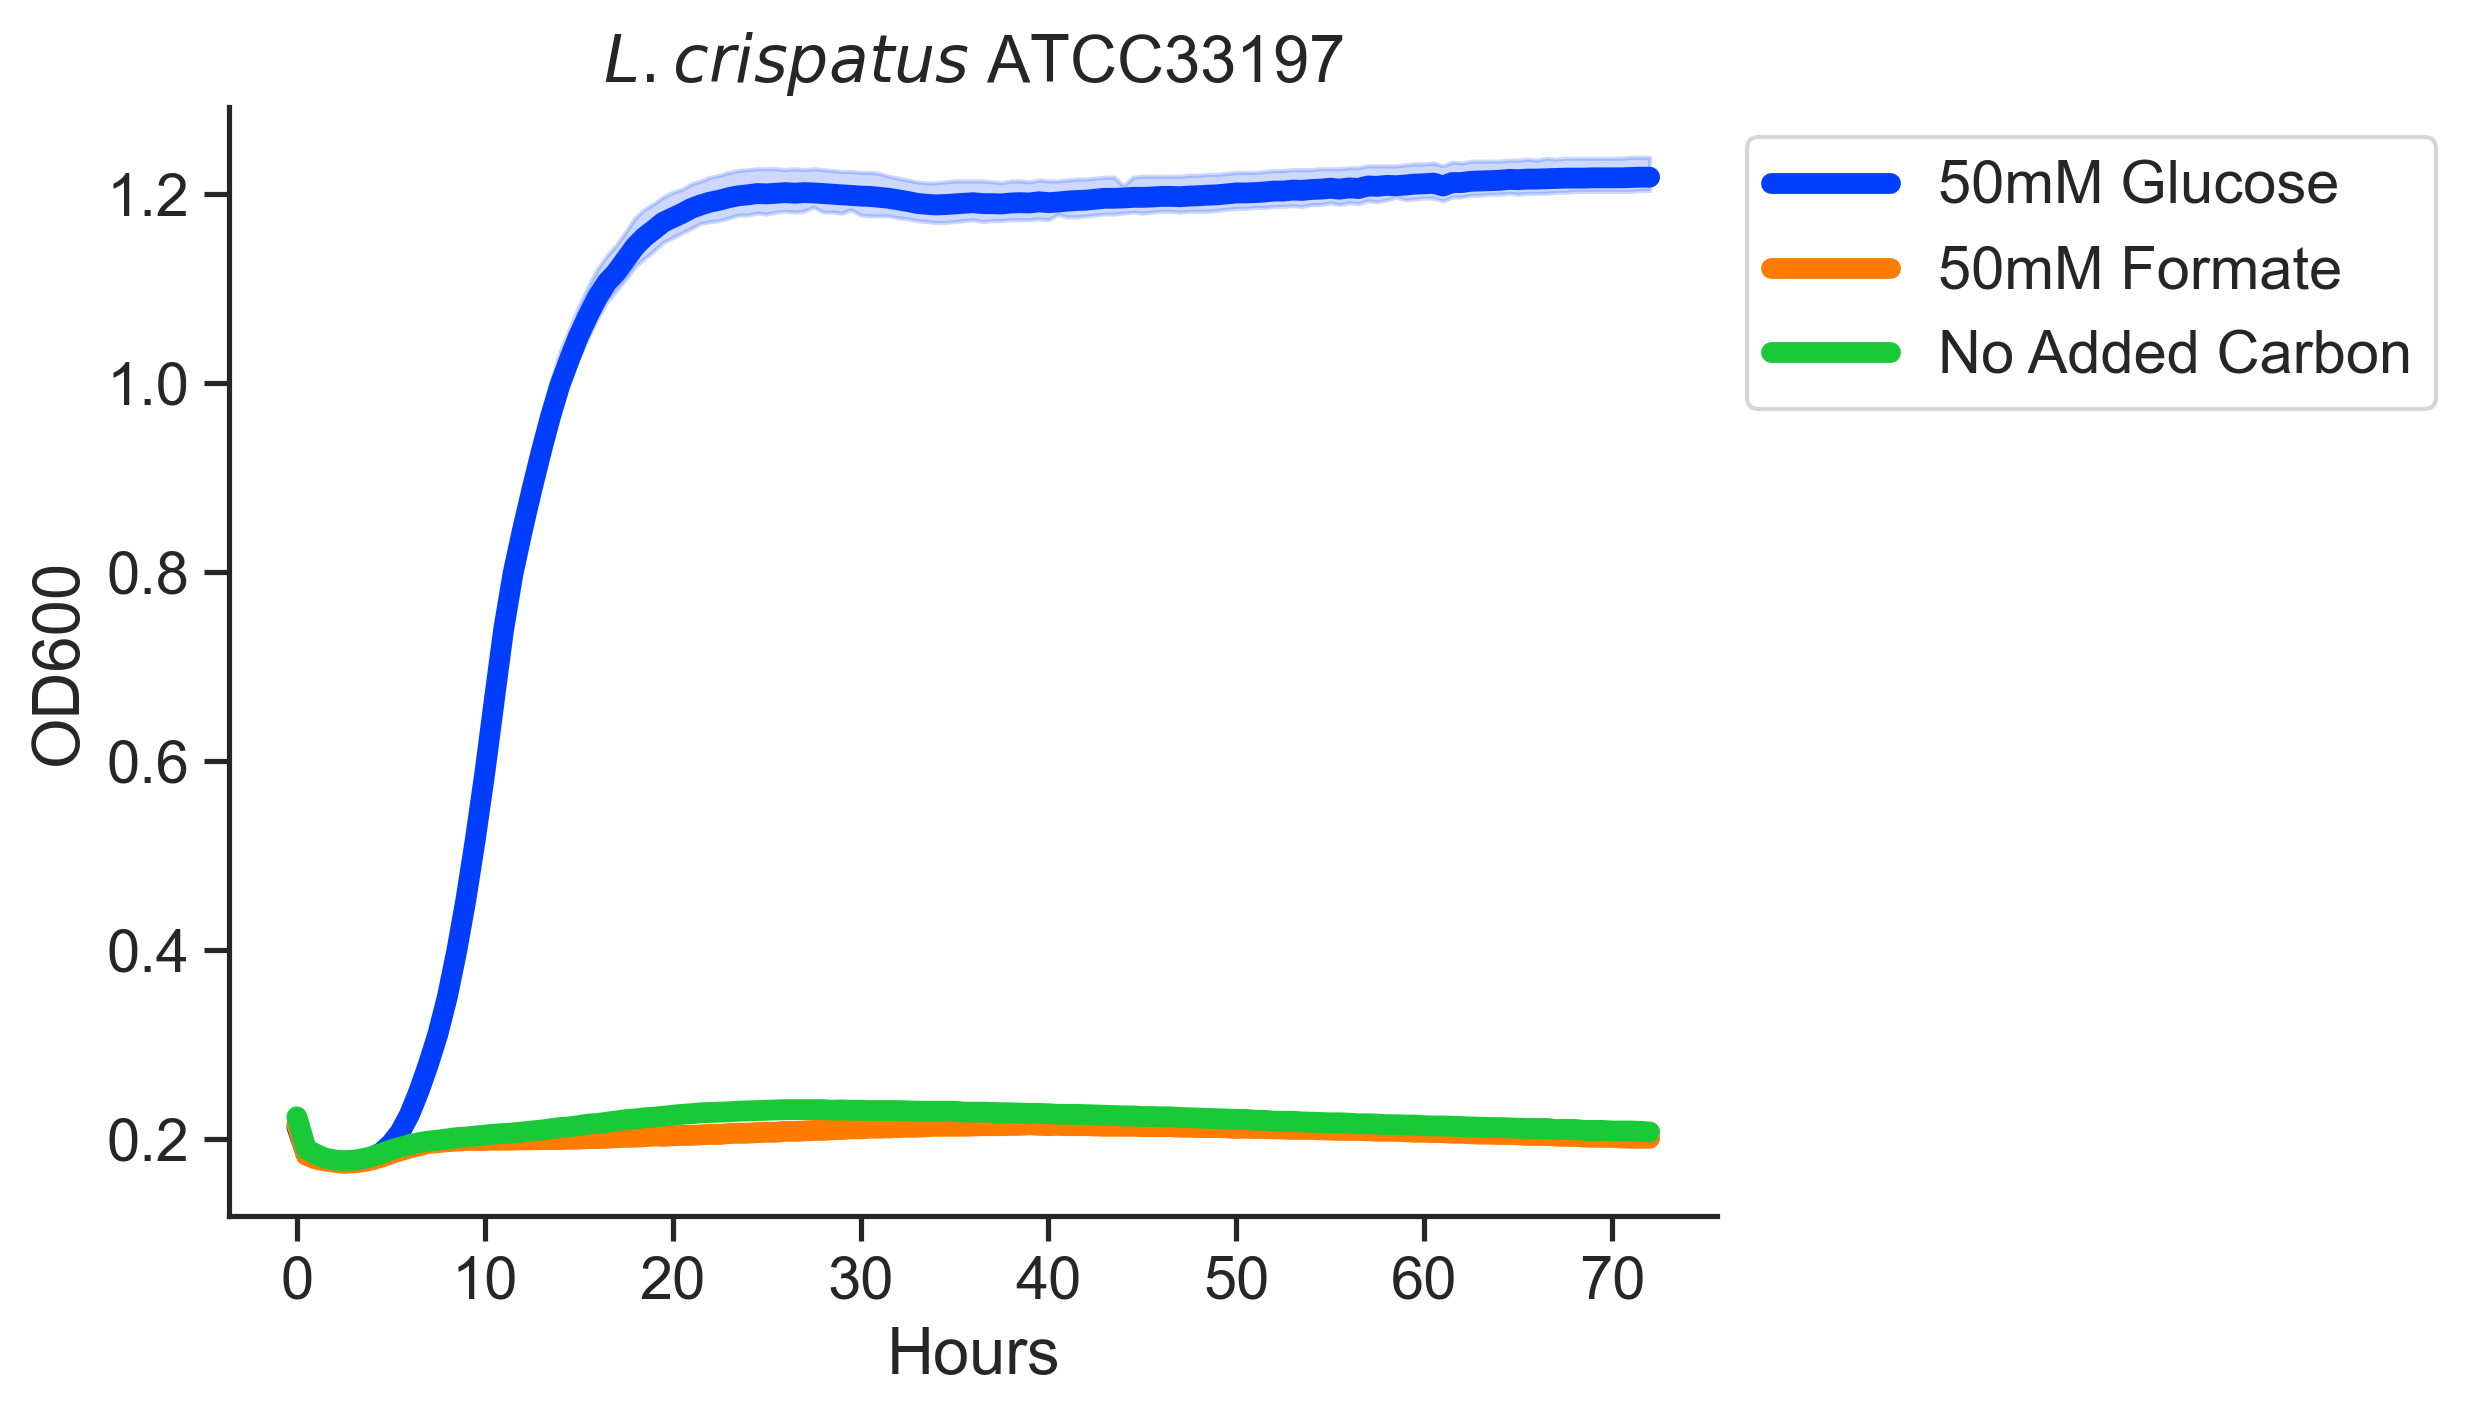

In [6]:
dfToPlot = sliceDFByStrain(df21624, 'ATCC33197', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='$\it{L. crispatus}$ ATCC33197', xlabel='Hours')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-16-24_atcc33197.png'))

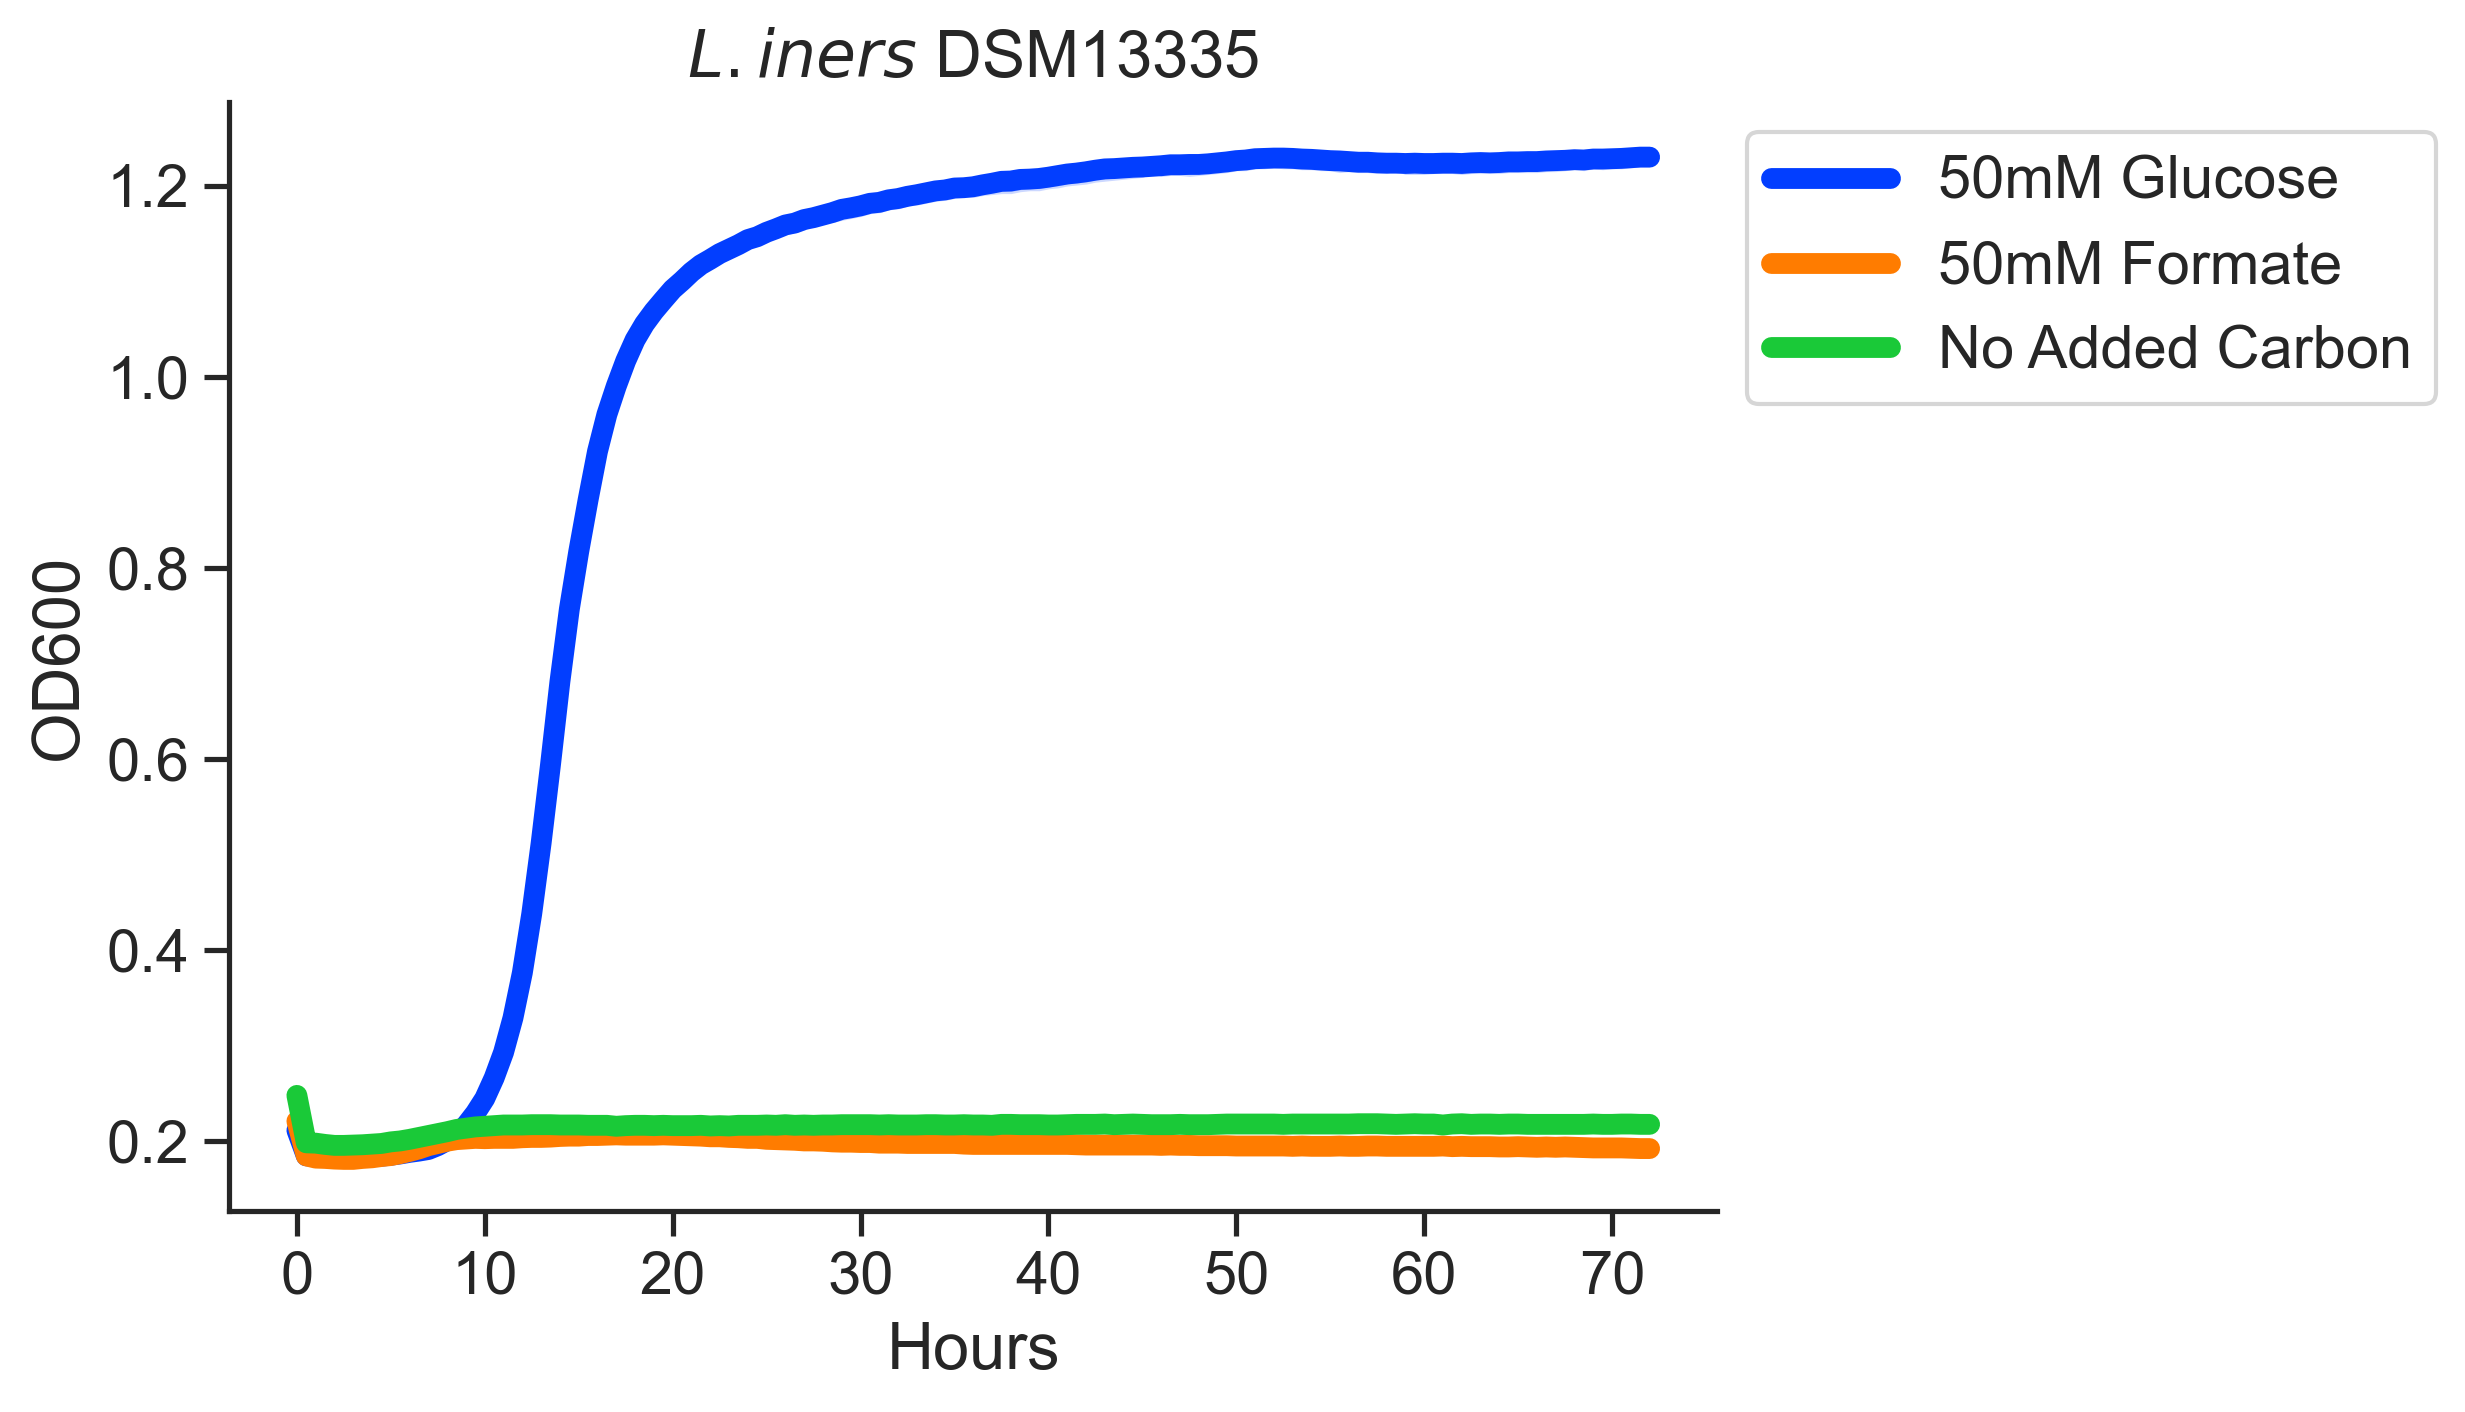

In [7]:
dfToPlot = sliceDFByStrain(df21624, 'DSM13335', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='$\it{L. iners}$ DSM13335', xlabel='Hours')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-16-24_dsm13335.png'))

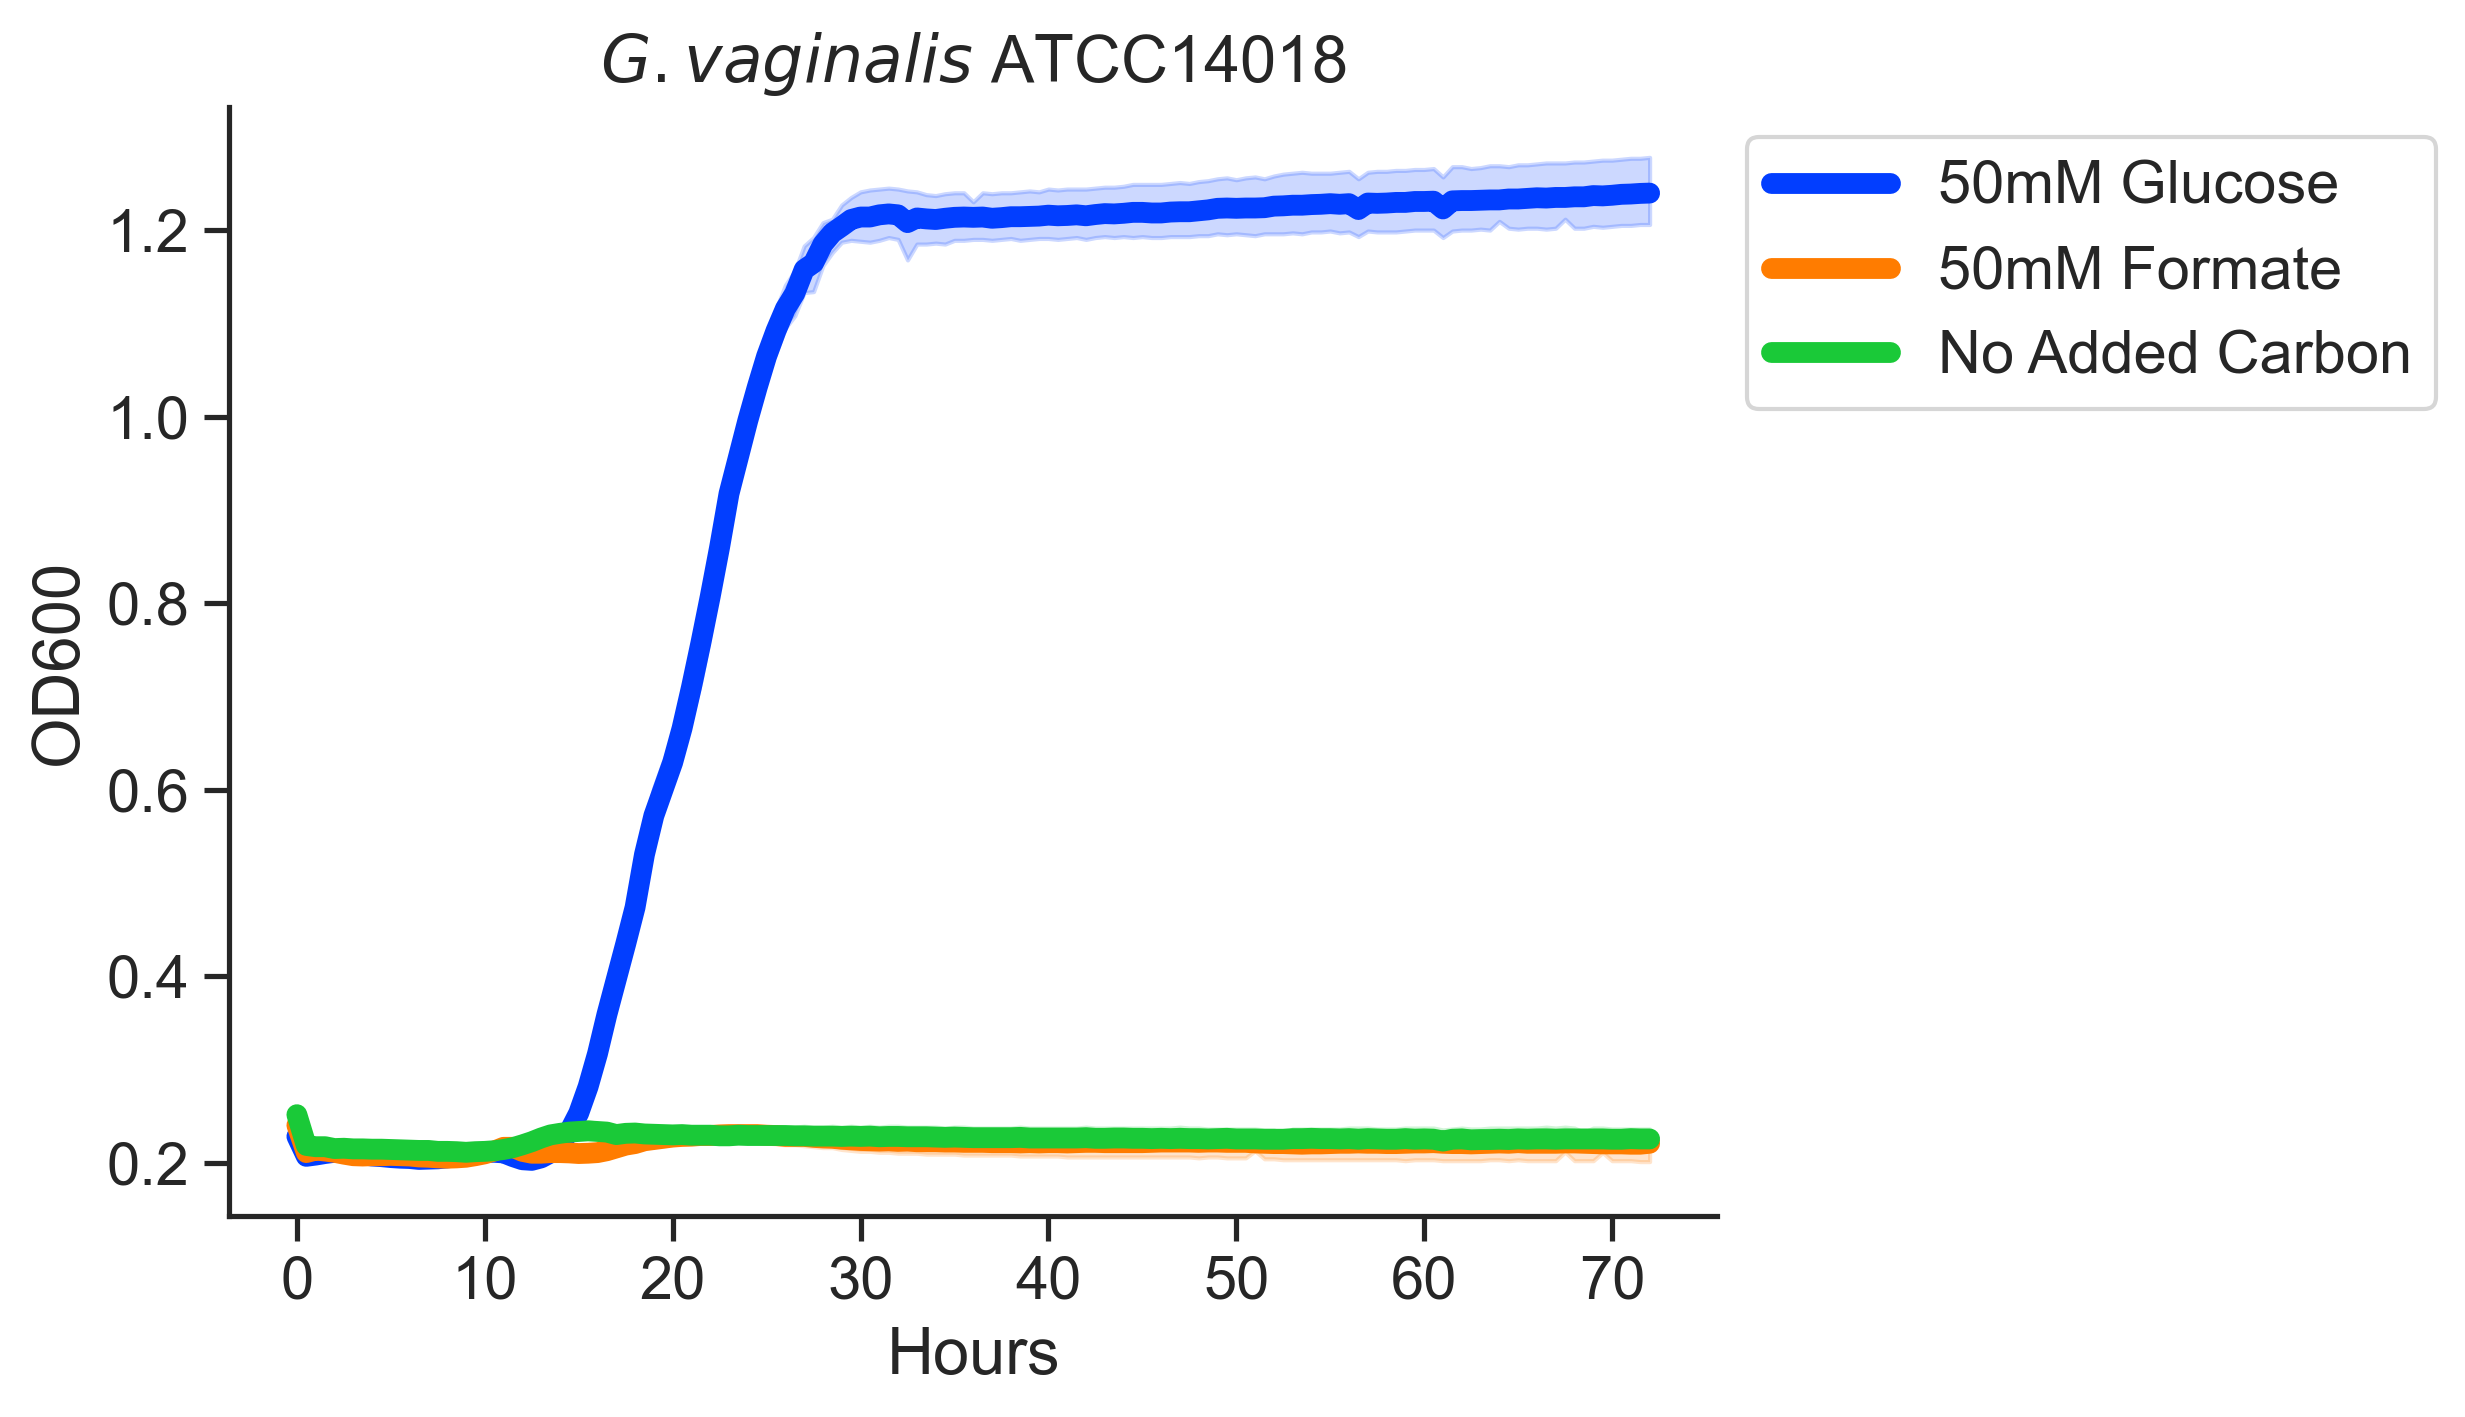

In [8]:
dfToPlot = sliceDFByStrain(df21624, 'ATCC14018', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='$\it{G. vaginalis}$ ATCC14018', xlabel='Hours')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-16-24_atcc14018.png'))

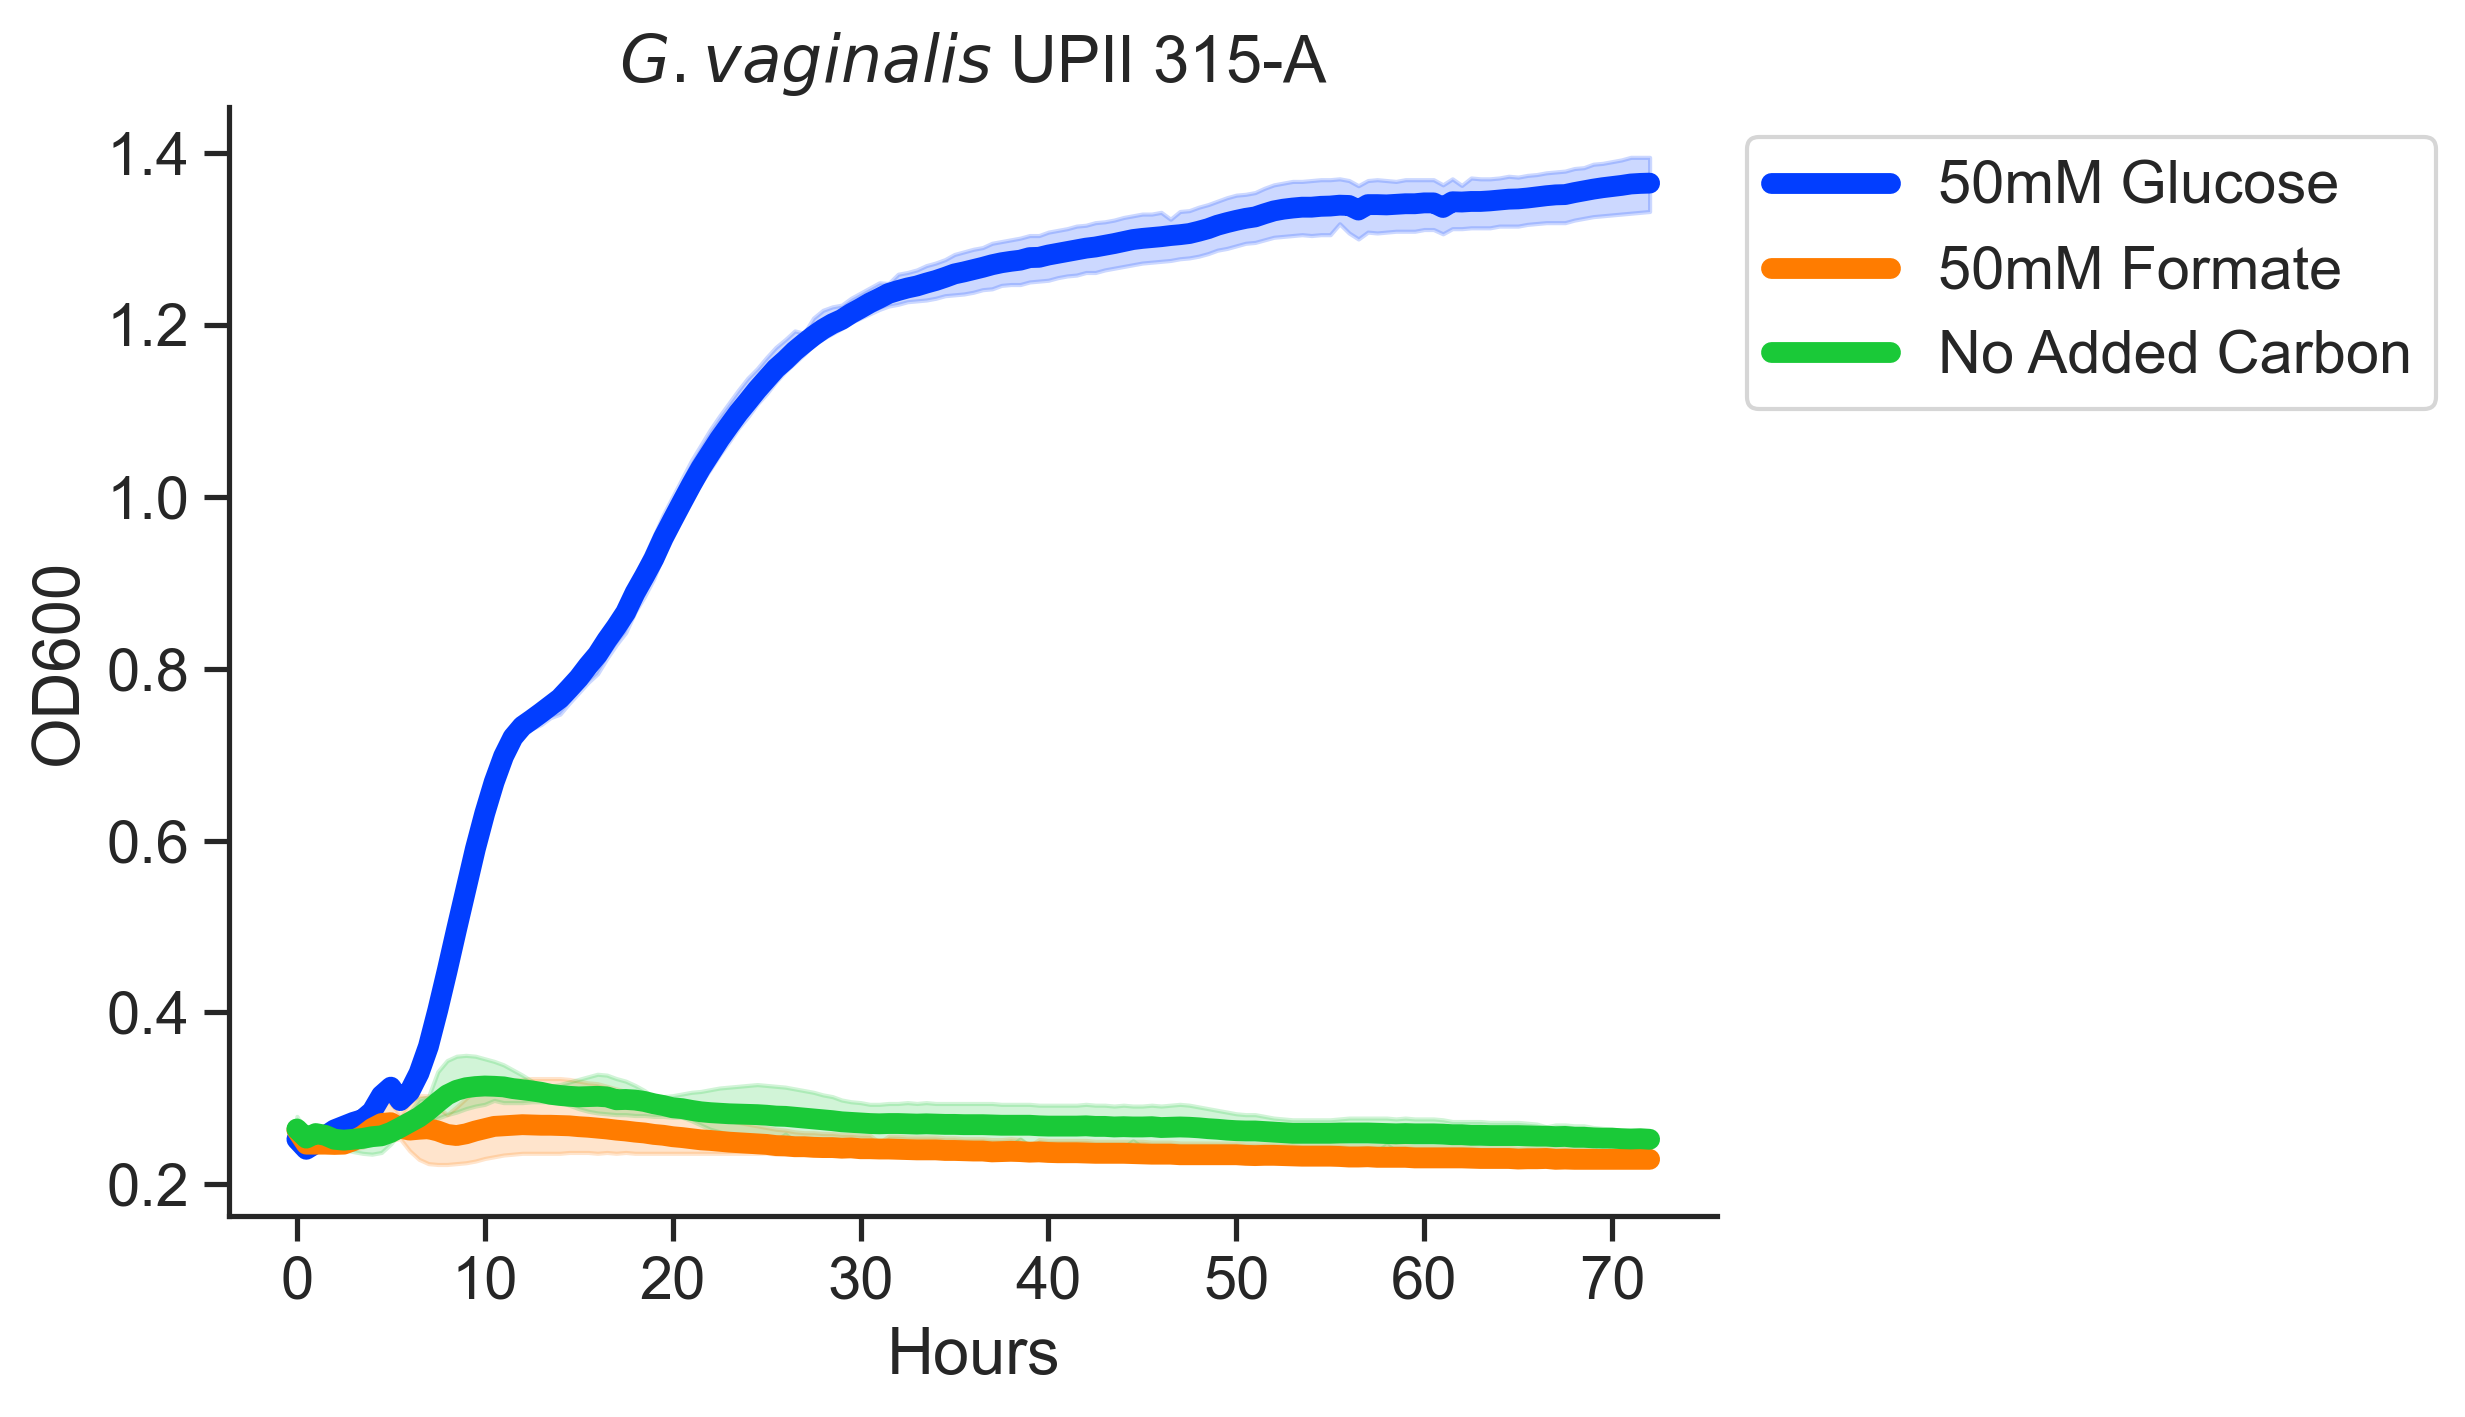

In [9]:
dfToPlot = sliceDFByStrain(df21624, '315-A', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='$\it{G. vaginalis}$ UPII 315-A', xlabel='Hours')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-16-24_315-a.png'))

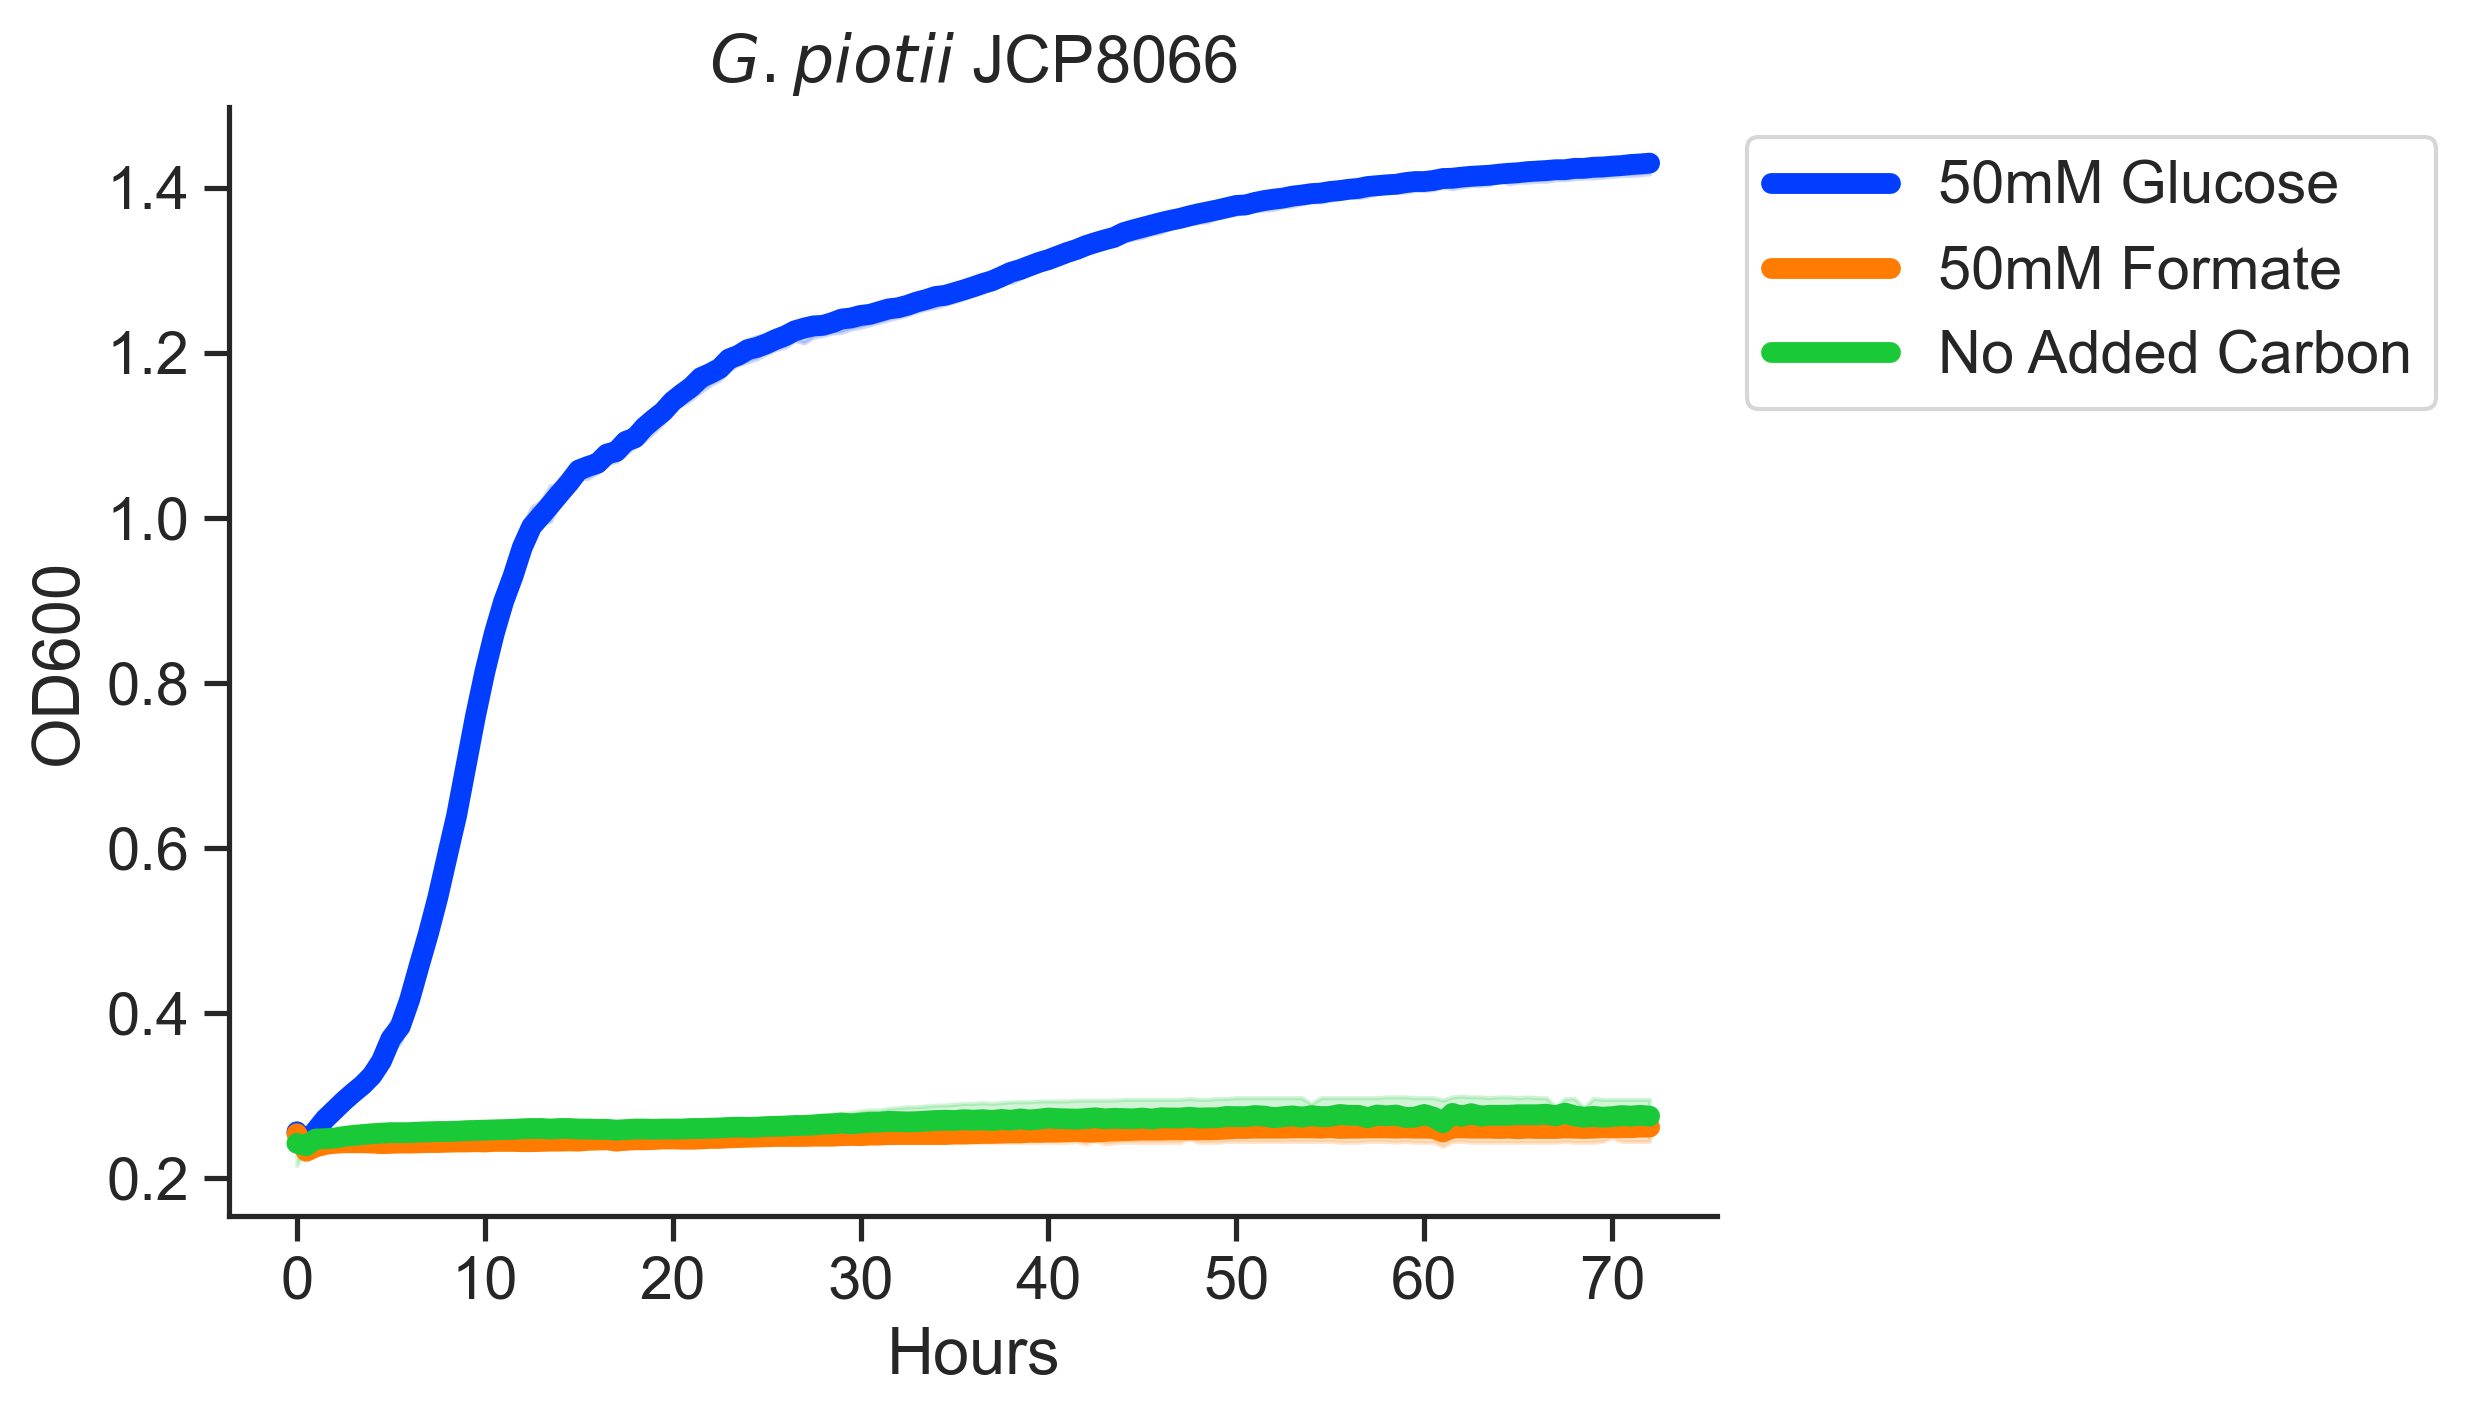

In [10]:
dfToPlot = sliceDFByStrain(df21624, 'JCP8066', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='$\it{G. piotii}$ JCP8066', xlabel='Hours')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-16-24_jcp8066.png'))

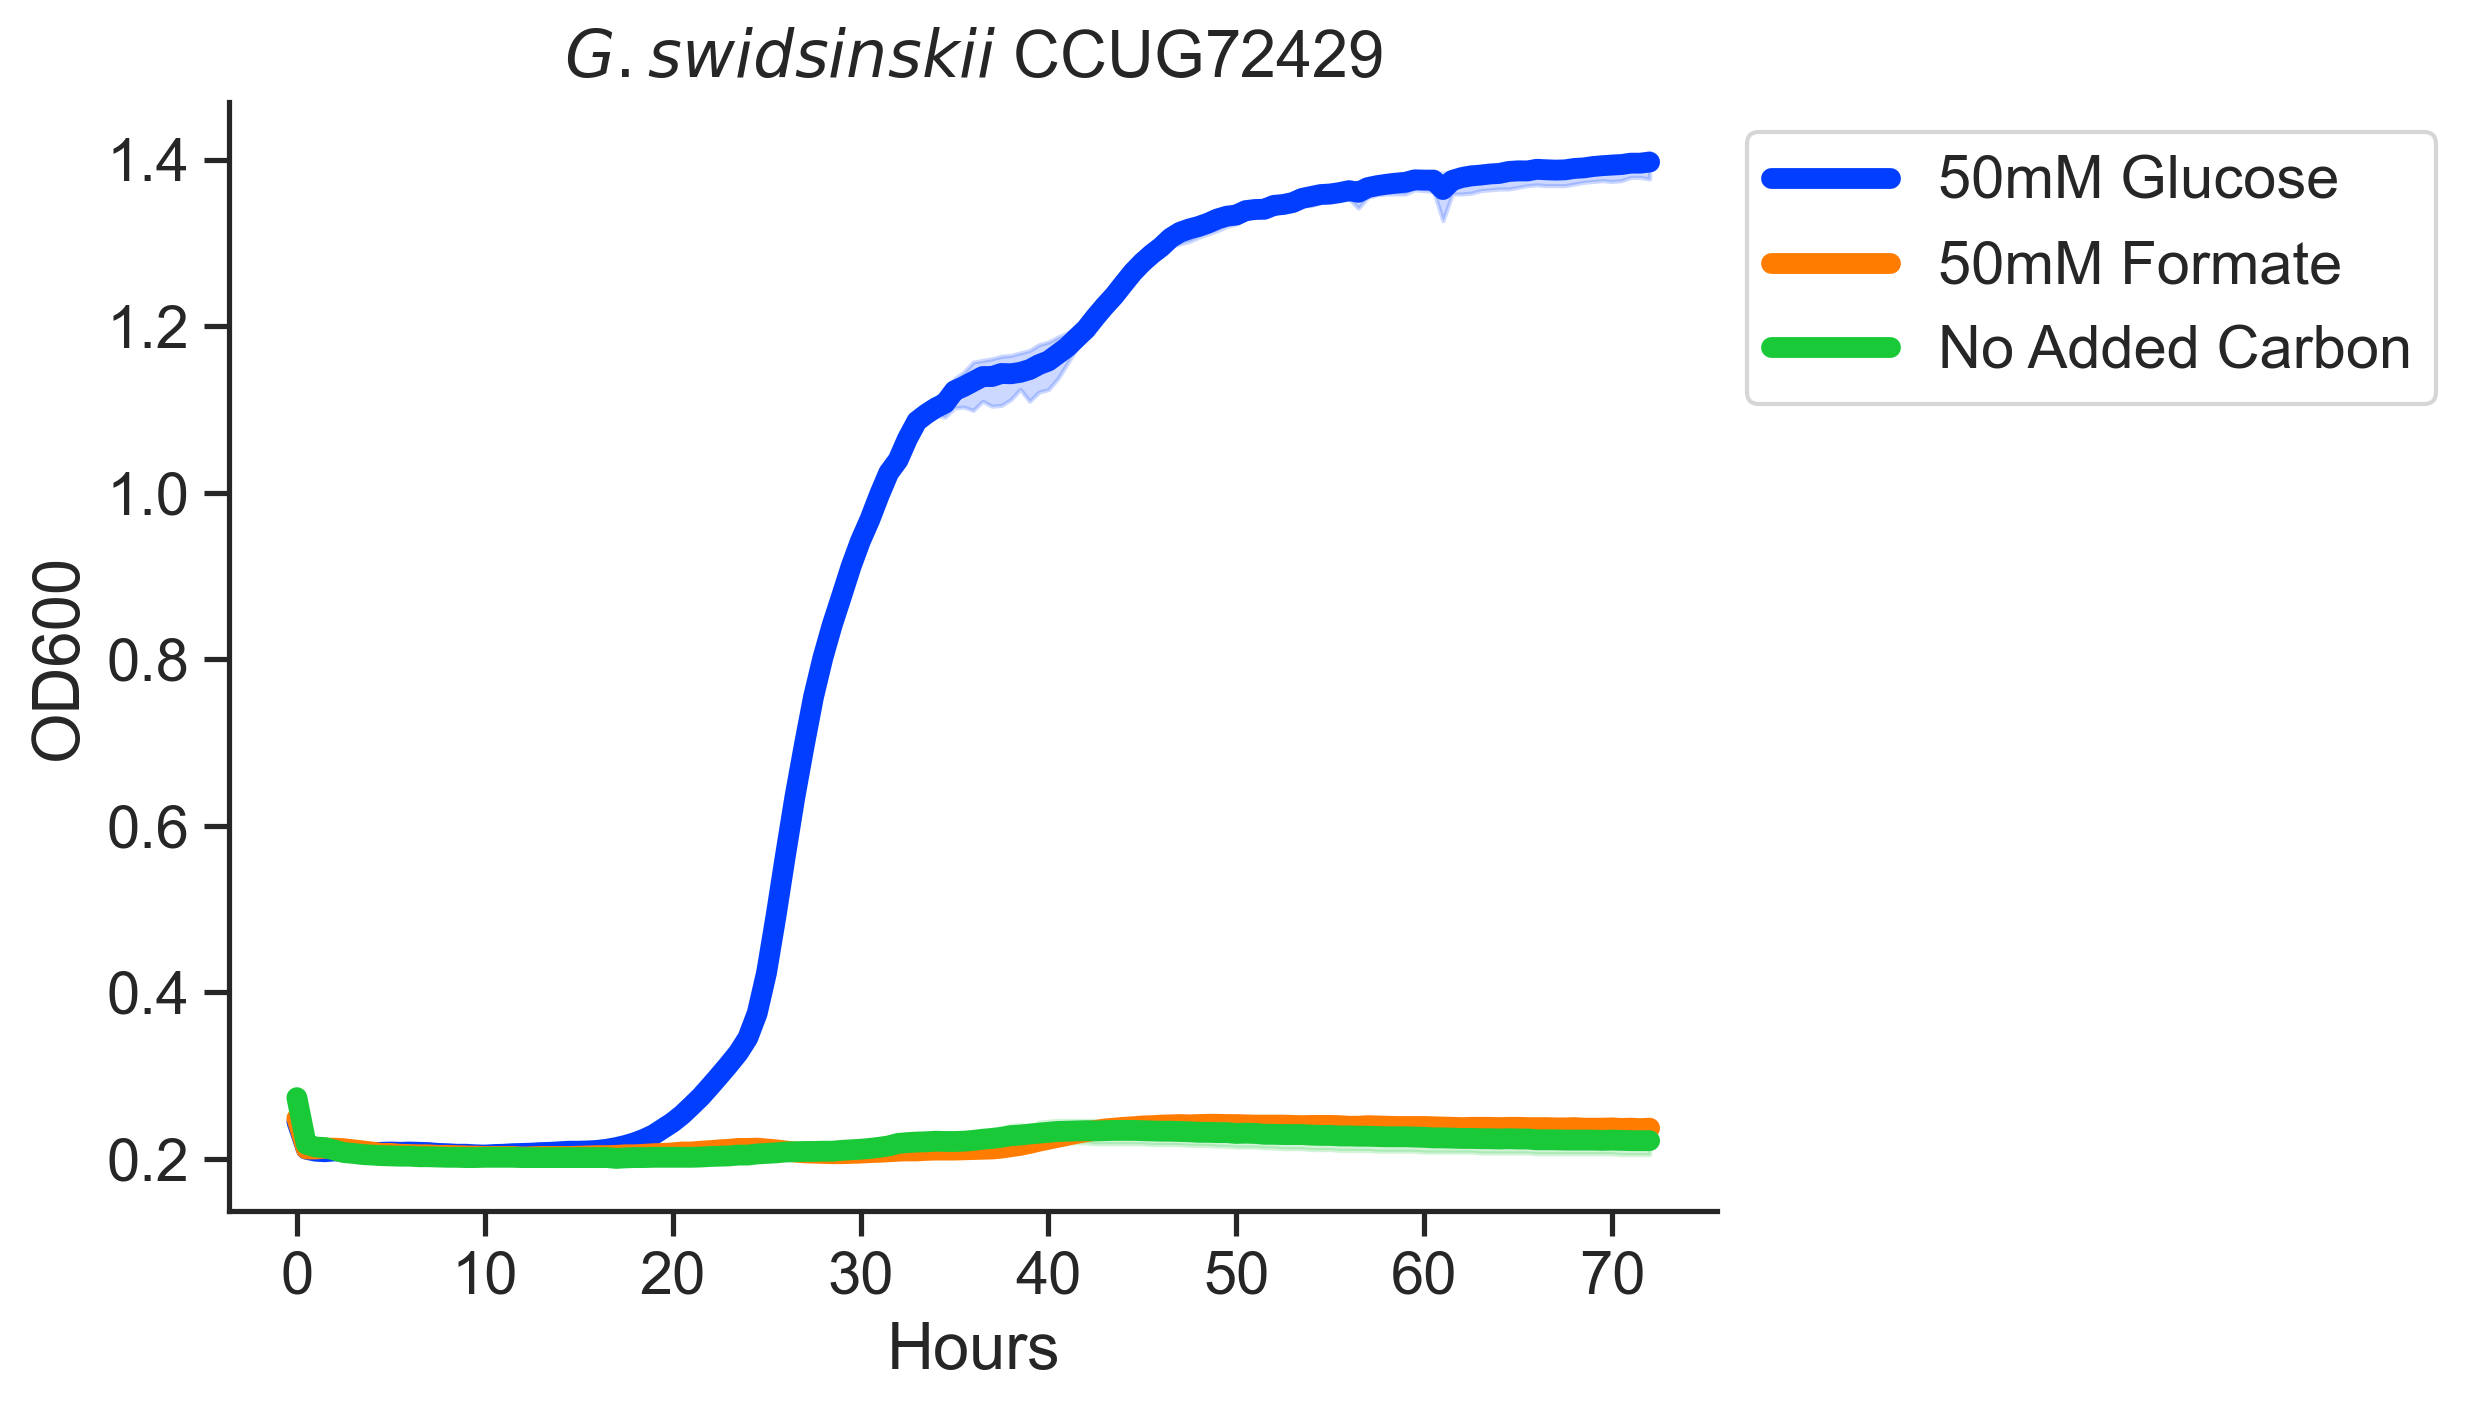

In [11]:
dfToPlot = sliceDFByStrain(df21624, 'CCUG72429', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='$\it{G. swidsinskii}$ CCUG72429', xlabel='Hours')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-16-24_ccug72429.png'))

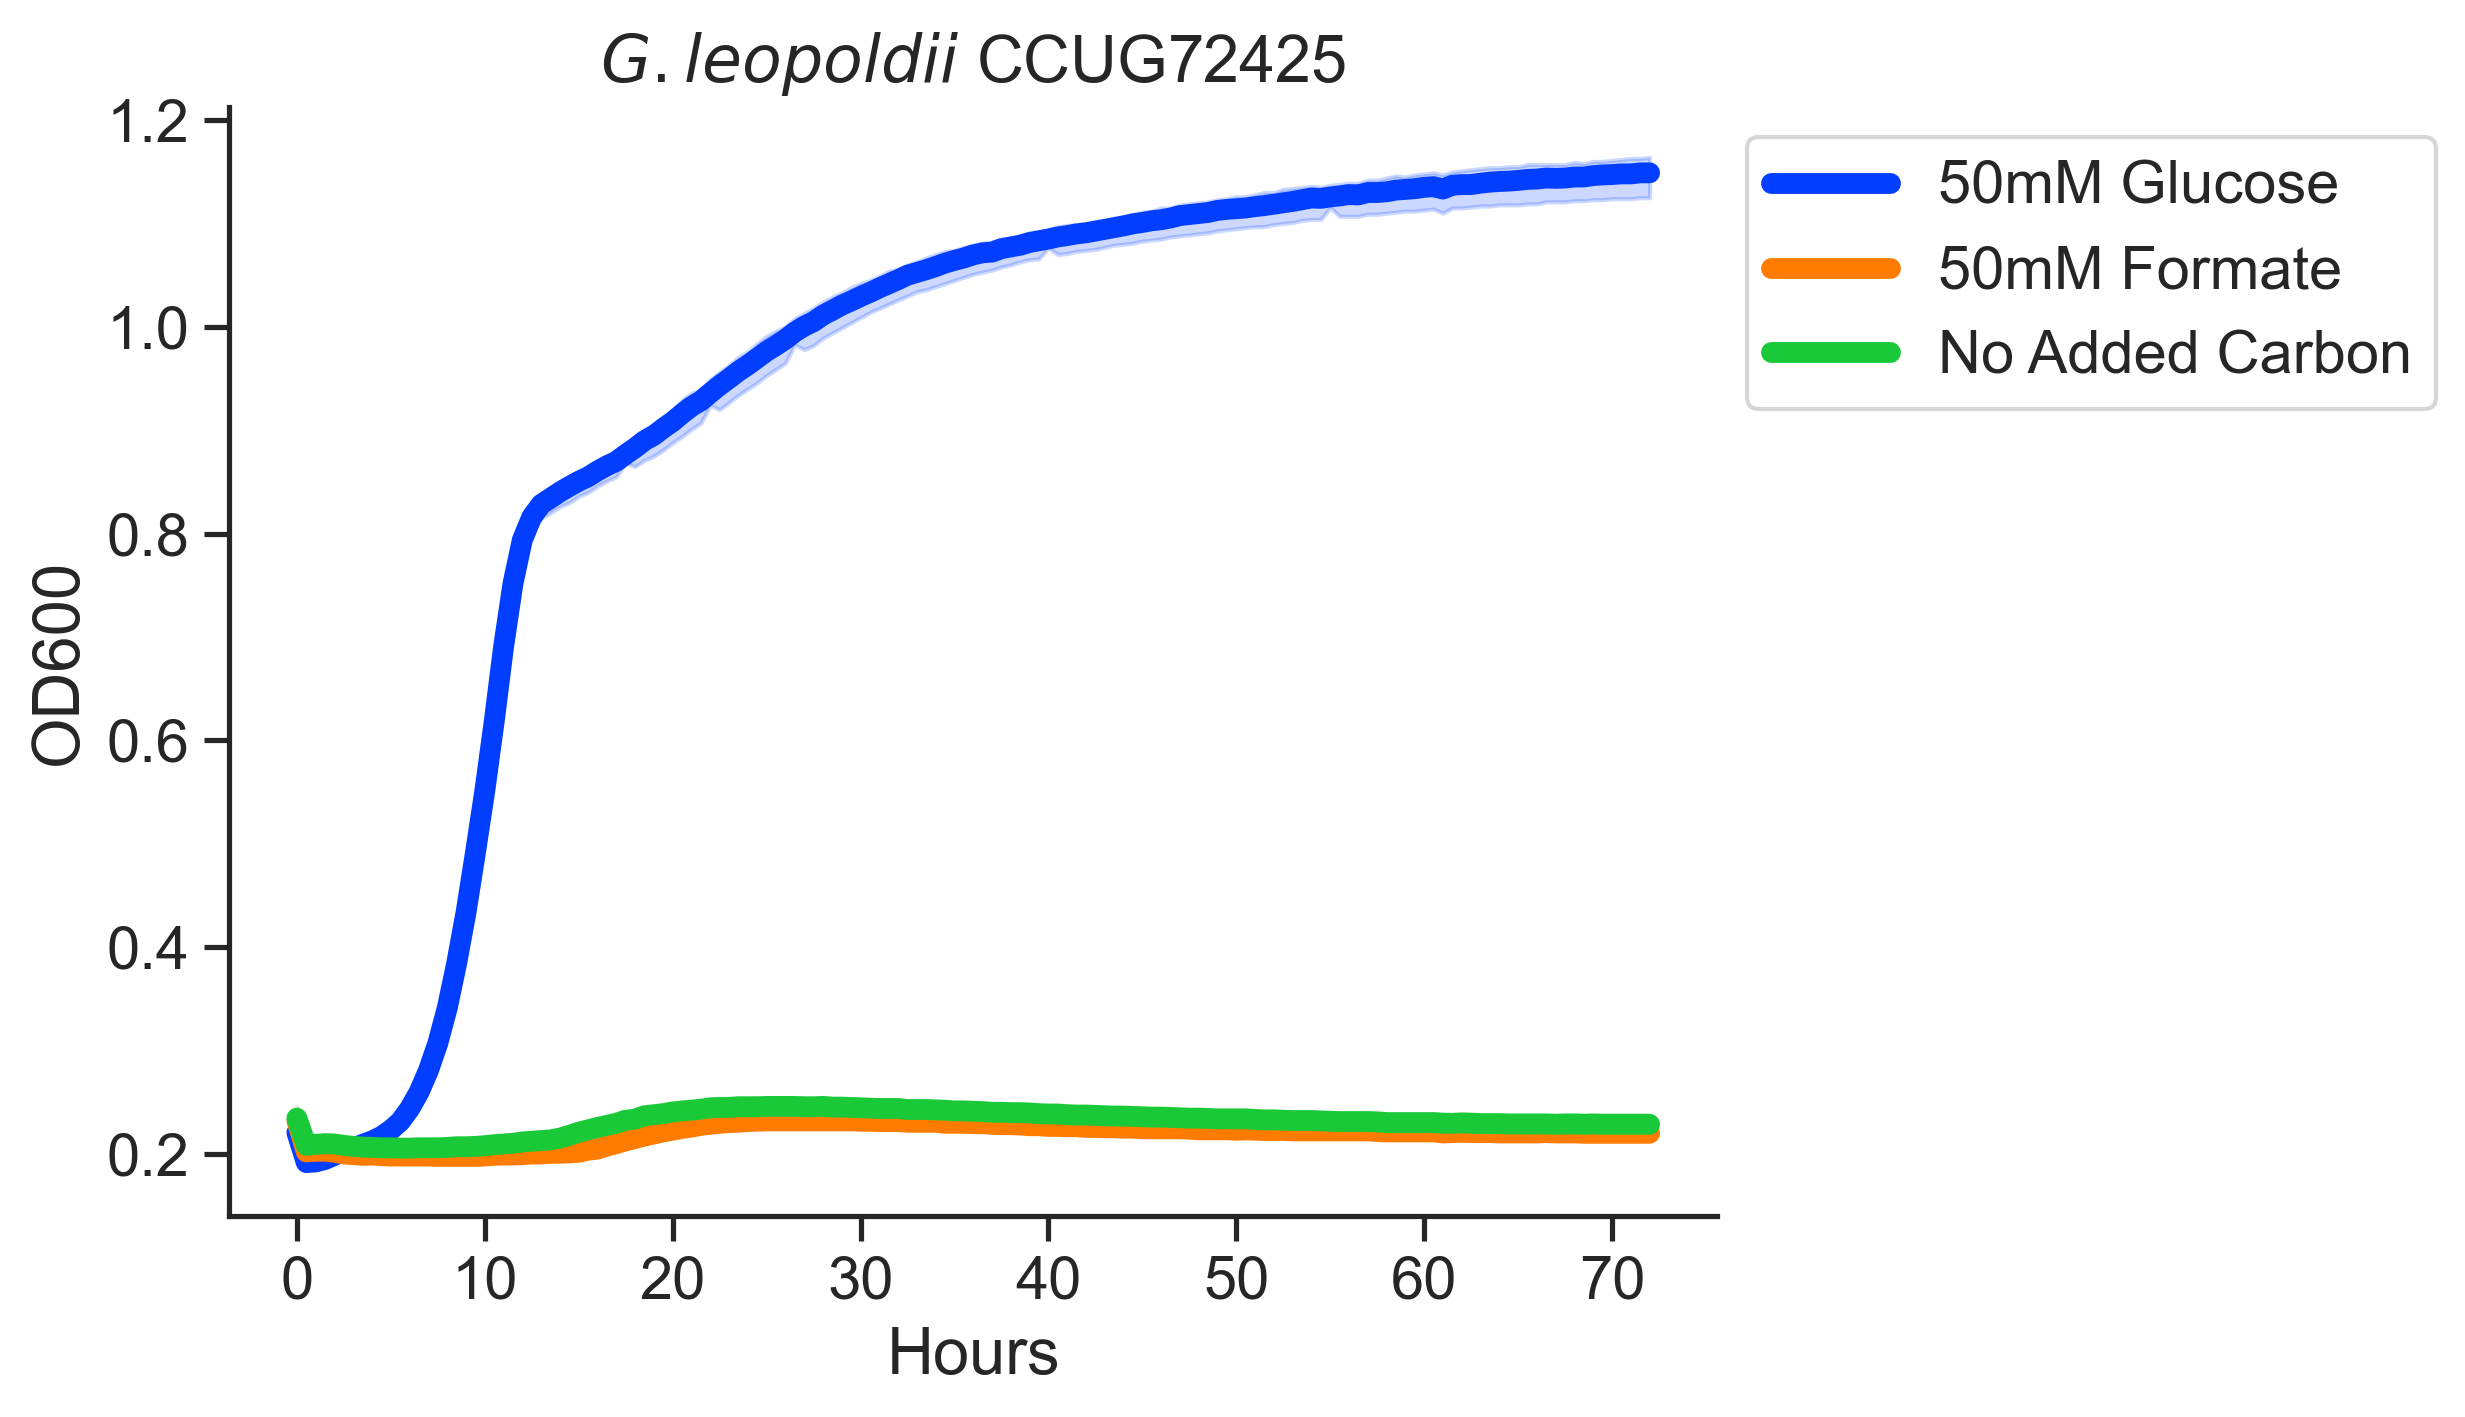

In [12]:
dfToPlot = sliceDFByStrain(df21624, 'CCUG72425', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='$\it{G. leopoldii}$ CCUG72425', xlabel='Hours')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-16-24_ccug72425.png'))

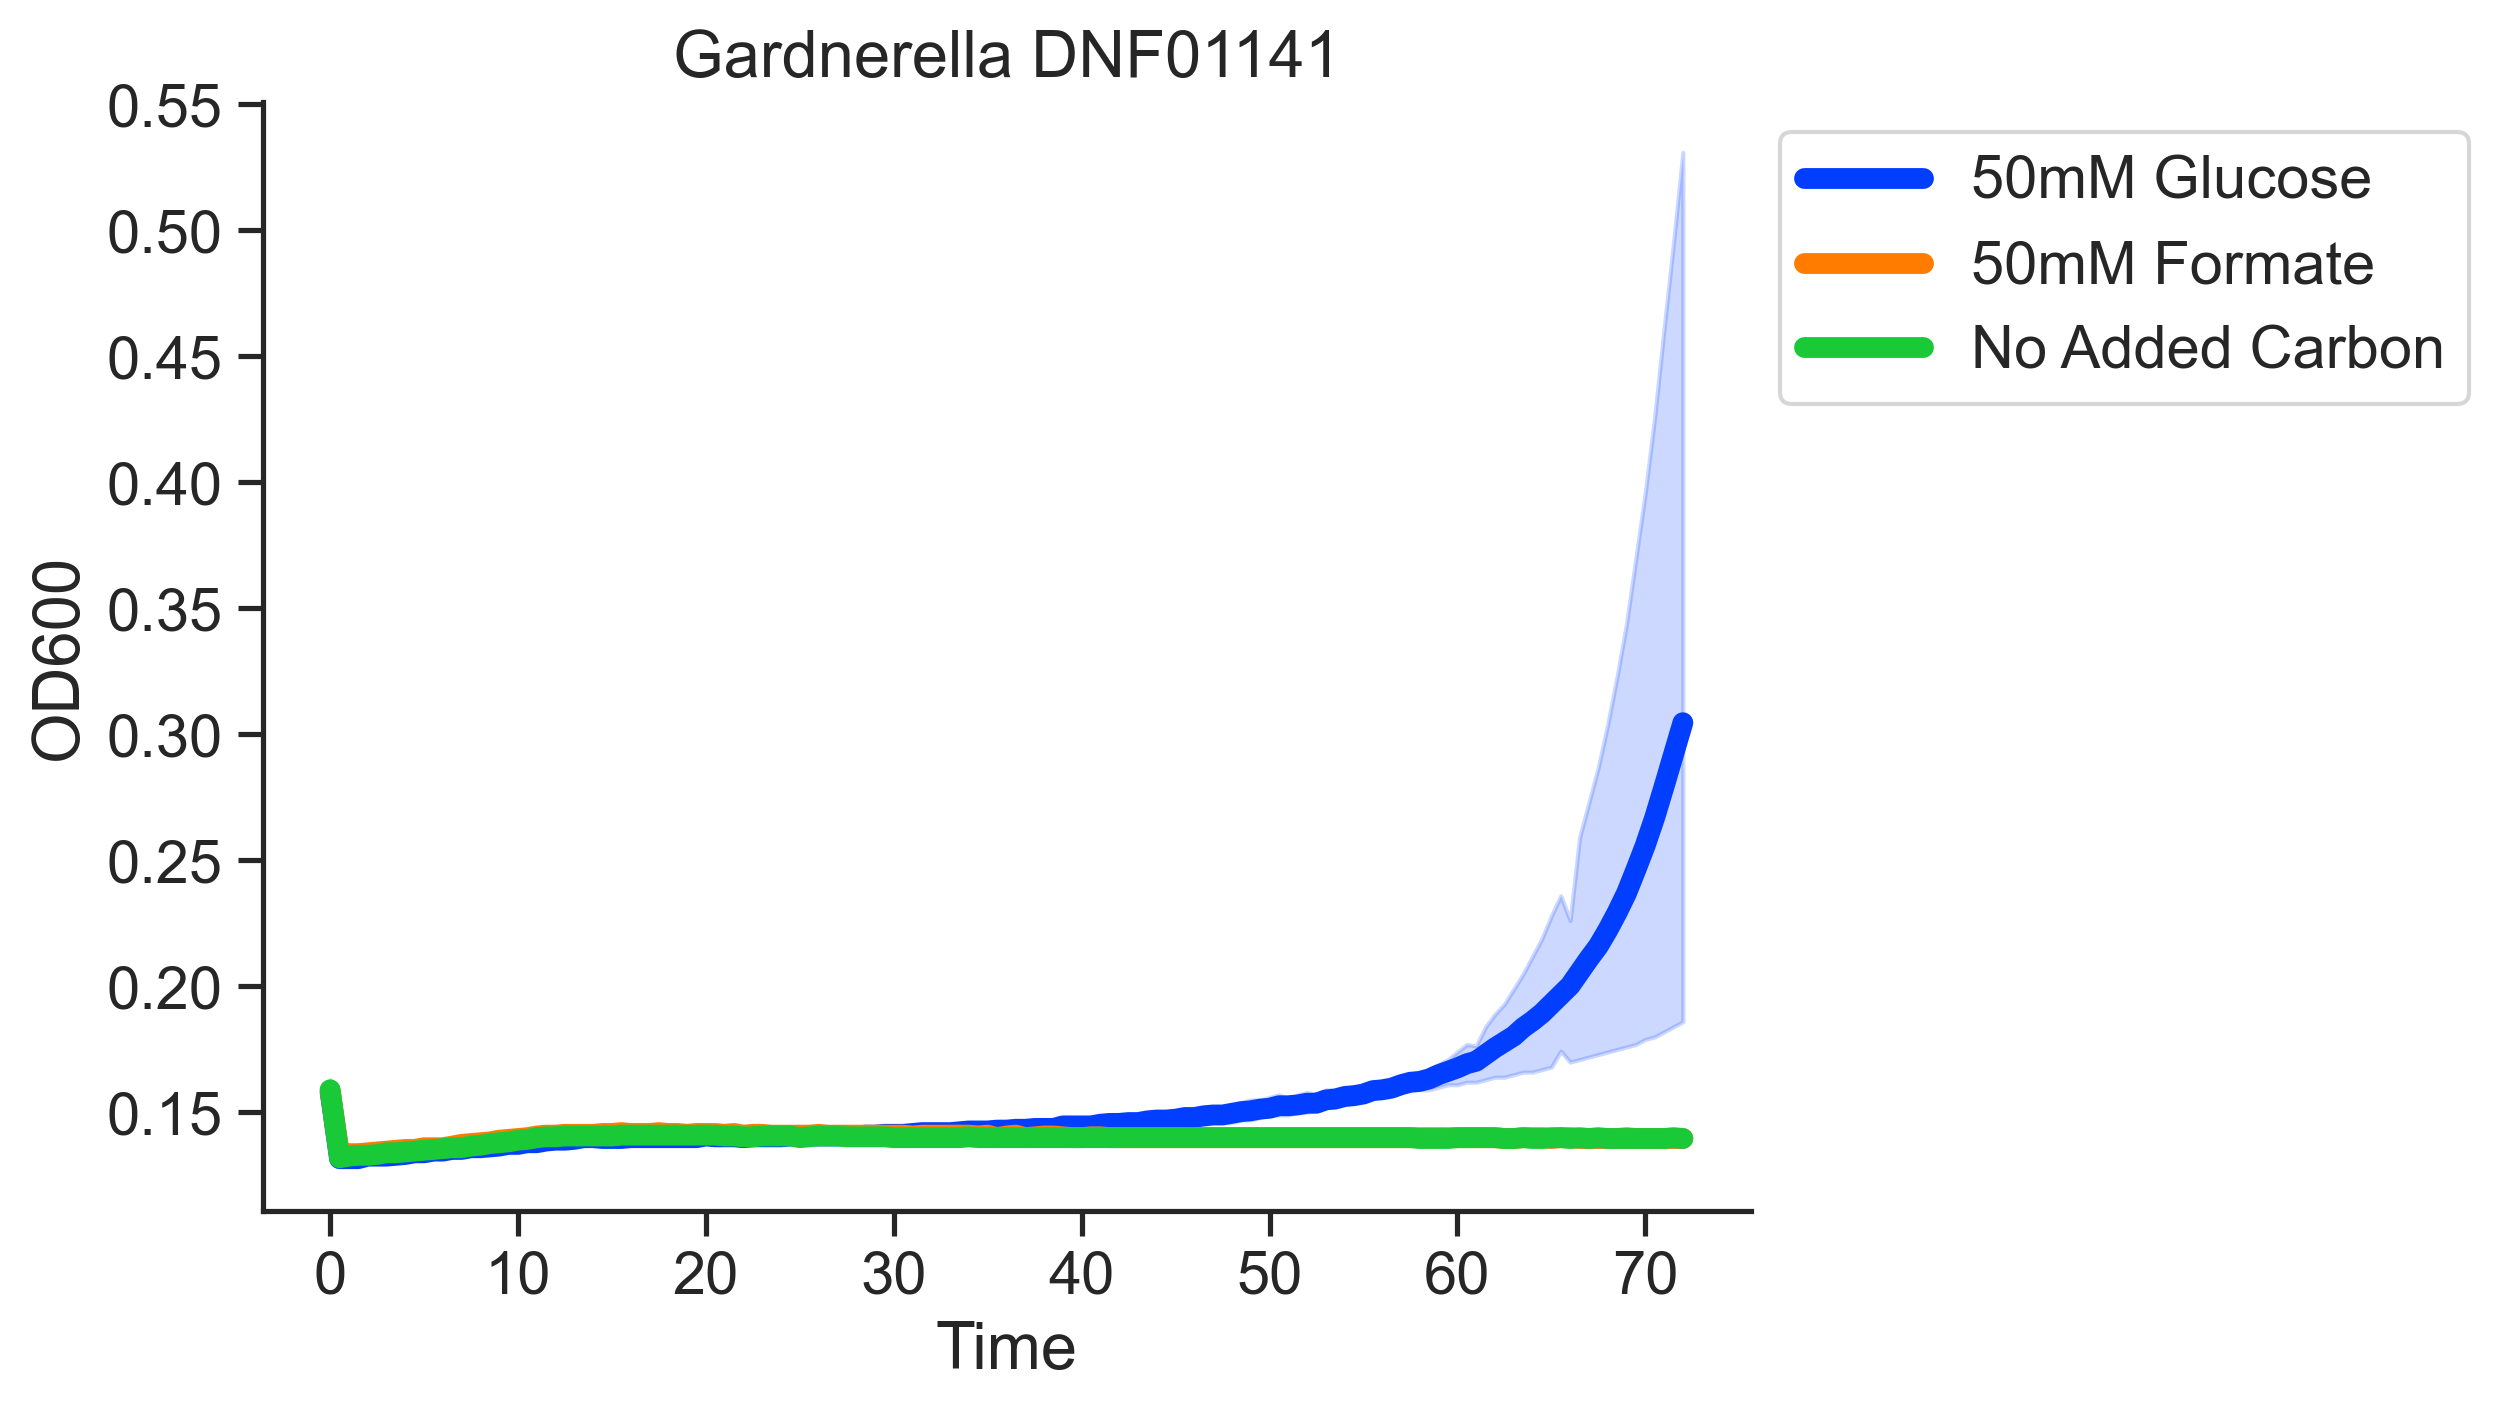

In [19]:
dfToPlot = sliceDFByStrain(df21624, 'DNF01141', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='Gardnerella DNF01141')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-16-24_DNF01141.png'))

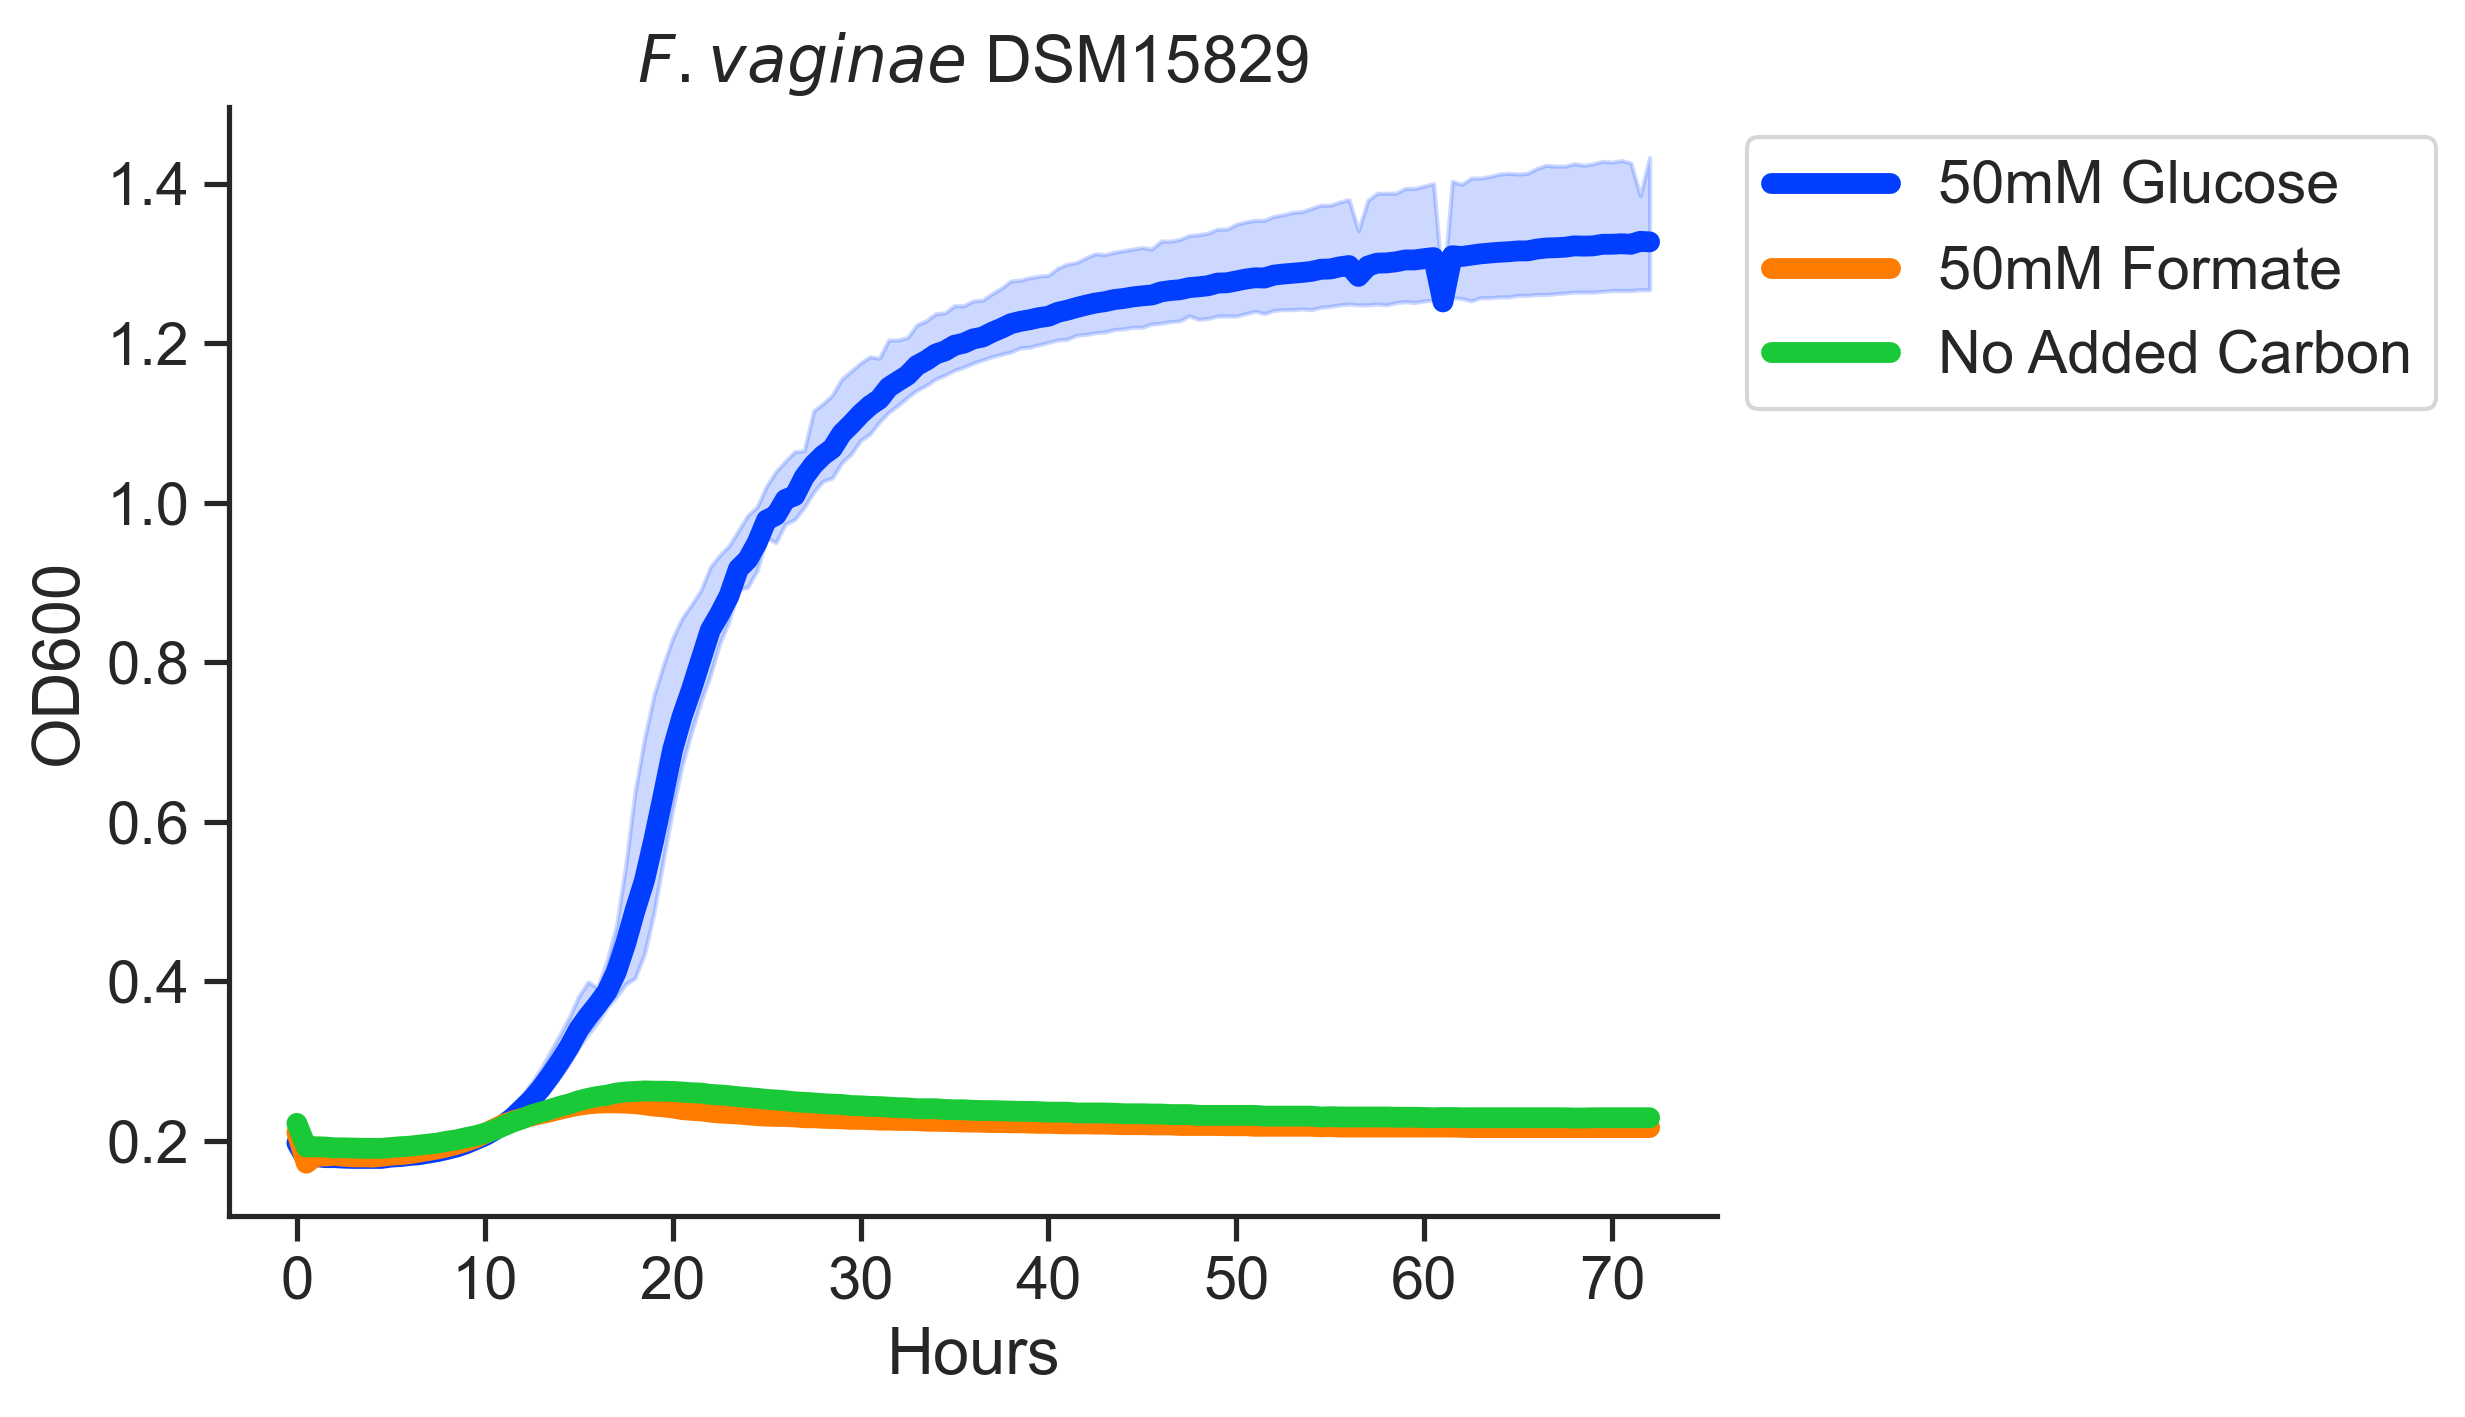

In [13]:
dfToPlot = sliceDFByStrain(df21624, 'DSM15829', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='$\it{F. vaginae}$ DSM15829', xlabel='Hours')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-16-24_dsm15829.png'))

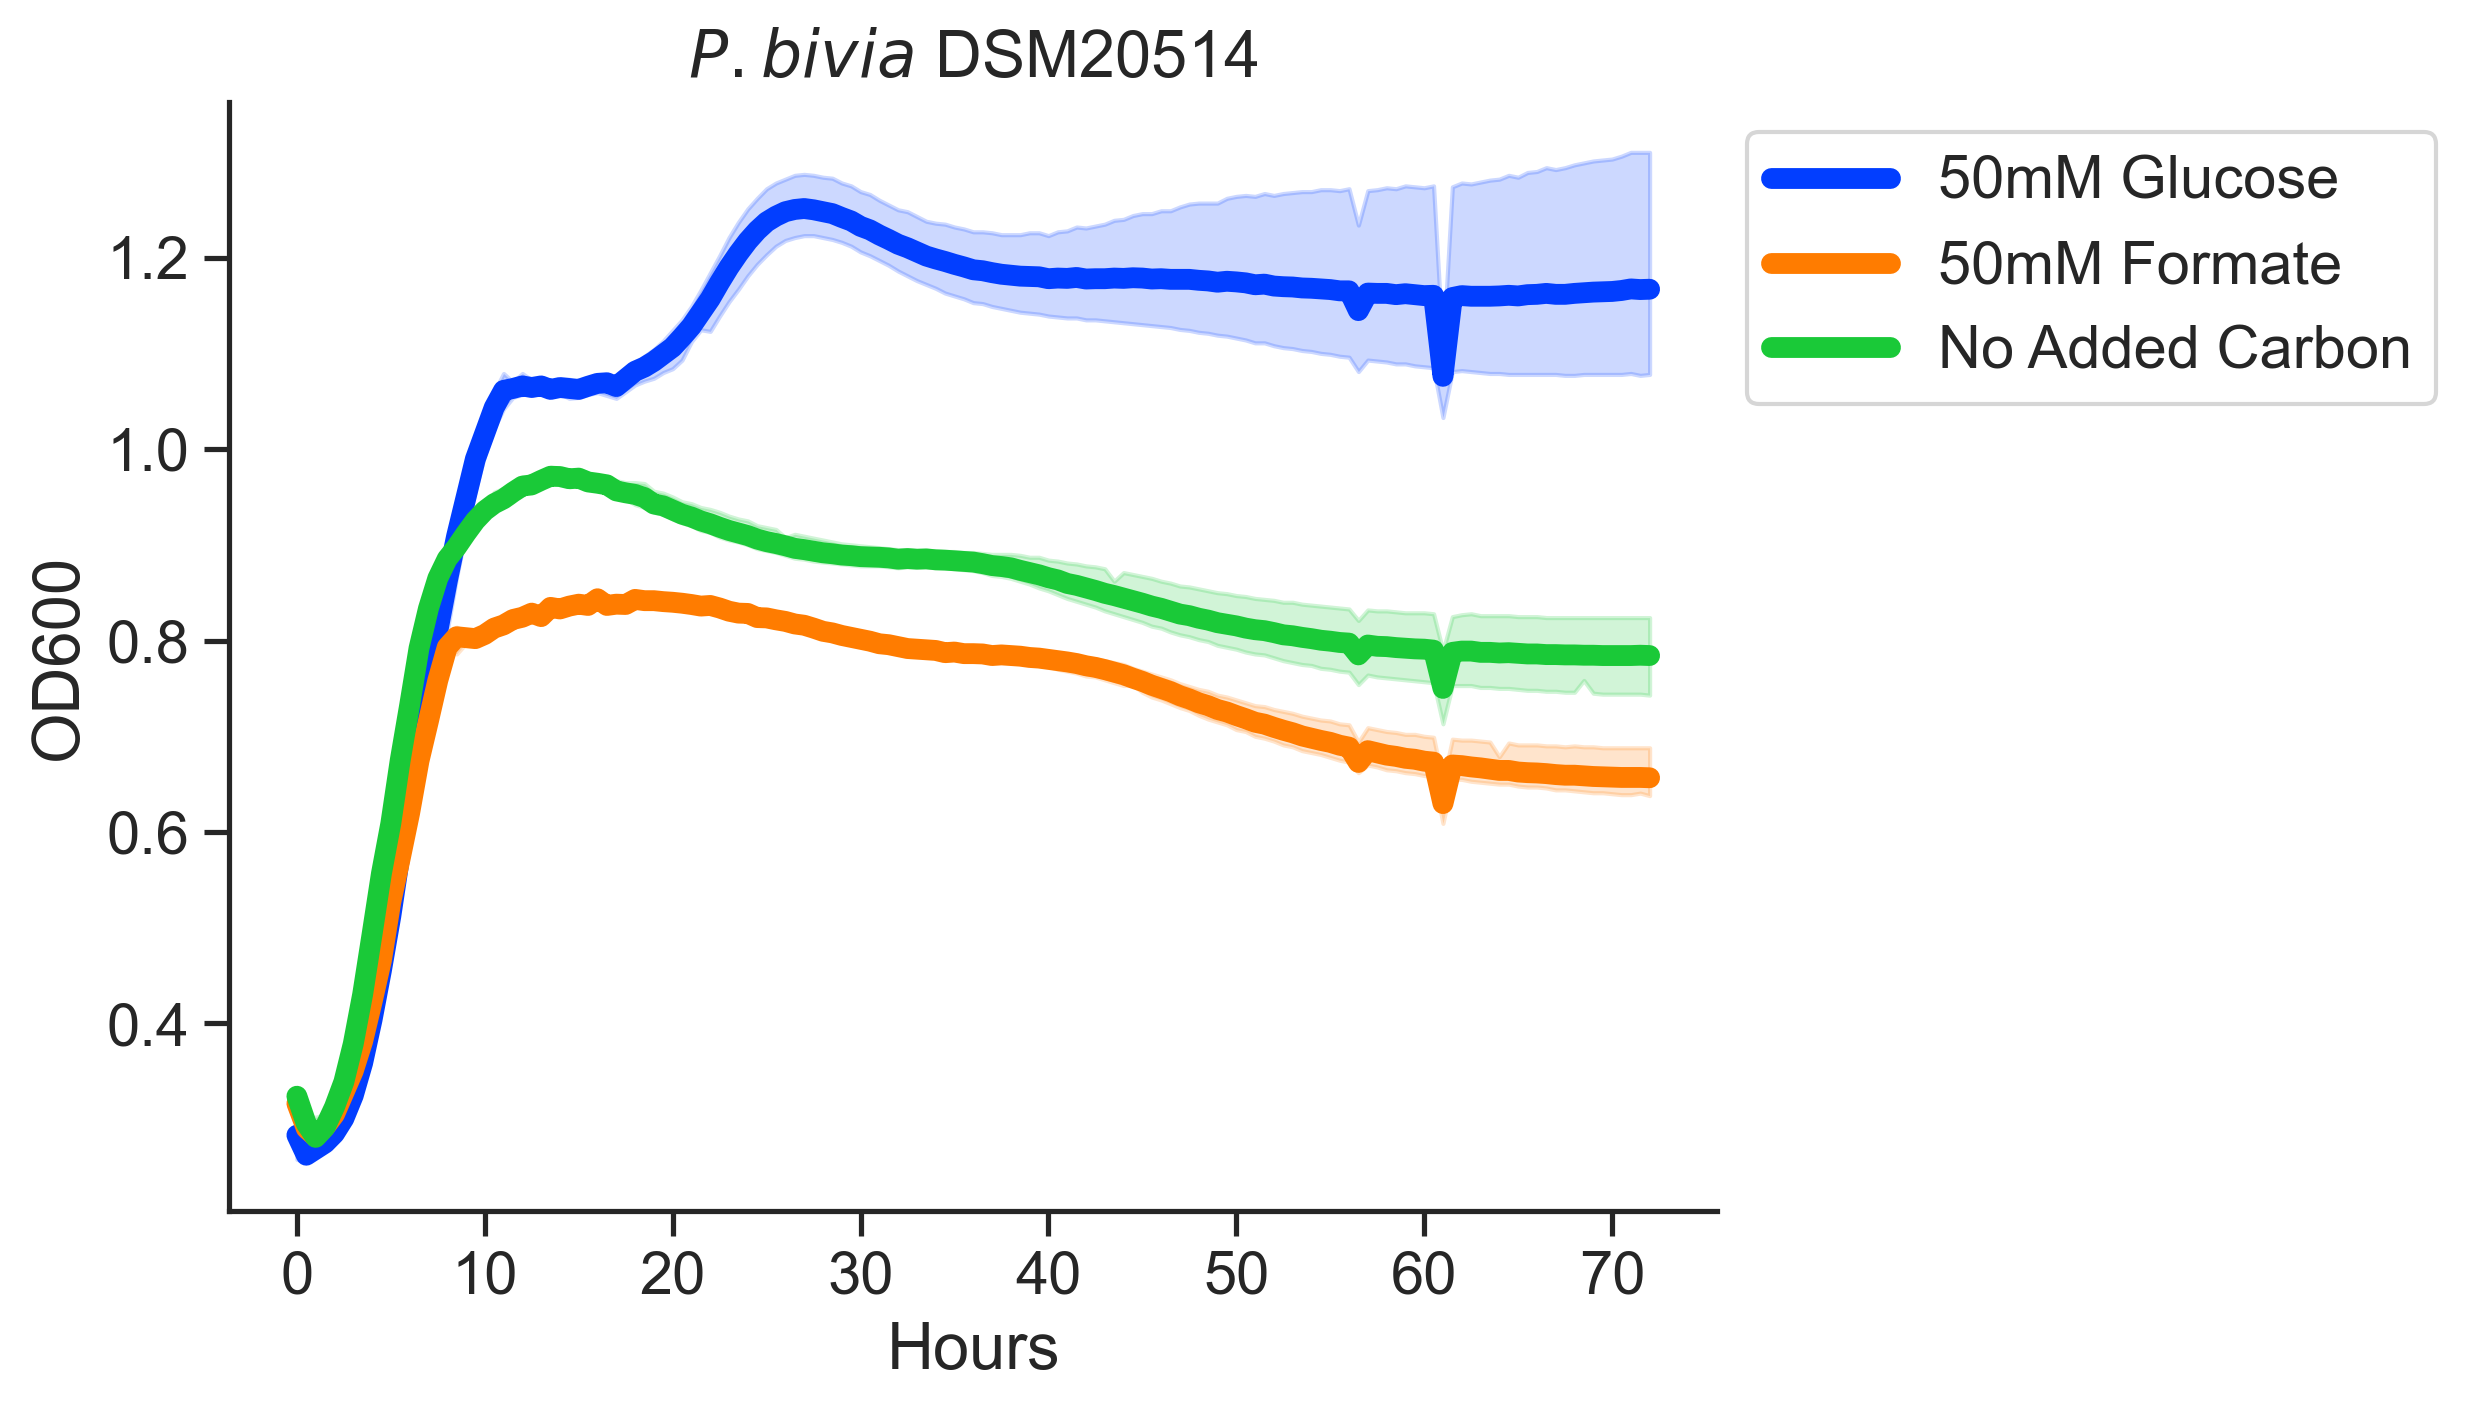

In [14]:
dfToPlot = sliceDFByStrain(df21624, 'DSM20514', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='$\it{P. bivia}$ DSM20514', xlabel='Hours')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-16-24_dsm20514.png'))

In [15]:
data22324 = pd.read_csv(analysisPath.joinpath('2-23-24.csv'))
strains22324 = [
    ['ATCC35241', 'ATCC35241', 'ATCC35241', 'DSM2710', 'DSM2710', 'DSM2710', '199-6', '199-6', '199-6', 'DSM20557', 'DSM20557', 'DSM20557'],
    ['ATCC35241', 'ATCC35241', 'ATCC35241', 'DSM2710', 'DSM2710', 'DSM2710', '199-6', '199-6', '199-6', 'DSM20557', 'DSM20557', 'DSM20557'],
    ['ATCC35241', 'ATCC35241', 'ATCC35241', 'DSM2710', 'DSM2710', 'DSM2710', '199-6', '199-6', '199-6', 'DSM20557', 'DSM20557', 'DSM20557'],
    ['ATCC35241', 'ATCC35241', 'ATCC35241', 'DSM2710', 'DSM2710', 'DSM2710', '199-6', '199-6', '199-6', 'DSM20243', 'DSM20243', 'DSM20243'],
    ['ATCC35241', 'ATCC35241', 'ATCC35241', 'DSM2710', 'DSM2710', 'DSM2710', '199-6', '199-6', '199-6', 'DSM20243', 'DSM20243', 'DSM20243'],
    ['ATCC35241', 'ATCC35241', 'ATCC35241', 'DSM2710', 'DSM2710', 'DSM2710', '199-6', '199-6', '199-6', 'DSM20243', 'DSM20243', 'DSM20243'],
    ['', '', '', '', '', '', '', '', '', 'Negative', 'Negative', 'Negative'],
    ['', '', '', '', '', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', '']
]
treatments22324 = [
    ['50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Glucose', '50mM Formate', 'No Added Carbon'],
    ['50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Formate', '50mM Glucose', '50mM Formate', 'No Added Carbon'],
    ['5mM Glucose', '5mM Glucose', '5mM Glucose', '5mM Glucose', '5mM Glucose', '5mM Glucose', '5mM Glucose', '5mM Glucose', '5mM Glucose', '50mM Glucose', '50mM Formate', 'No Added Carbon'],
    ['5mM Formate', '5mM Formate', '5mM Formate', '5mM Formate', '5mM Formate', '5mM Formate', '5mM Formate', '5mM Formate', '5mM Formate', '50mM Glucose', '50mM Formate', 'No Added Carbon'],
    ['5mM Glucose + Formate', '5mM Glucose + Formate', '5mM Glucose + Formate', '5mM Glucose + Formate', '5mM Glucose + Formate', '5mM Glucose + Formate', '5mM Glucose + Formate', '5mM Glucose + Formate', '5mM Glucose + Formate', '50mM Glucose', '50mM Formate', 'No Added Carbon'],
    ['No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', 'No Added Carbon', '50mM Glucose', '50mM Formate', 'No Added Carbon'],
    ['', '', '', '', '', '', '', '', '', '50mM Glucose', '50mM Formate', 'No Added Carbon'],
    ['', '', '', '', '', '5mM Glucose + Formate', '5mM Formate', '5mM Glucose', '50mM Glucose', '50mM Formate', 'No Added Carbon', '']
]
df22324 = curveData2df(data22324, strains22324, treatments22324)

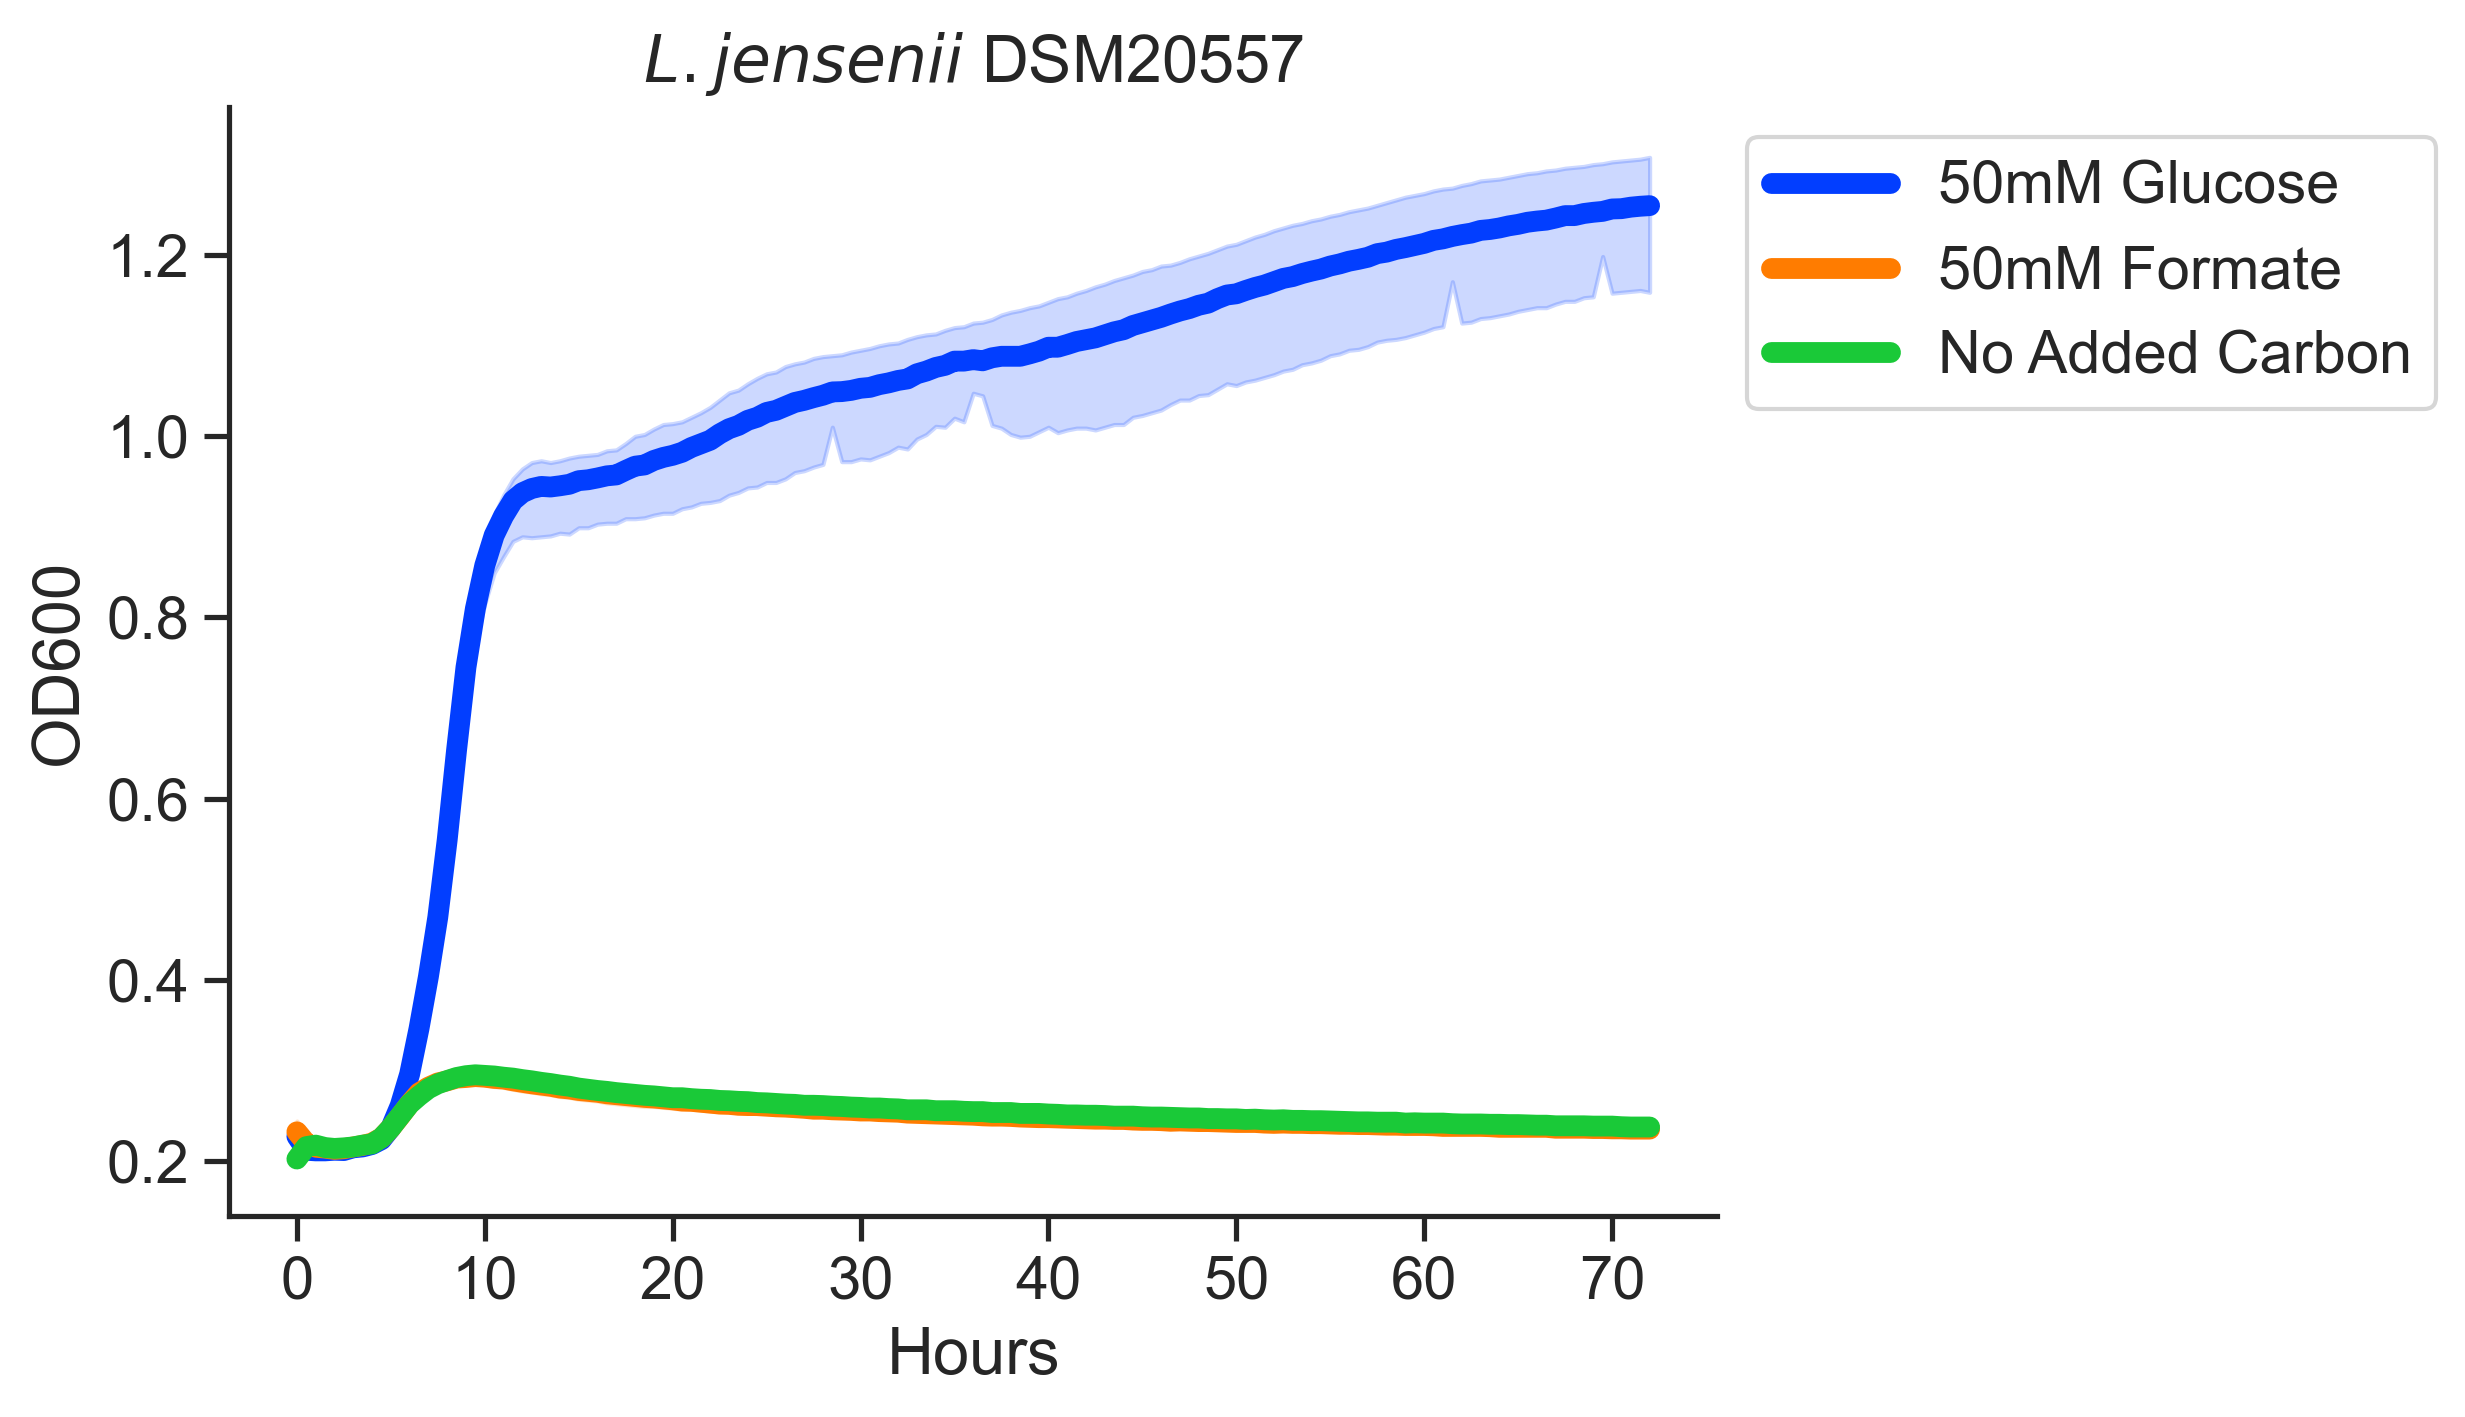

In [17]:
dfToPlot = sliceDFByStrain(df22324, 'DSM20557', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='$\it{L. jensenii}$ DSM20557', xlabel='Hours')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-23-24_dsm20557.png'))

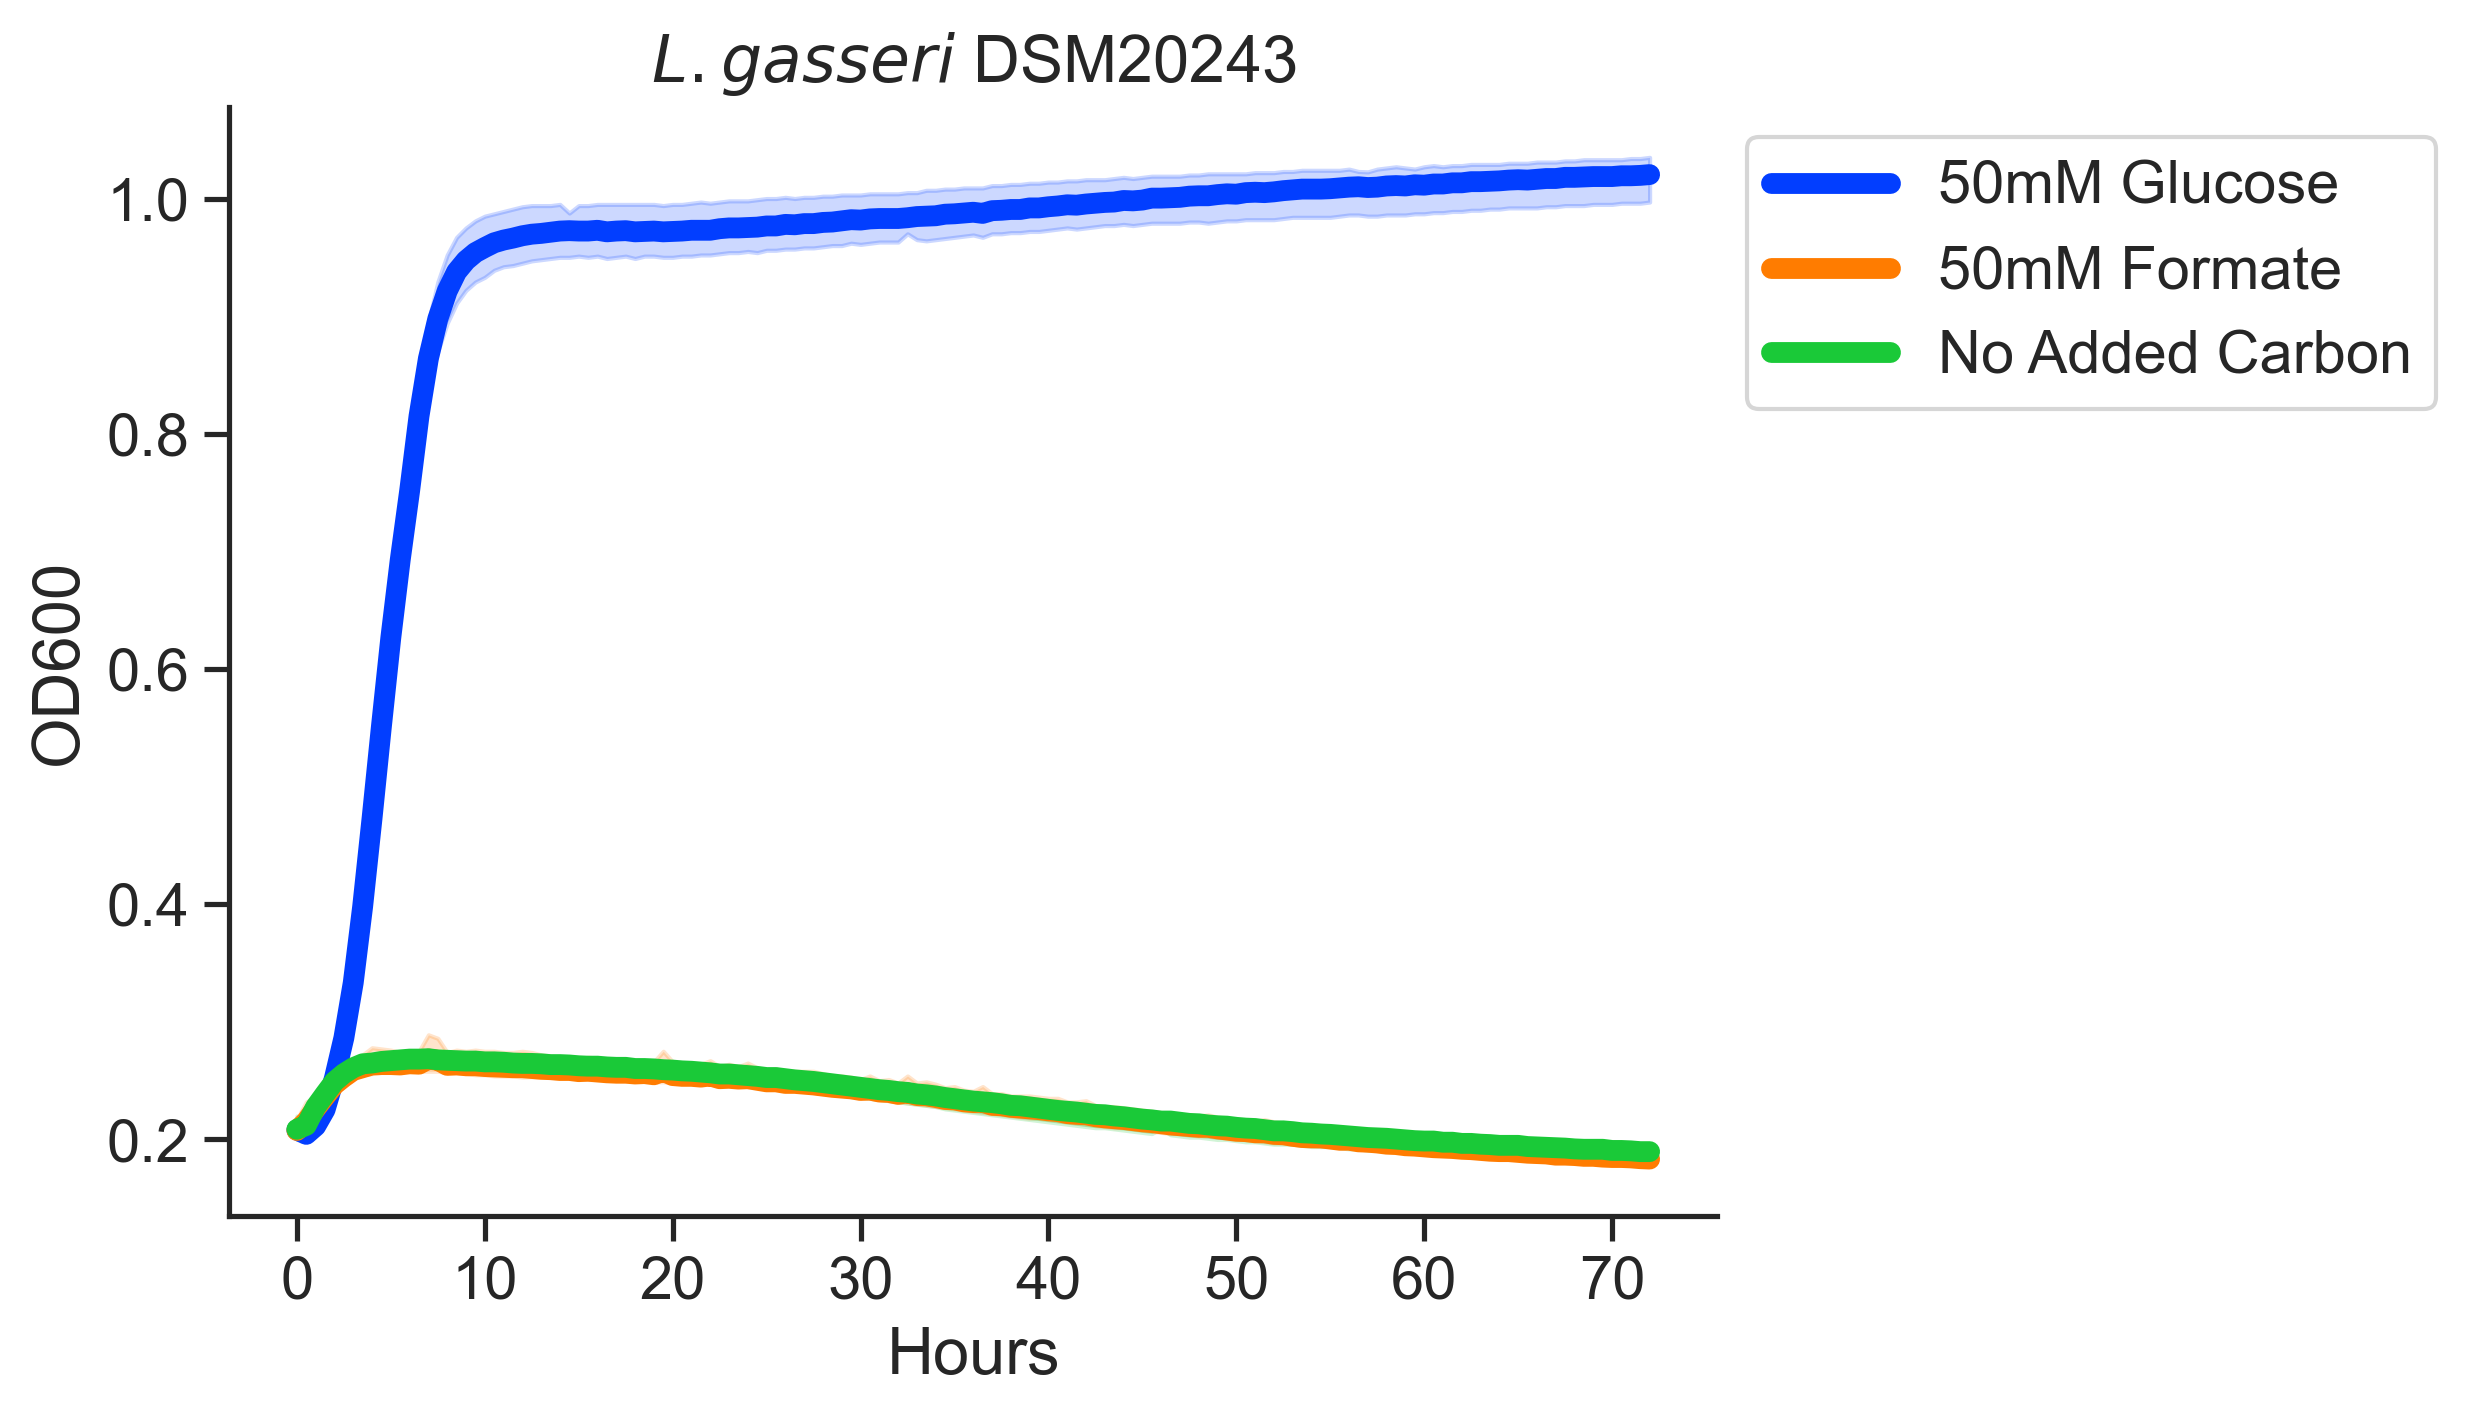

In [18]:
dfToPlot = sliceDFByStrain(df22324, 'DSM20243', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='$\it{L. gasseri}$ DSM20243', xlabel='Hours')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-23-24_dsm20234.png'))

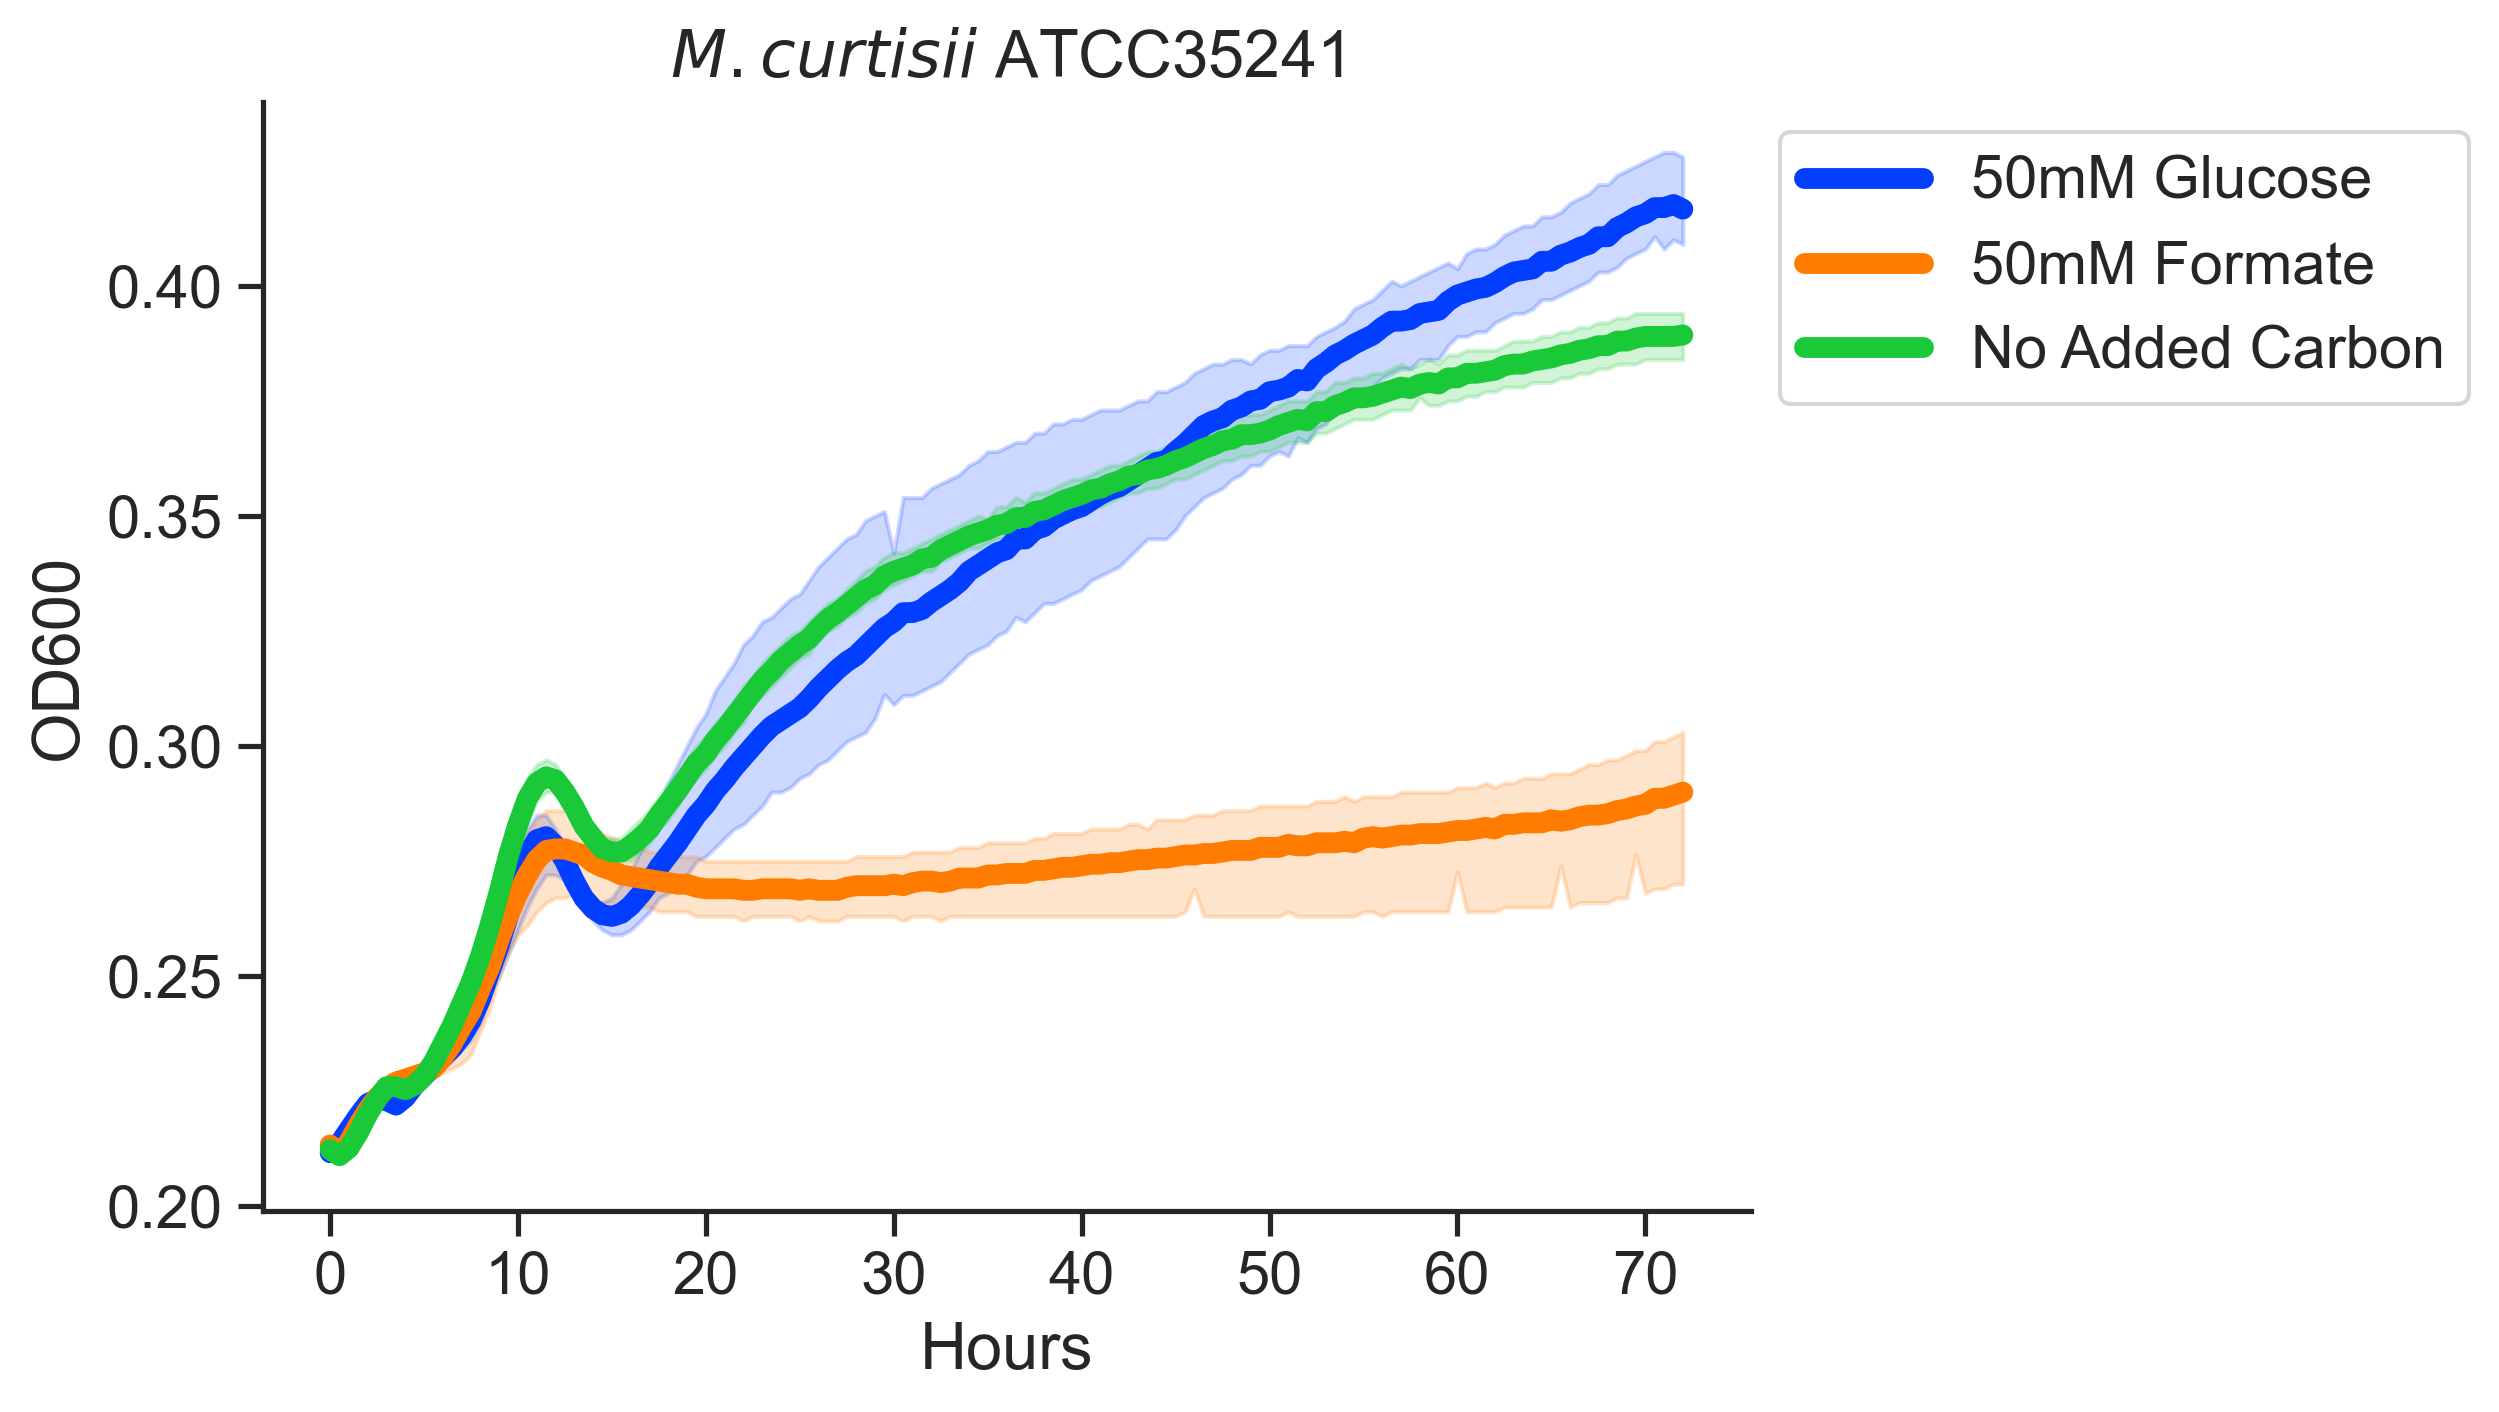

In [23]:
dfToPlot = sliceDFByStrain(df22324, 'ATCC35241', normToNegative=False, treatments=['50mM Glucose', '50mM Formate', 'No Added Carbon'])
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='$\it{M. curtisii}$ ATCC35241', xlabel='Hours')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-23-24_atcc35241.png'))

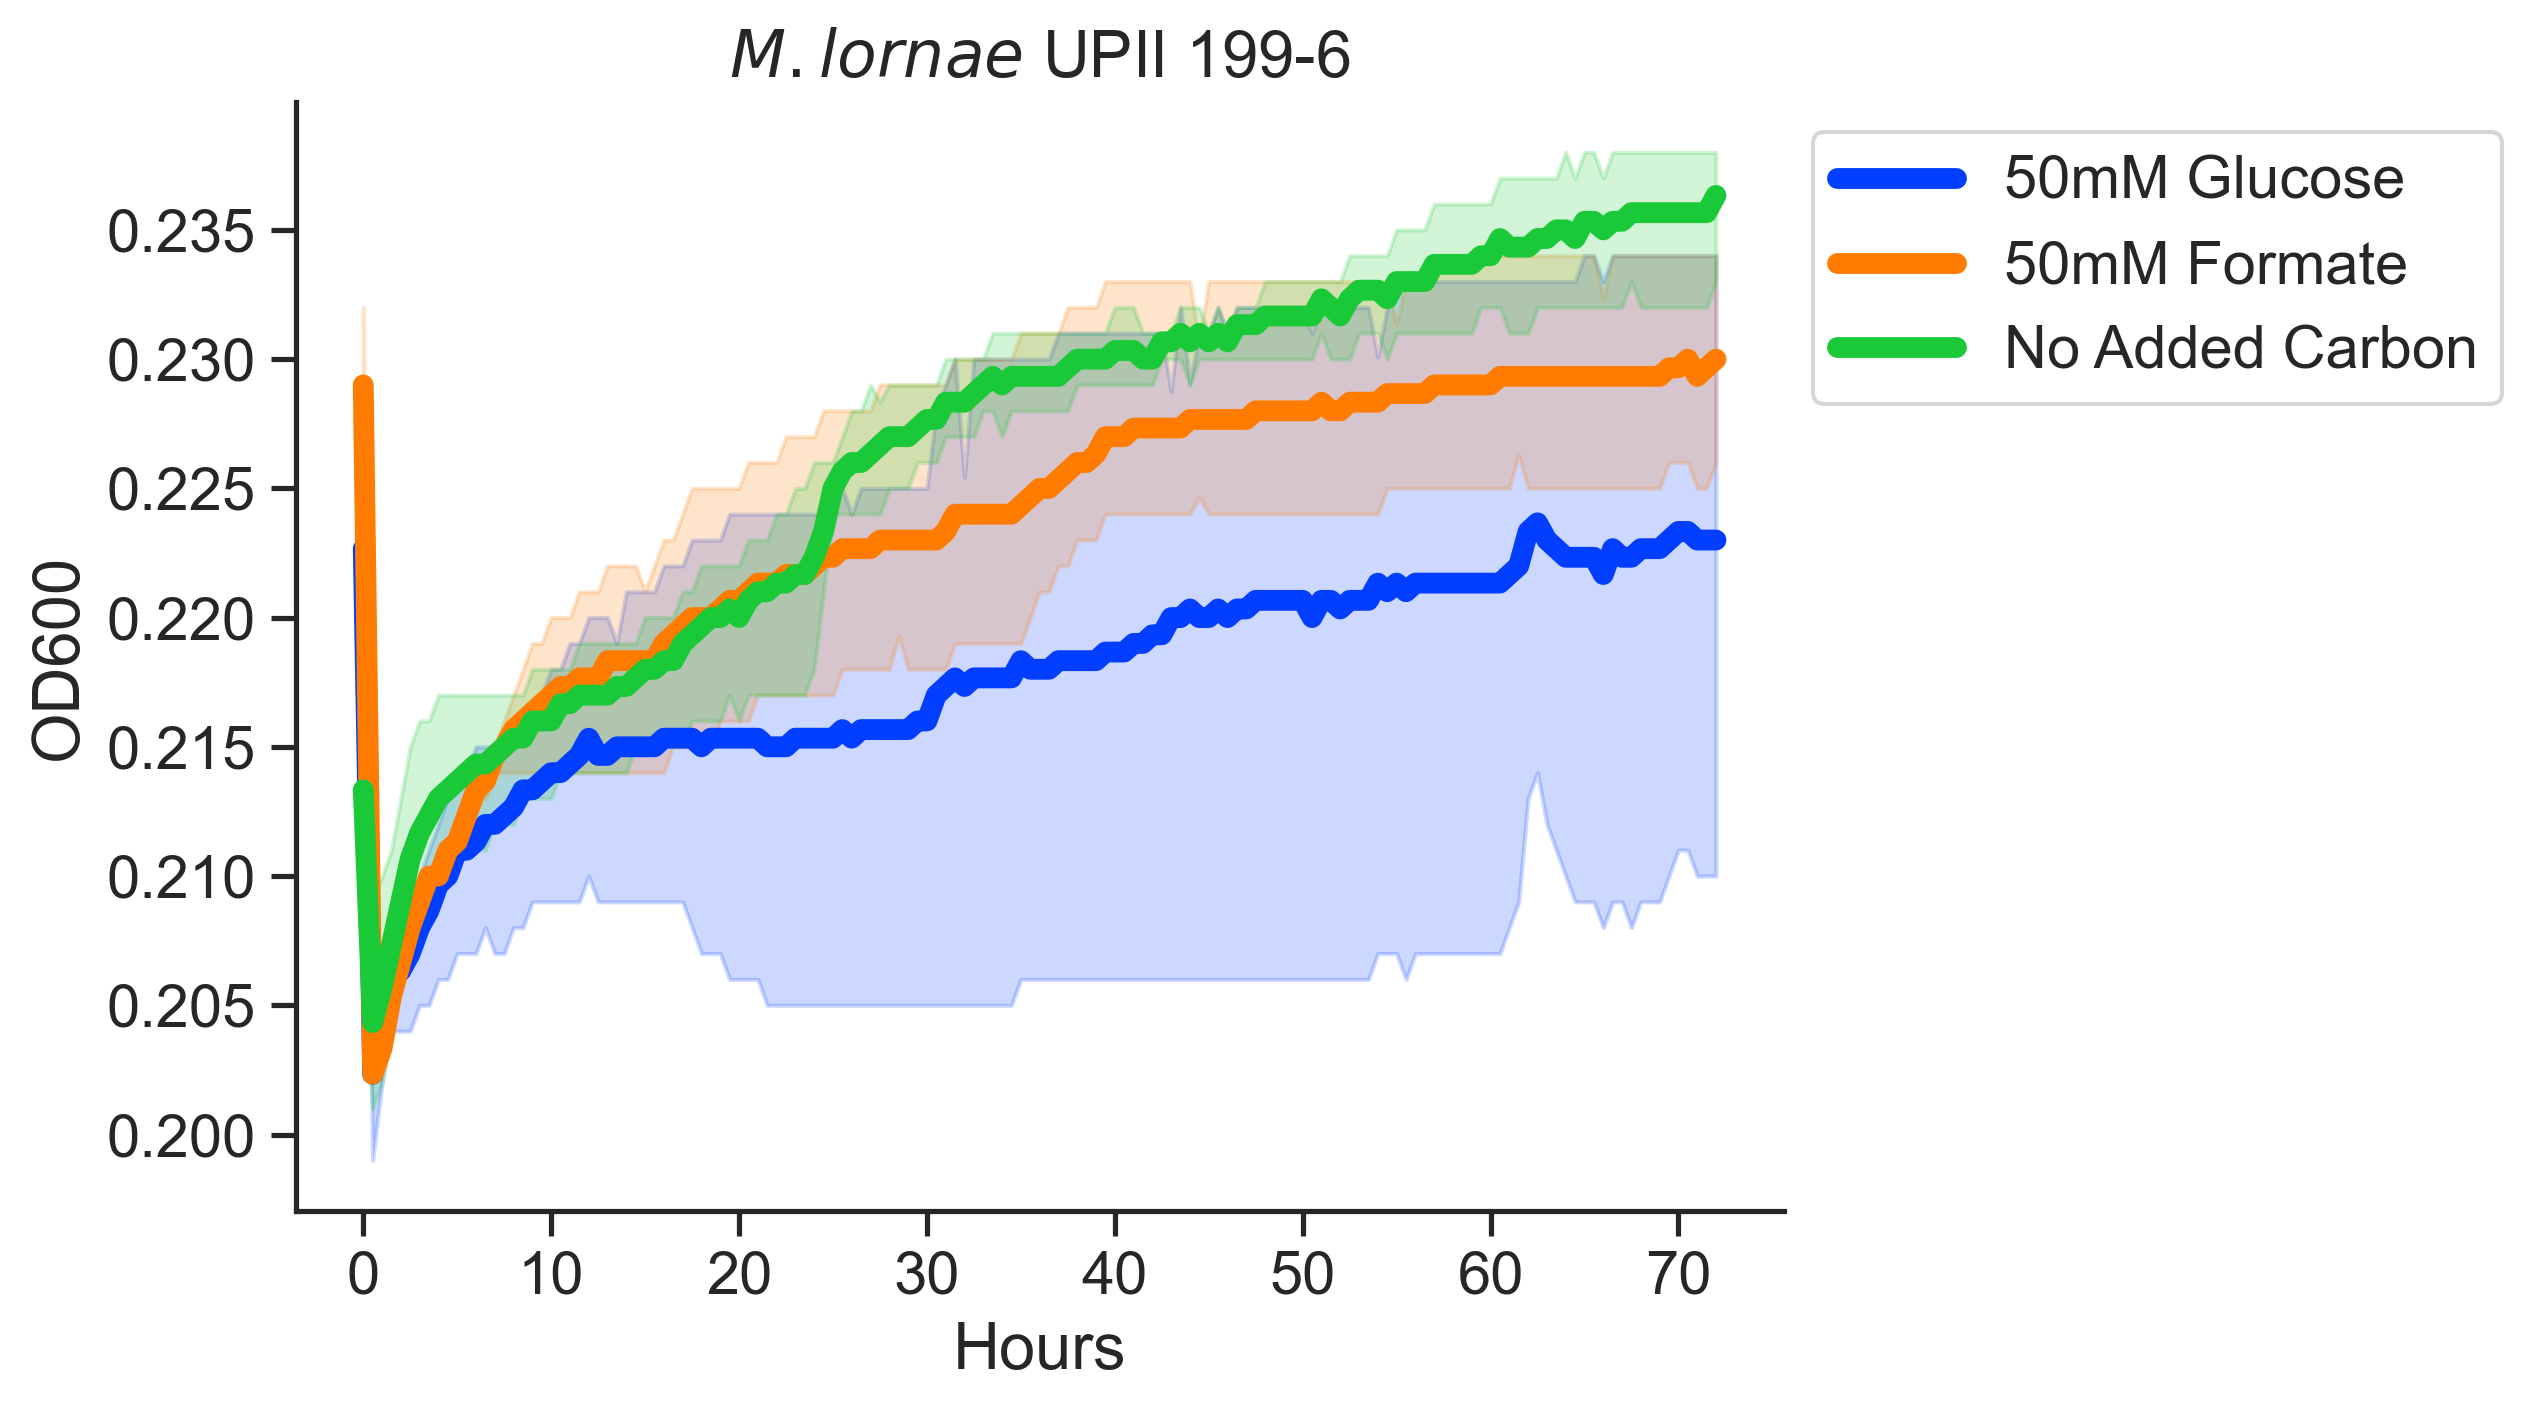

In [24]:
dfToPlot = sliceDFByStrain(df22324, '199-6', normToNegative=False, treatments=['50mM Glucose', '50mM Formate', 'No Added Carbon'])
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='$\it{M. lornae}$ UPII 199-6', xlabel='Hours')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-23-24_199-6.png'))

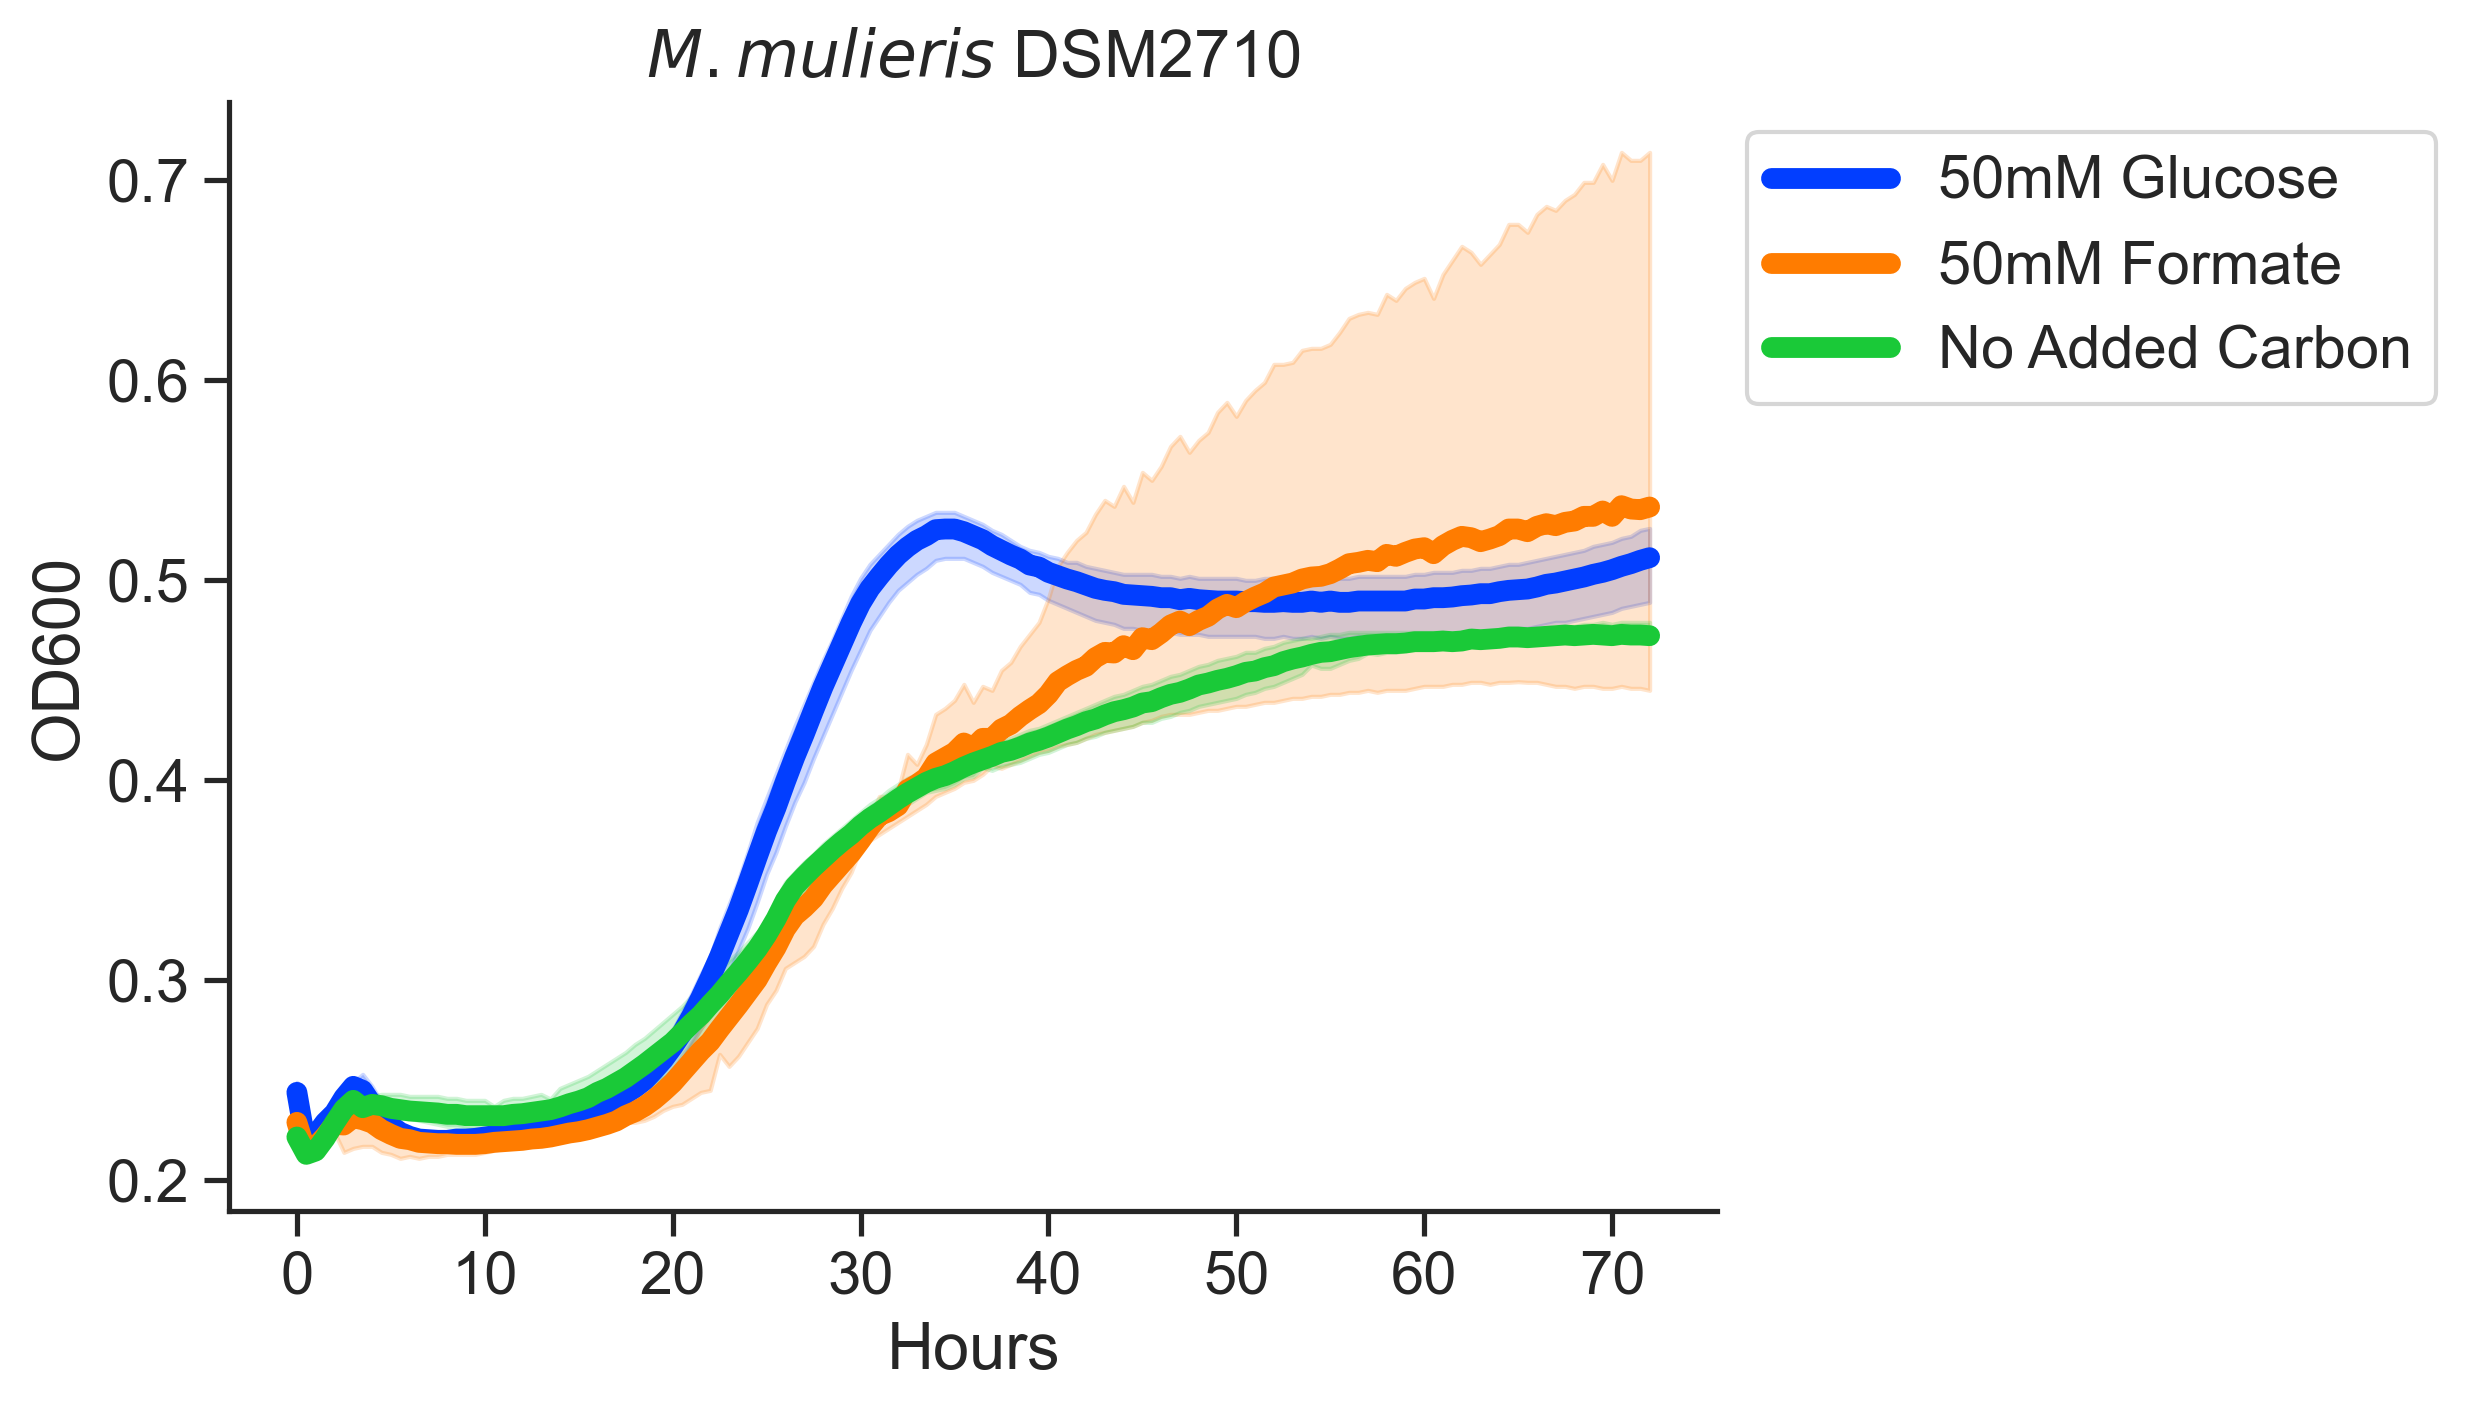

In [25]:
dfToPlot = sliceDFByStrain(df22324, 'DSM2710', normToNegative=False, treatments=['50mM Glucose', '50mM Formate', 'No Added Carbon'])
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='$\it{M. mulieris}$ DSM2710', xlabel='Hours')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-23-24_dsm2710.png'))

Although it was nice to have the kinetic data on the growth of these different organisms, I think I'm going to present them as the ratio of growth for 50mM formate compared to No Added Carbon.

In [32]:
# For each isolate, pull out the OD600 data for both no added carbon and 50mM formate after 72hrs, then calculate the ratios

# Helper function that pulls ODs for a strain at the specified time for 50mM formate and No Added Carbon and appends them to a dict
def odAtTime(dataframe, toAppendNone, toAppendForm, time):
    for index, row in dataframe.iterrows():
        if float(row['Time']) == time:
            if row['Strain'] == 'Negative' or row['Strain'] == 'DNF01141':
                continue
            if row['Treatment'] == '50mM Formate':
                if not row['Strain'] in toAppendForm:
                    toAppendForm[row['Strain']] = []
                toAppendForm[row['Strain']].append(float(row['OD600']))
            elif row['Treatment'] == 'No Added Carbon':
                if not row['Strain'] in toAppendNone:
                    toAppendNone[row['Strain']] = []
                toAppendNone[row['Strain']].append(float(row['OD600']))

In [33]:
noneOds = {} # key=strain, value=[3 no added carbon ODs @ 72hrs]
formateOds = {} # key=strain, value=[3 formate ODs @ 72hrs]
odAtTime(df21624, noneOds, formateOds, 72)
odAtTime(df22324, noneOds, formateOds, 72)

In [34]:
# Calculate ratios for each strain, then graph it
ratiosData = {'Strain':[], 'Ratio':[]}
for strain in formateOds.keys():
    formateList = formateOds[strain]
    noneList = noneOds[strain]
    for i in range(len(formateList)):
        ratiosData['Strain'].append(strain)
        ratiosData['Ratio'].append(formateList[i] / noneList[i])

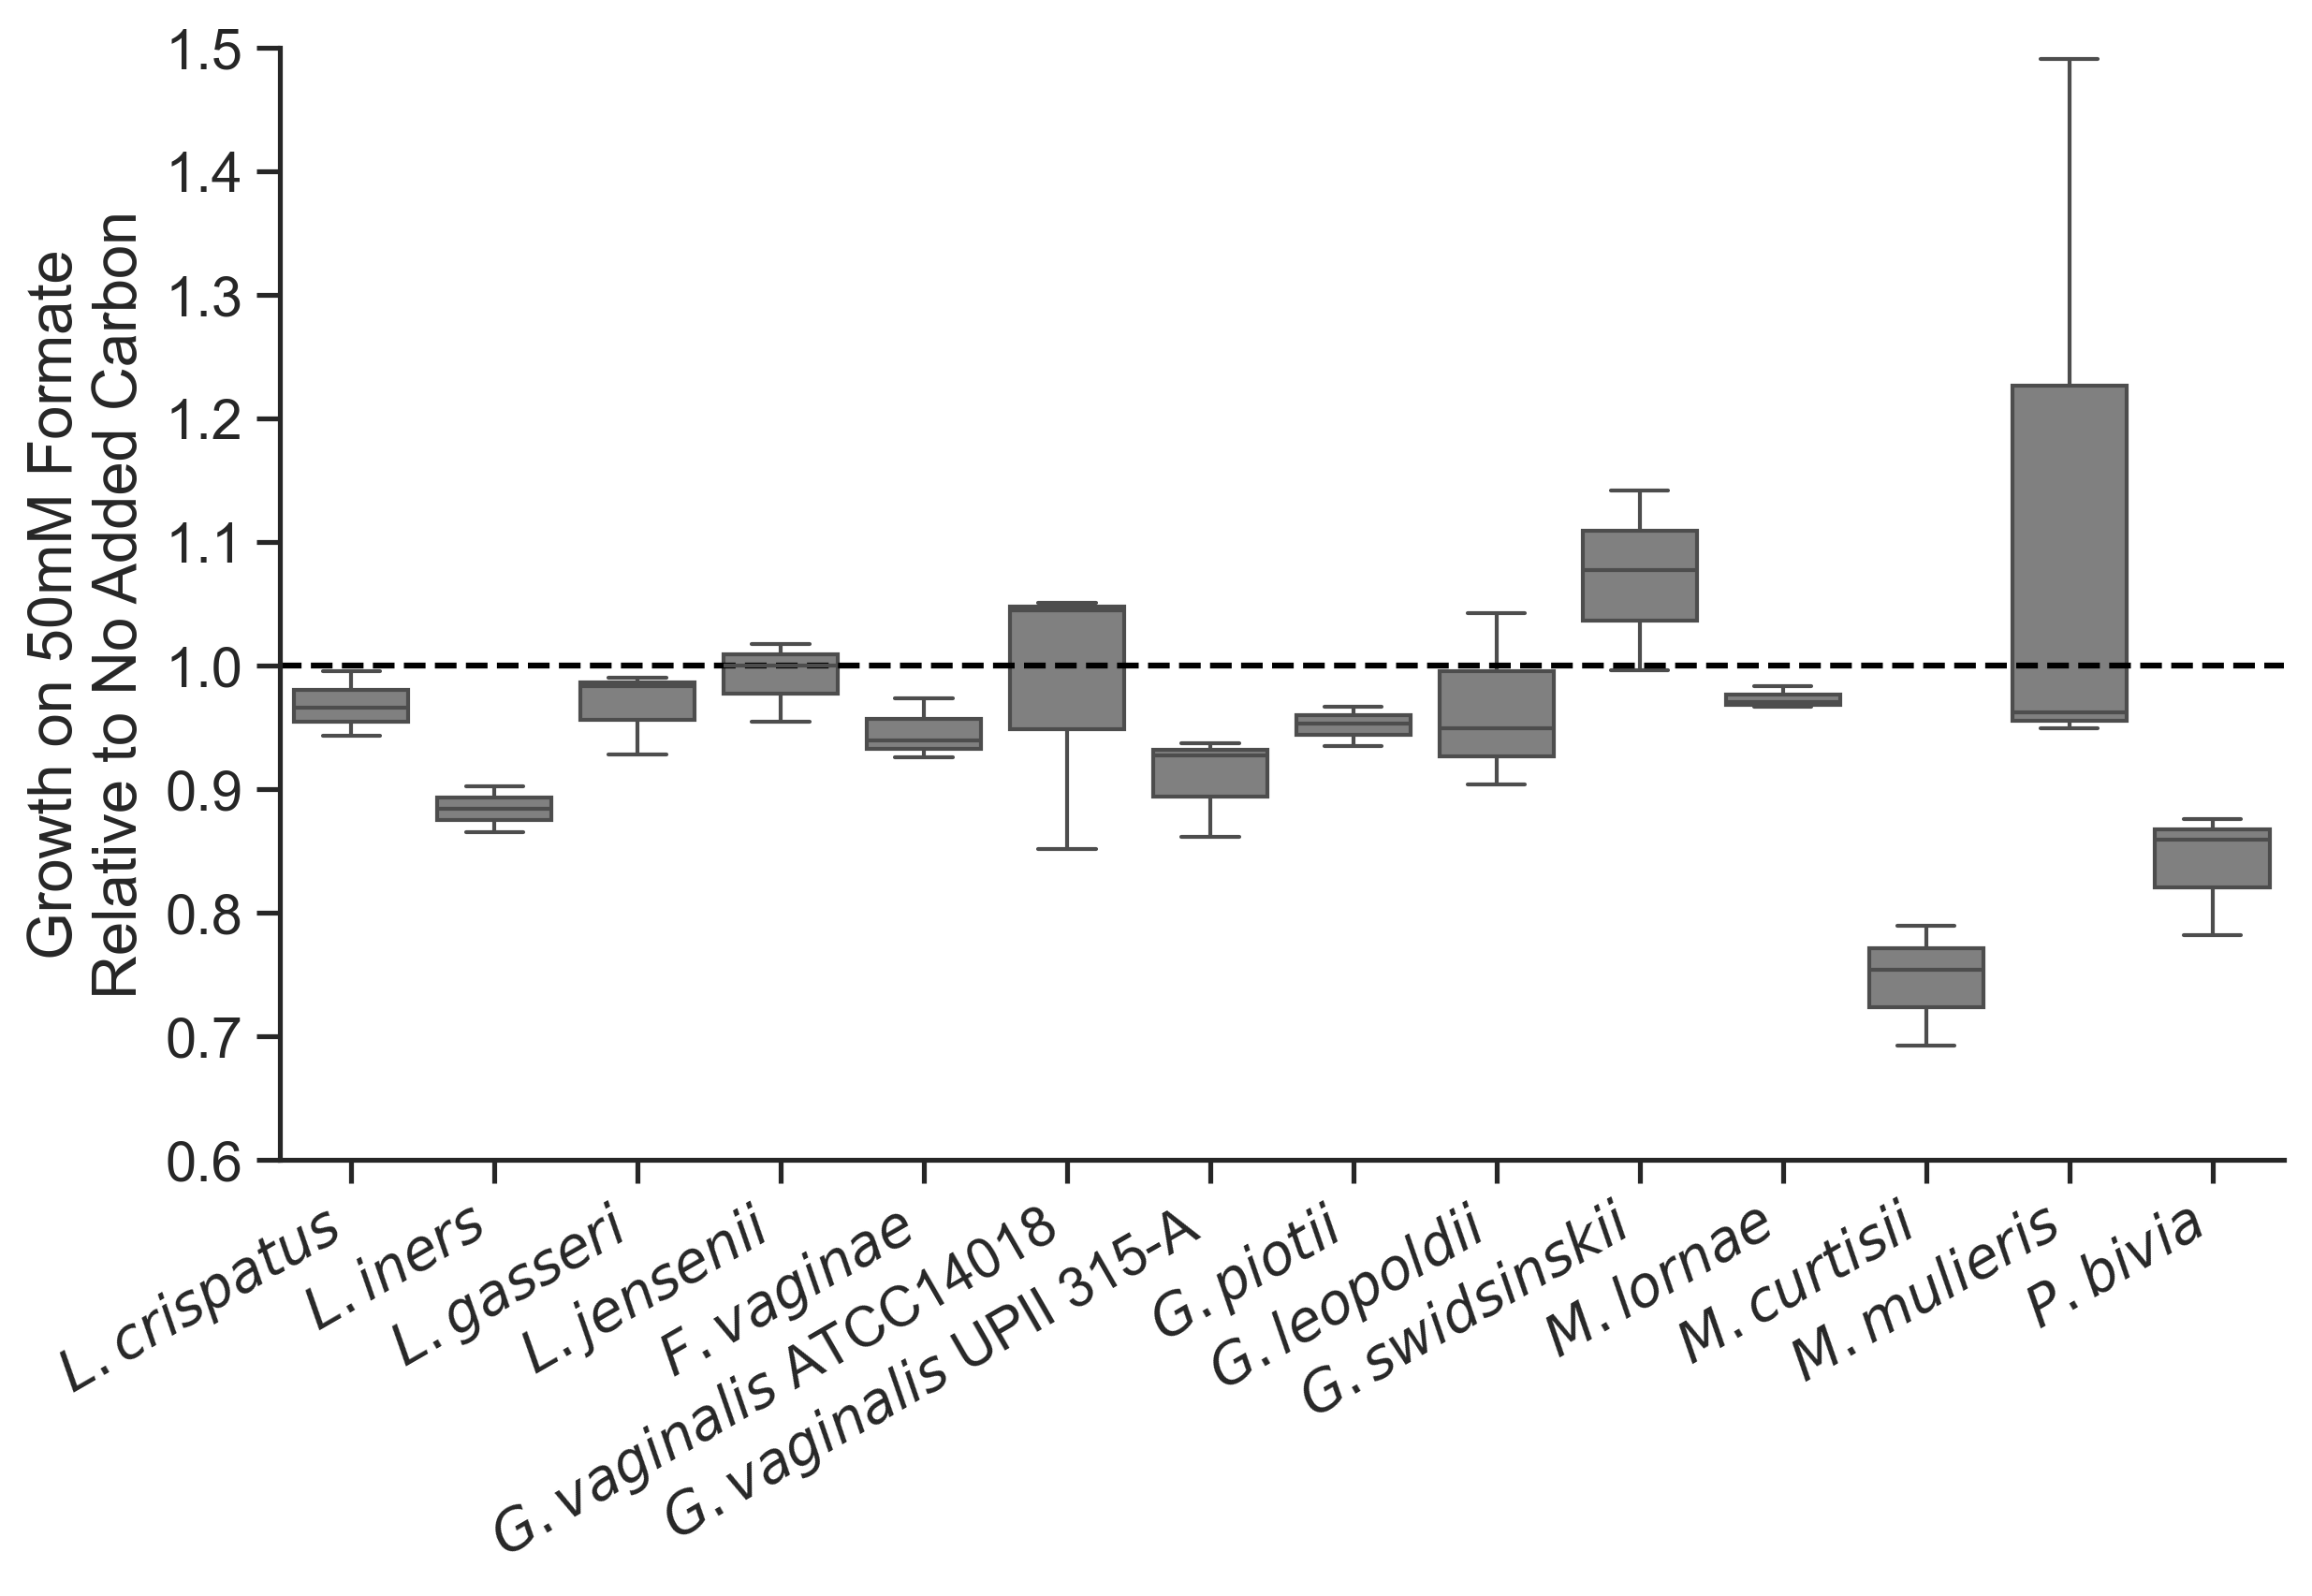

In [38]:
order = ['ATCC33197', 'DSM13335', 'DSM20243', 'DSM20557', 'DSM15829', 'ATCC14018', '315-A', 'JCP8066', 'CCUG72425', 'CCUG72429', '199-6', 'ATCC35241', 'DSM2710', 'DSM20514']
ratiosPlot = sns.catplot(data=pd.DataFrame(ratiosData), x='Strain', y='Ratio', order=order, kind='box', aspect=1.7, color='gray')
ratiosPlot.set(ylabel='Growth on 50mM Formate\nRelative to No Added Carbon', xlabel='', ylim=(0.6, 1.5))
ratiosPlot.set_xticklabels(['$\it{L. crispatus}$', '$\it{L. iners}$', '$\it{L. gasseri}$', '$\it{L. jensenii}$', '$\it{F. vaginae}$', '$\it{G. vaginalis}$ ATCC14018', '$\it{G. vaginalis}$ UPII 315-A', '$\it{G. piotii}$', '$\it{G. leopoldii}$', '$\it{G. swidsinskii}$', '$\it{M. lornae}$', '$\it{M. curtisii}$', '$\it{M. mulieris}$', '$\it{P. bivia}$'], rotation=30, ha='right')
plt.axhline(1, ls='--', color='black')
ratiosPlot.savefig(figPath.joinpath('formate_utilization_ratios.png'), bbox_inches='tight', dpi=300)

In [15]:
# Data from pyruvate growth curves
data22524 = pd.read_csv(analysisPath.joinpath('2-25-24_pyruvate.csv'))
strains22524 = [
    ['315-A', '315-A', '315-A', '315-A', 'JCP8066', 'JCP8066', 'JCP8066', 'JCP8066', 'CCUG72429', 'CCUG72429', 'CCUG72429', 'CCUG72429'],
    ['315-A', '315-A', '315-A', '315-A', 'JCP8066', 'JCP8066', 'JCP8066', 'JCP8066', 'CCUG72429', 'CCUG72429', 'CCUG72429', 'CCUG72429'],
    ['315-A', '315-A', '315-A', '315-A', 'JCP8066', 'JCP8066', 'JCP8066', 'JCP8066', 'CCUG72429', 'CCUG72429', 'CCUG72429', 'CCUG72429'],
    ['KA00274', 'KA00274', 'KA00274', 'KA00274', '', '', '', '', '', '', '', ''],
    ['KA00274', 'KA00274', 'KA00274', 'KA00274', '', '', '', '', '', '', '', ''],
    ['KA00274', 'KA00274', 'KA00274', 'KA00274', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '']
]
treatments22524 = [
    ['0 mmol', '0 mmol', '0 mmol', '0 mmol', '0 mmol', '0 mmol', '0 mmol', '0 mmol', '0 mmol', '0 mmol', '0 mmol', '0 mmol'],
    ['10 mmol', '10 mmol', '10 mmol', '10 mmol', '10 mmol', '10 mmol', '10 mmol', '10 mmol', '10 mmol', '10 mmol', '10 mmol', '10 mmol'],
    ['100 mmol', '100 mmol', '100 mmol', '100 mmol', '100 mmol', '100 mmol', '100 mmol', '100 mmol', '100 mmol', '100 mmol', '100 mmol', '100 mmol'],
    ['0 mmol', '0 mmol', '0 mmol', '0 mmol', '',  '', '', '', '', '', '', ''],
    ['10 mmol', '10 mmol', '10 mmol', '10 mmol', '',  '', '', '', '', '', '', ''],
    ['100 mmol', '100 mmol', '100 mmol', '100 mmol', '',  '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '']
]
df22524 = curveData2df(data22524, strains22524, treatments22524)

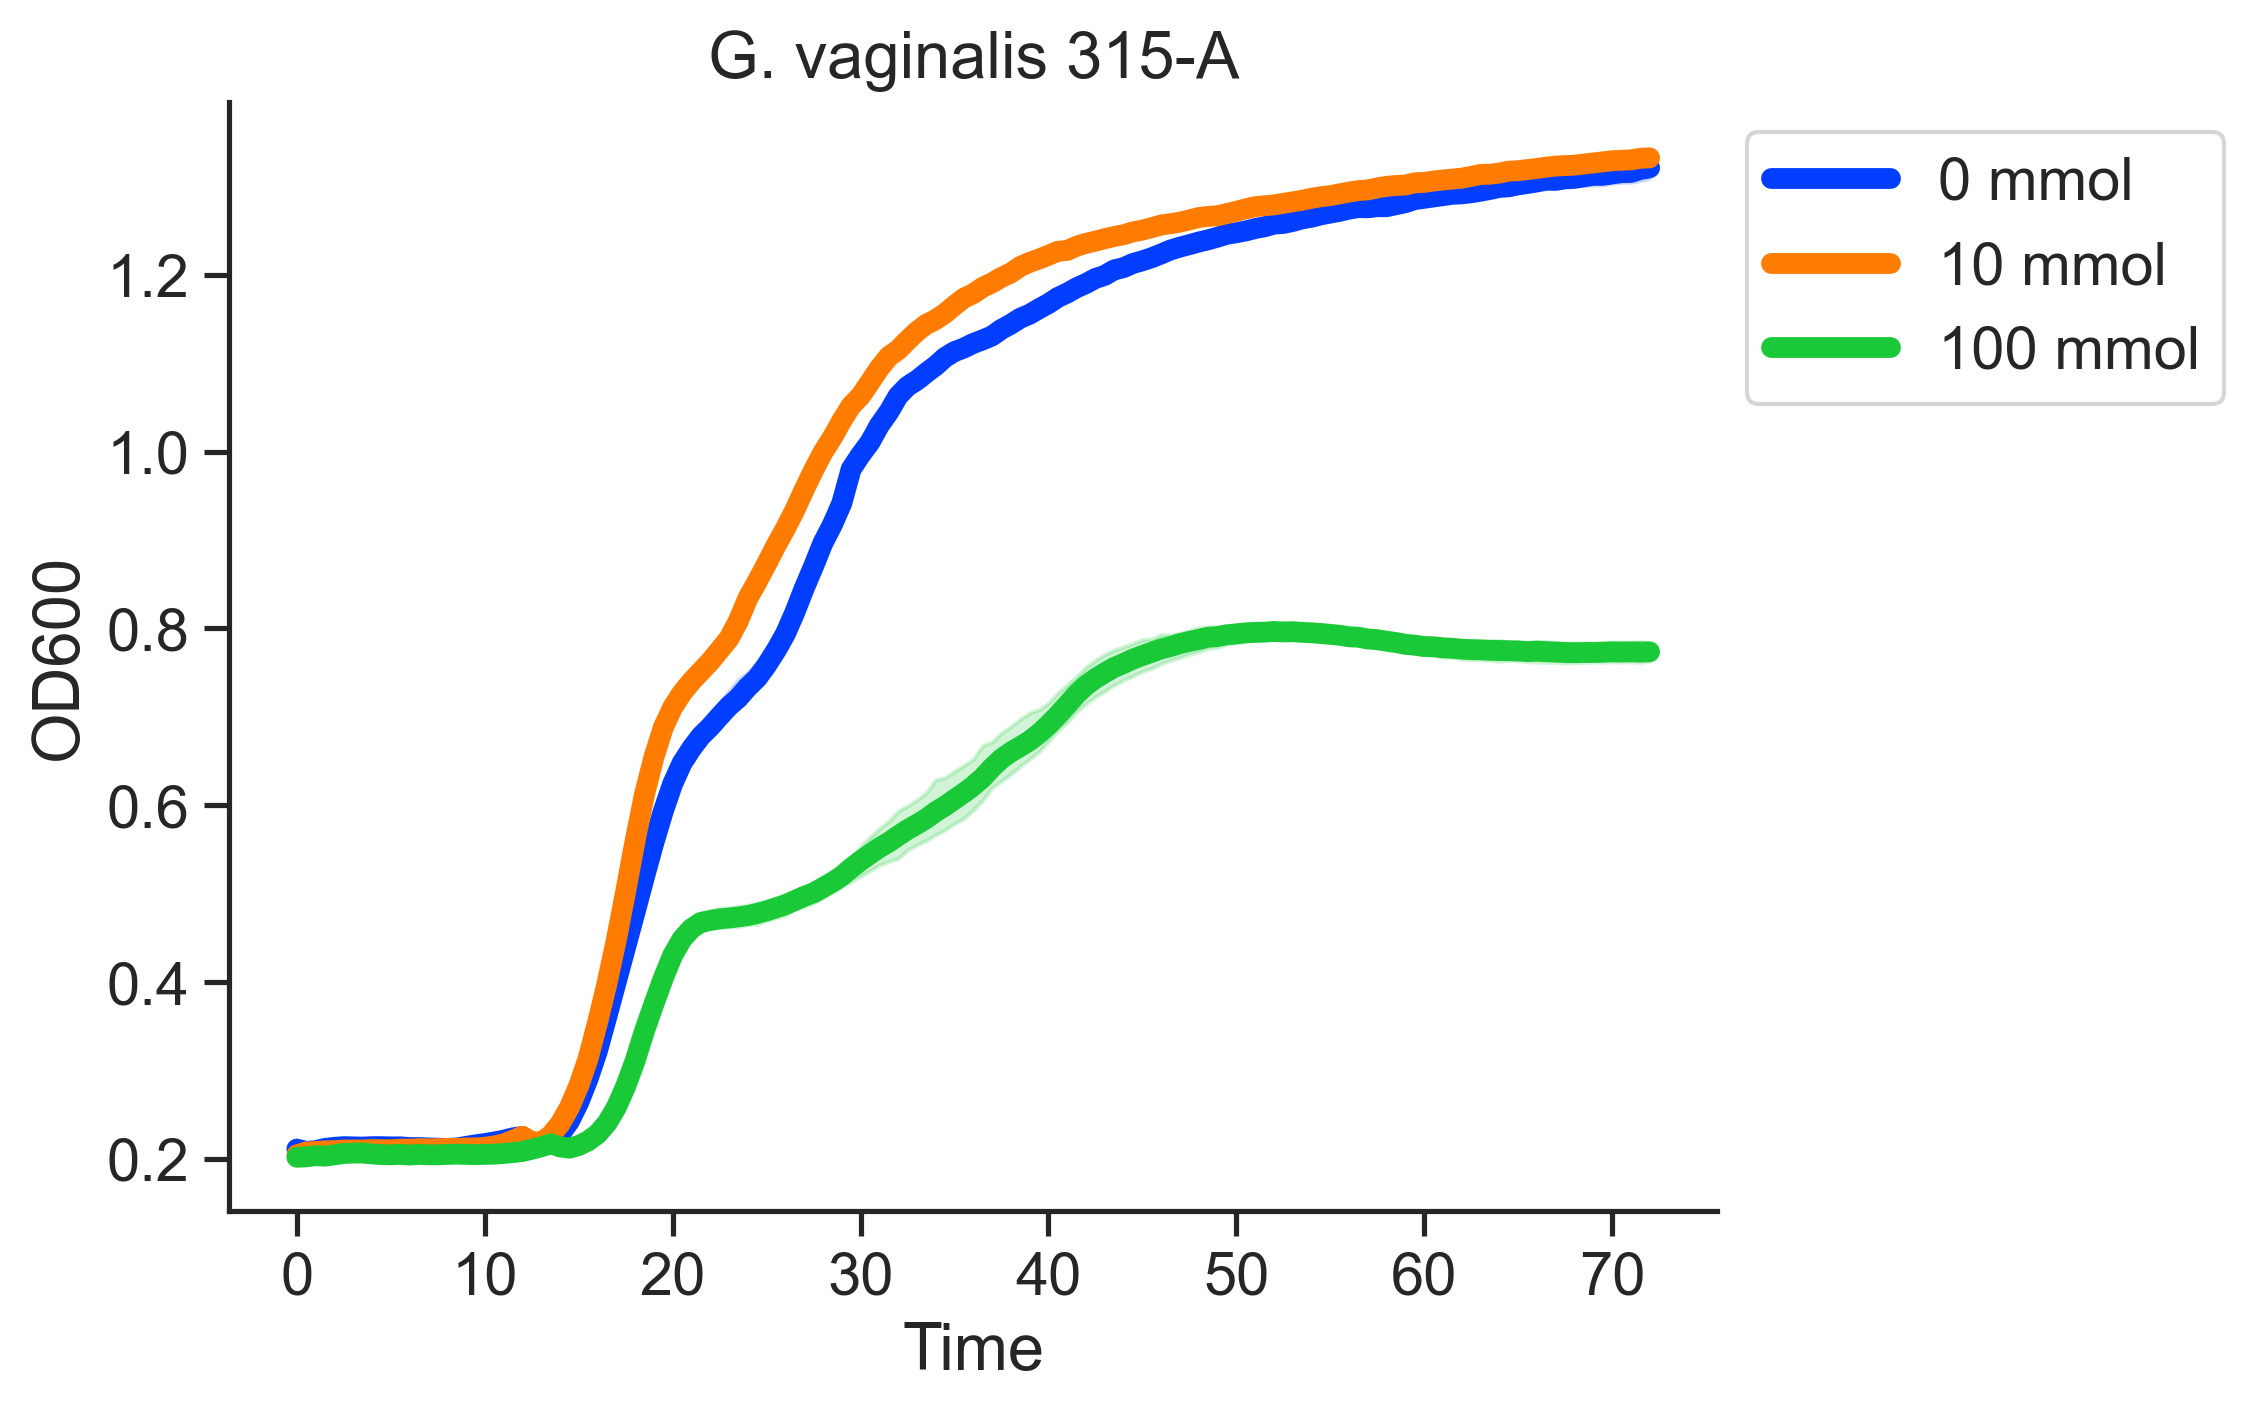

In [8]:
dfToPlot = sliceDFByStrain(df22524, '315-A', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='G. vaginalis 315-A')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-25-24_315a_curve.png'))

In [18]:
# Calculates the percent delta OD600 (difference between the highest and lowest measured ODs in the curve) relative to 0mmol
# Appends the strain name, delta value, and treatments to the supplied lists
def getPercentGrowth(df, strain, strainList, deltaList, treatmentList):
    lowDict = {} # key=treatment name, value=lowest observed OD
    highDict = {} # key=treatment name, value=highest observed OD
    for index, row in df.iterrows():
        if row['Strain'] == strain:
            treatment = row['Treatment']
            if not treatment in lowDict.keys():
                lowDict[treatment] = 100000000
                highDict[treatment] = -100000000
            od = float(row['OD600'])
            if od > highDict[treatment]:
                highDict[treatment] = od
            if od < lowDict[treatment]:
                lowDict[treatment] = od
    treatmentsOfInterest = ['10 mmol', '100 mmol']
    delta = highDict['0 mmol'] - lowDict['0 mmol']
    for t in treatmentsOfInterest:
        strainList.append(strain)
        treatmentList.append(t)
        deltaList.append(((highDict[t] - lowDict[t]) / delta) * 100) 

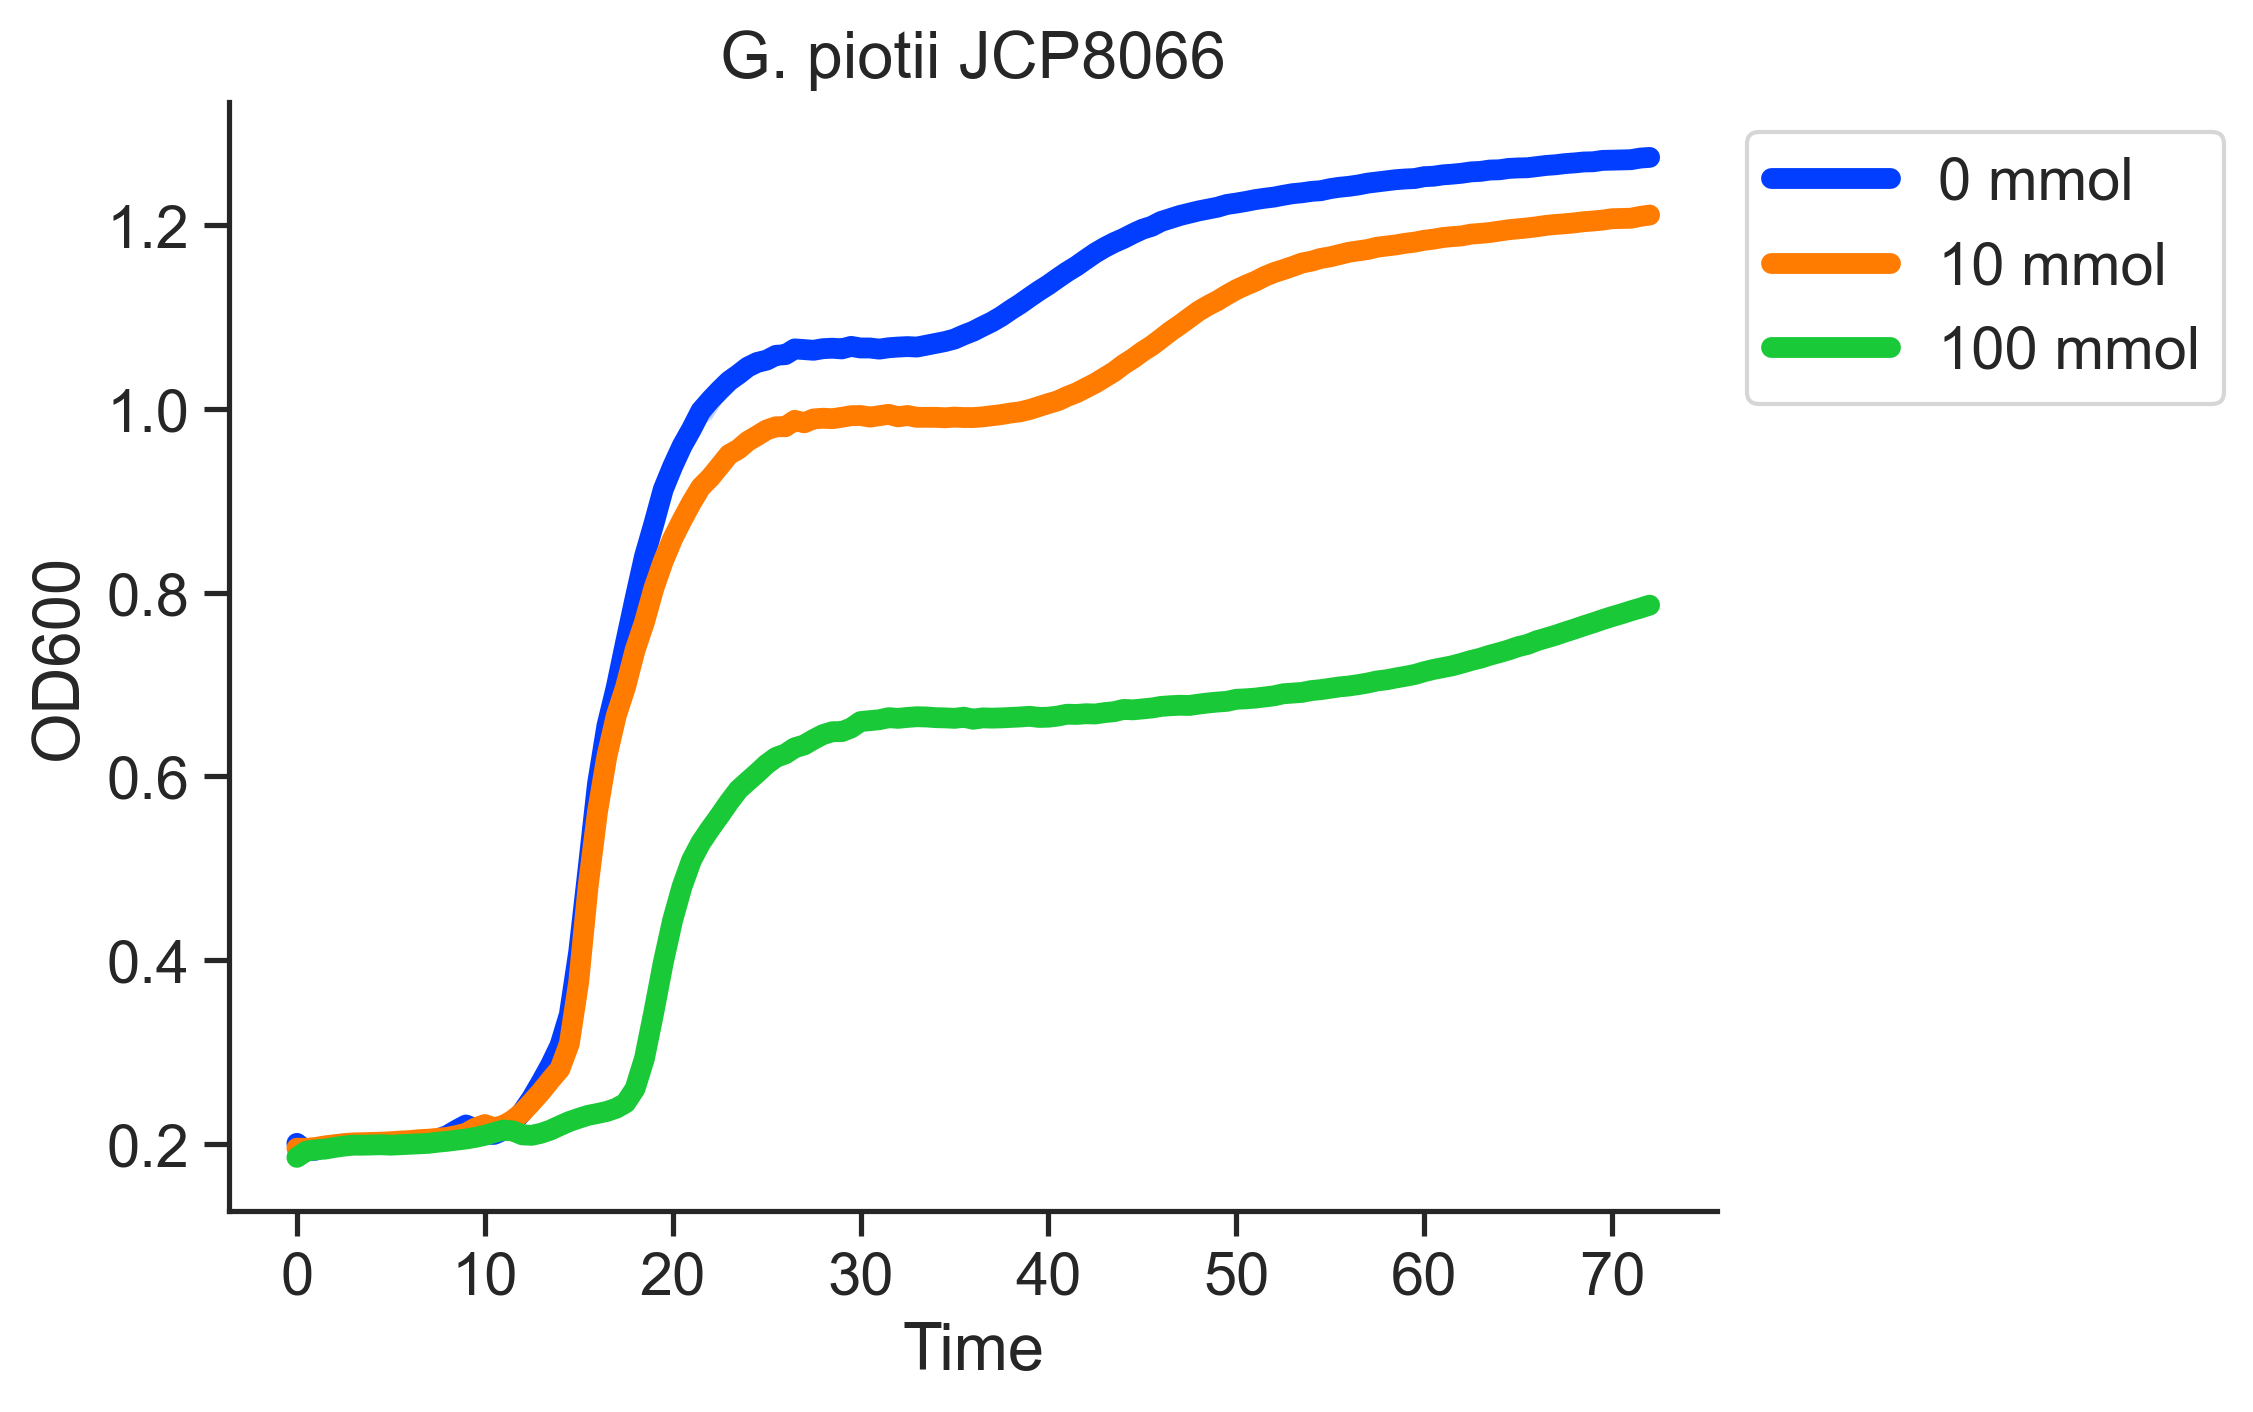

In [9]:
dfToPlot = sliceDFByStrain(df22524, 'JCP8066', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='G. piotii JCP8066')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-25-24_jcp8066_curve.png'))

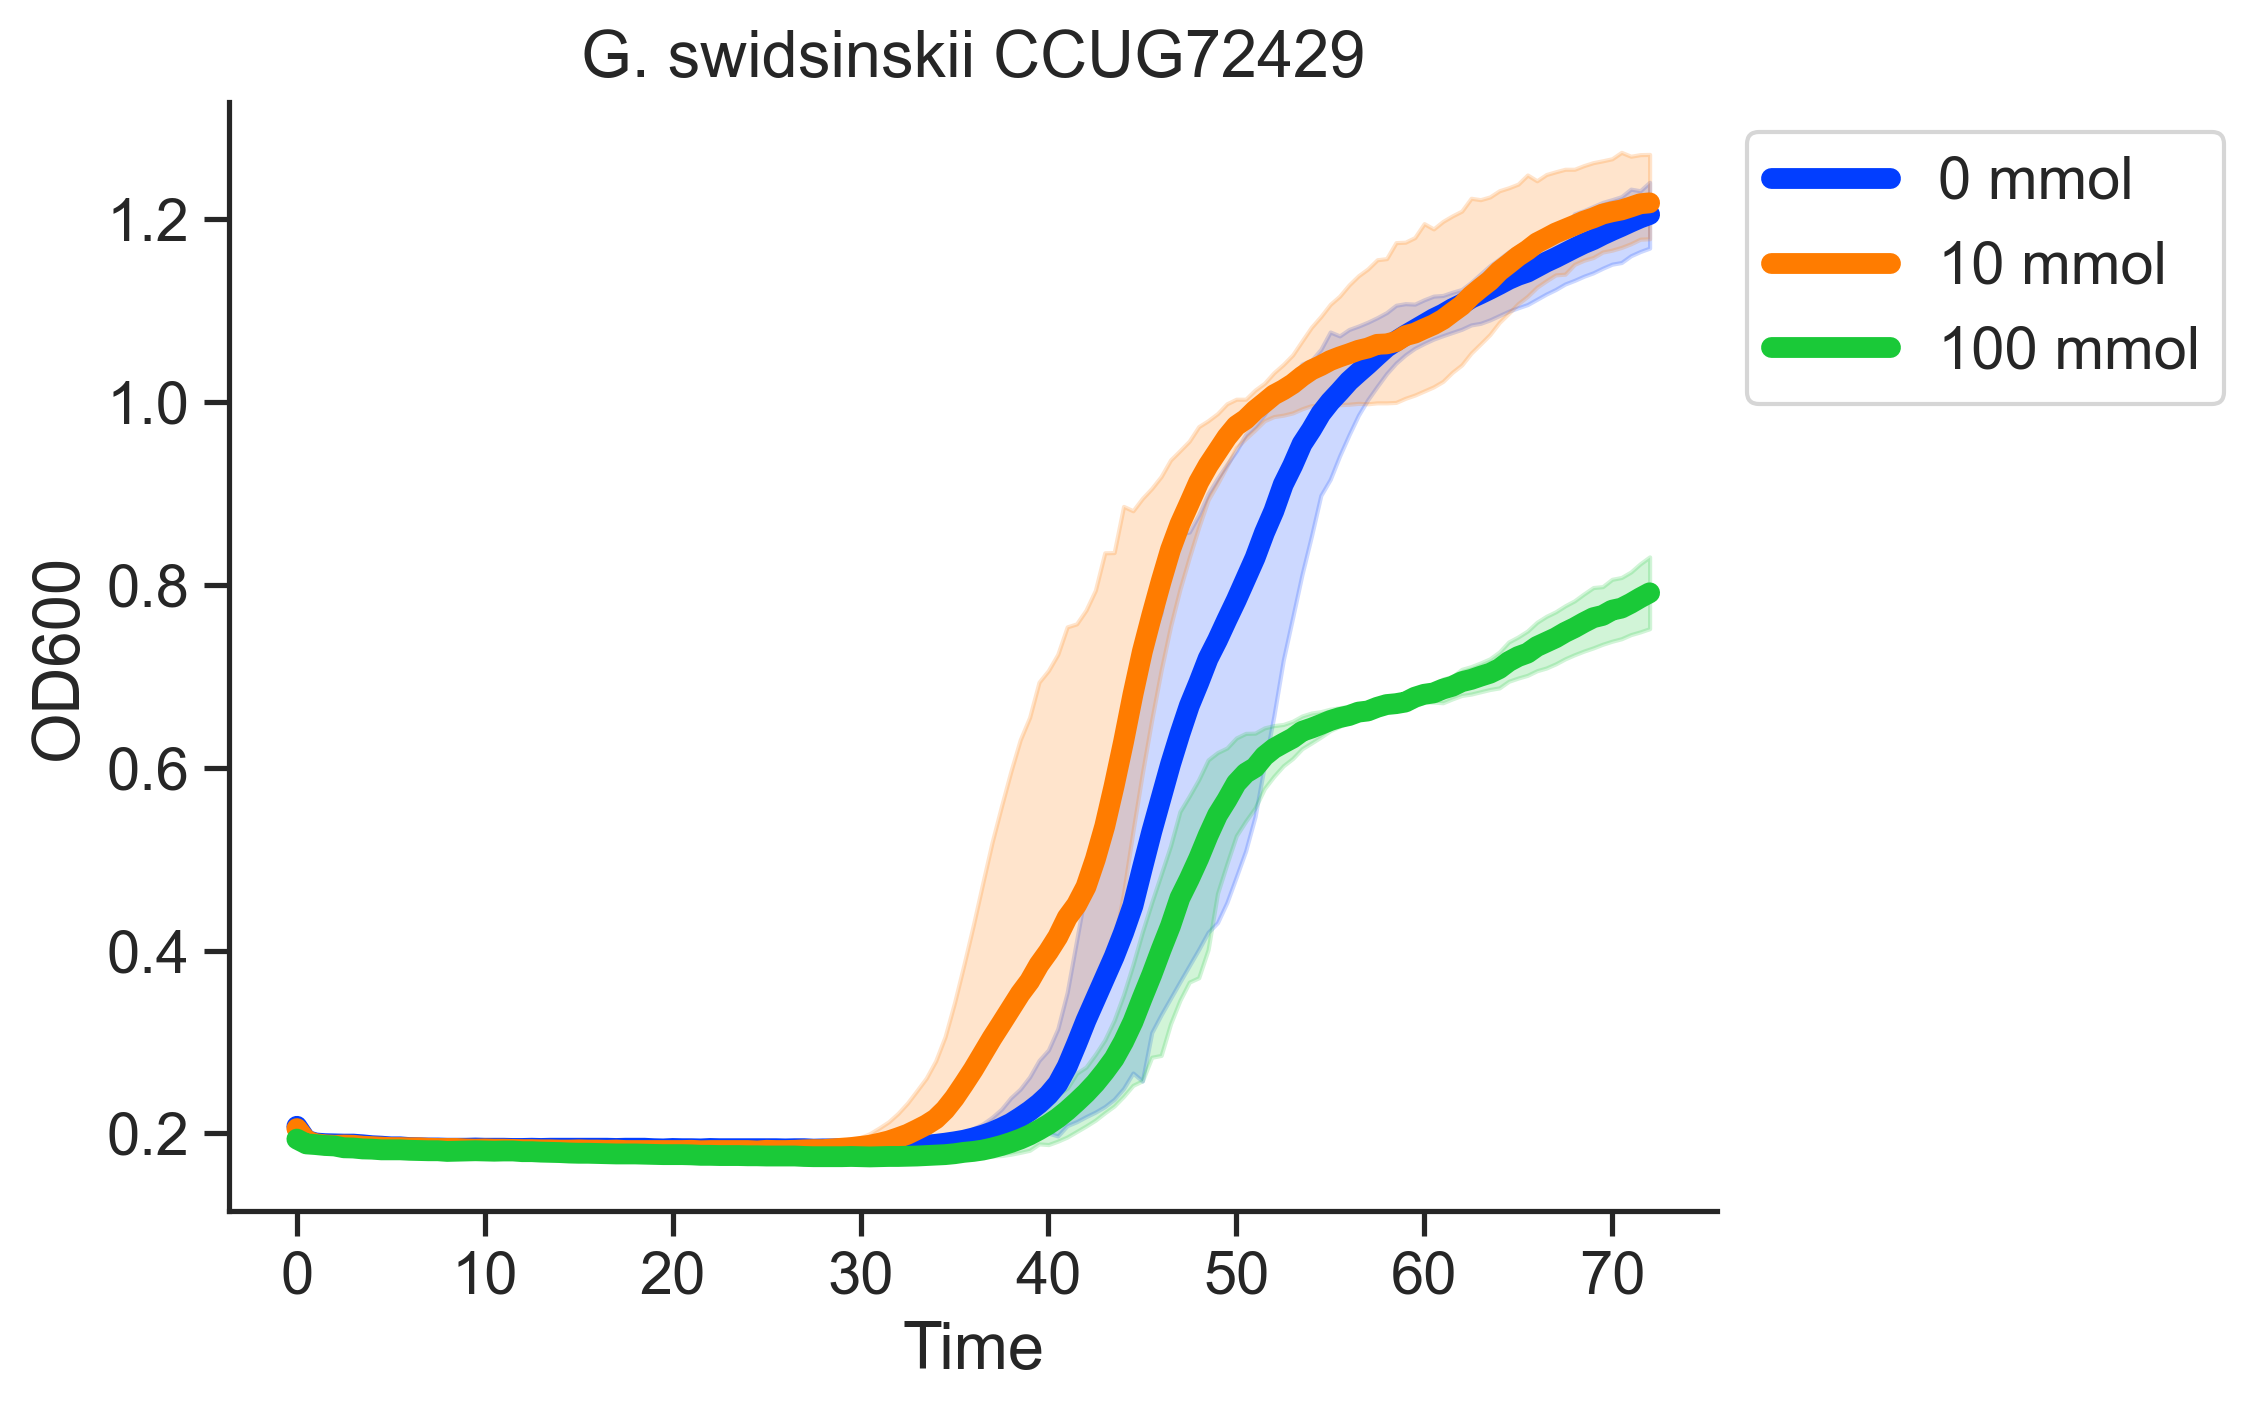

In [10]:
dfToPlot = sliceDFByStrain(df22524, 'CCUG72429', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='G. swidsinskii CCUG72429')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-25-24_72429_curve.png'))

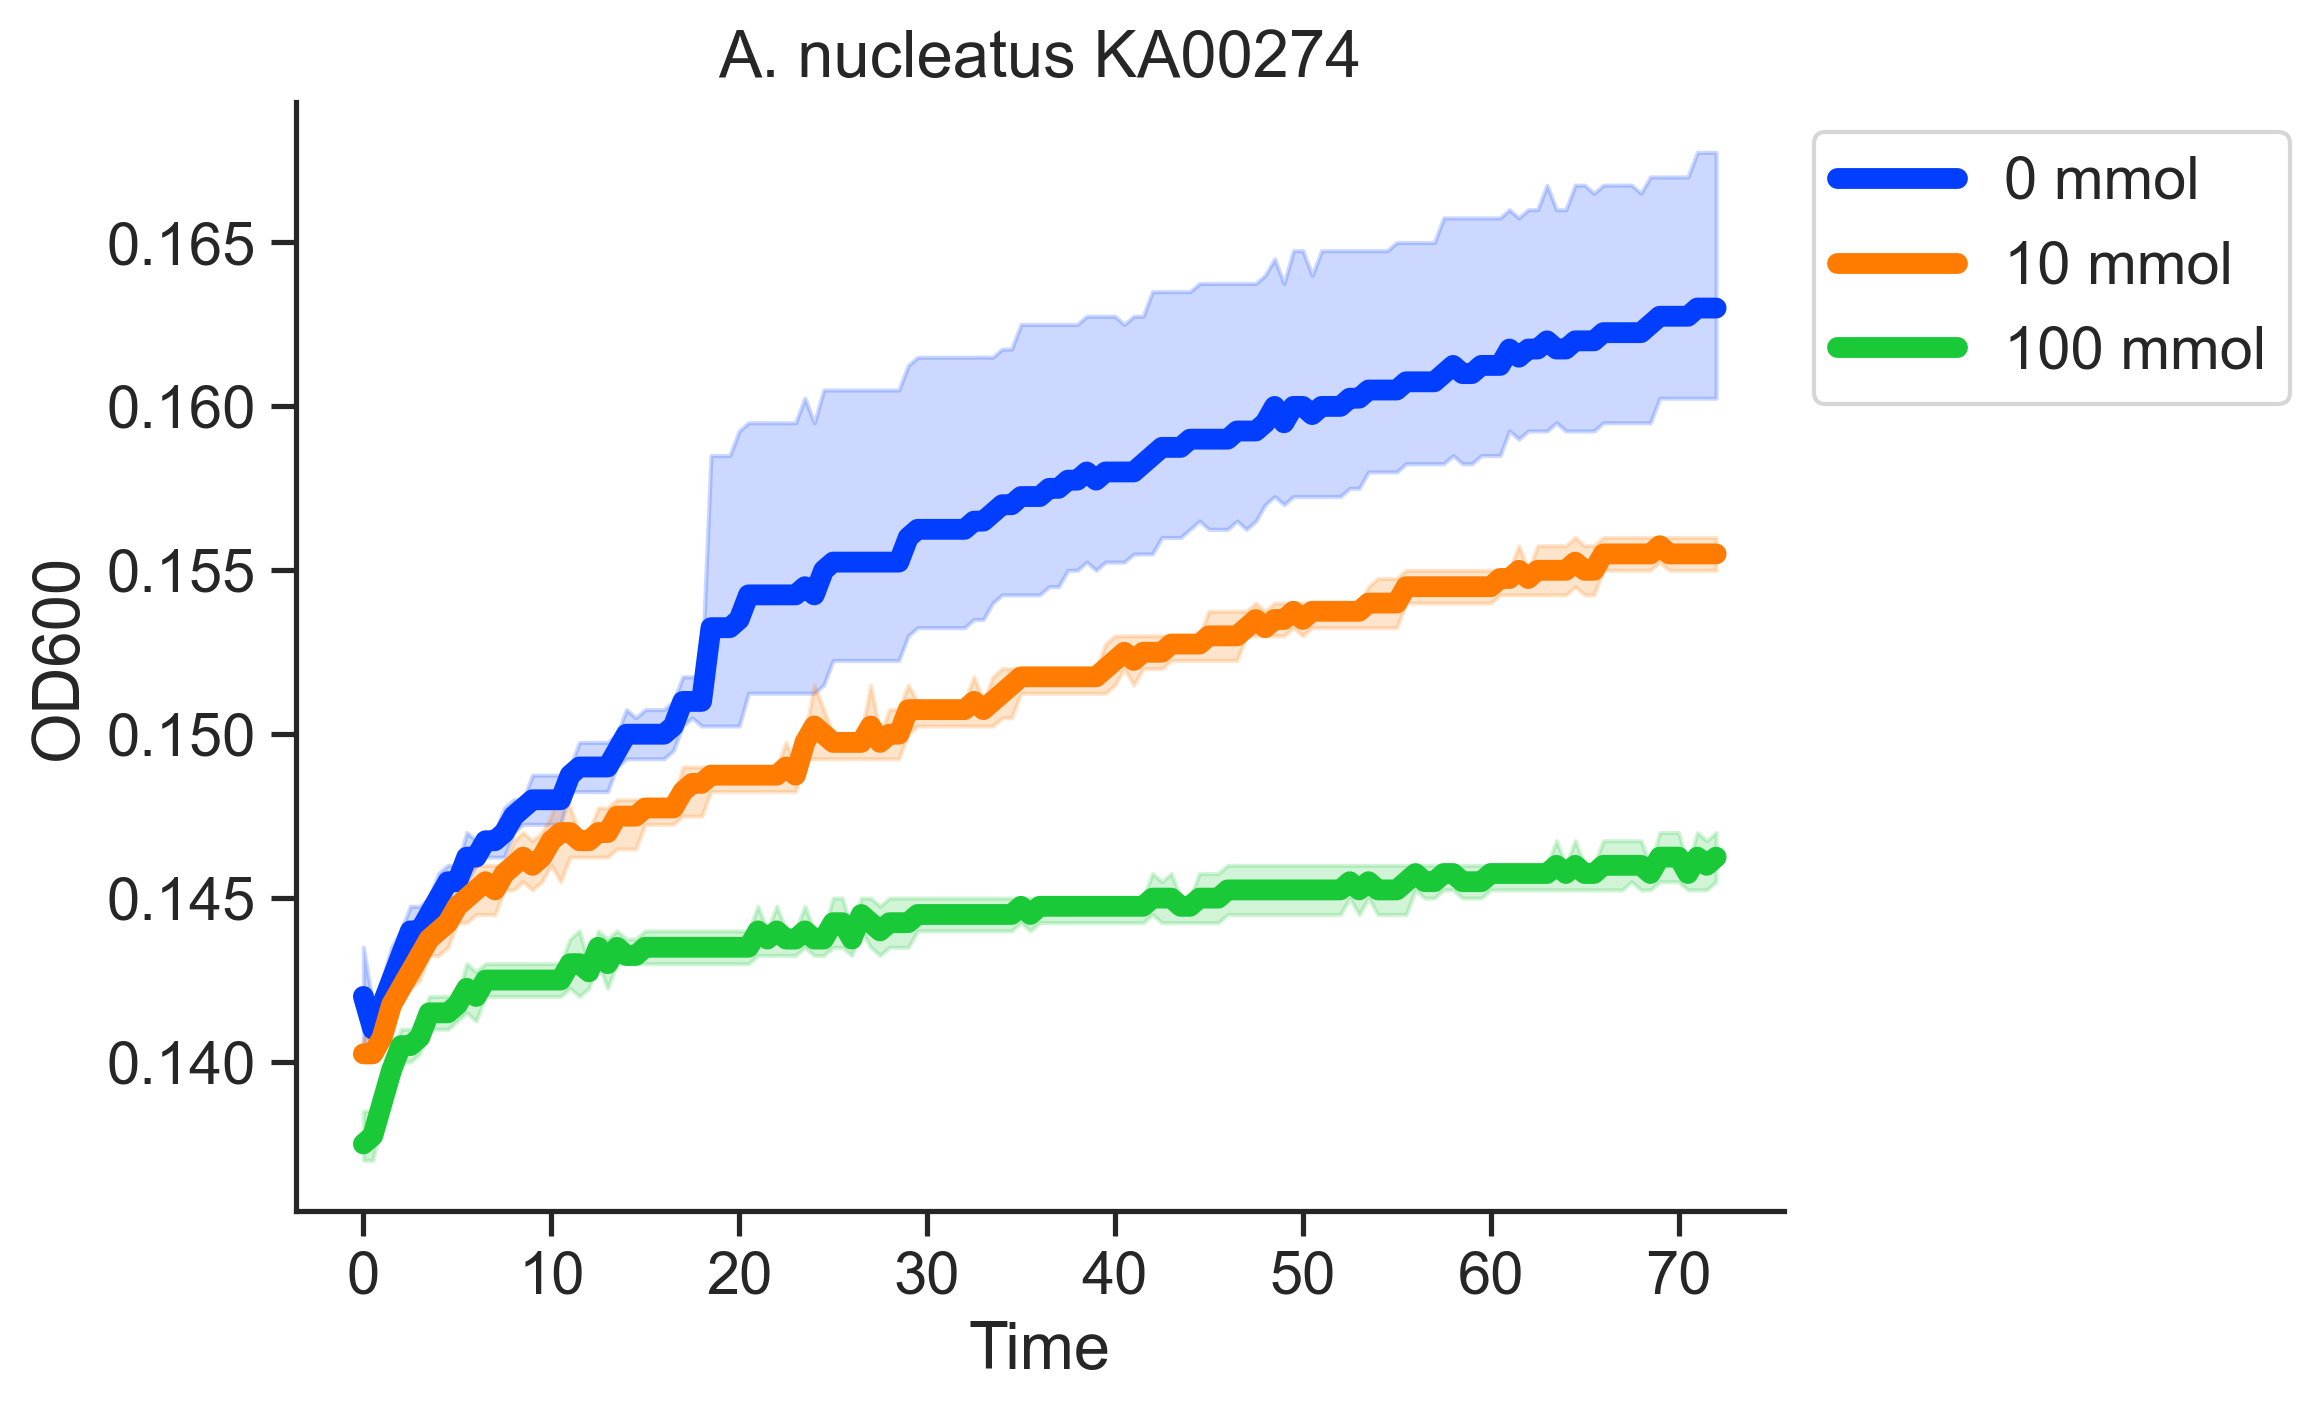

In [12]:
dfToPlot = sliceDFByStrain(df22524, 'KA00274', normToNegative=False)
plot = sns.lineplot(data=dfToPlot, x='Time', y='OD600', hue='Treatment', linewidth=5)
plot.set(title='A. nucleatus KA00274')
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
saveFig(plot, figPath.joinpath('2-25-24_ka274_curve.png'))

In [31]:
percents22524 = pd.read_csv(analysisPath.joinpath('2-25-24_pyruvate_relative_growth.csv'))

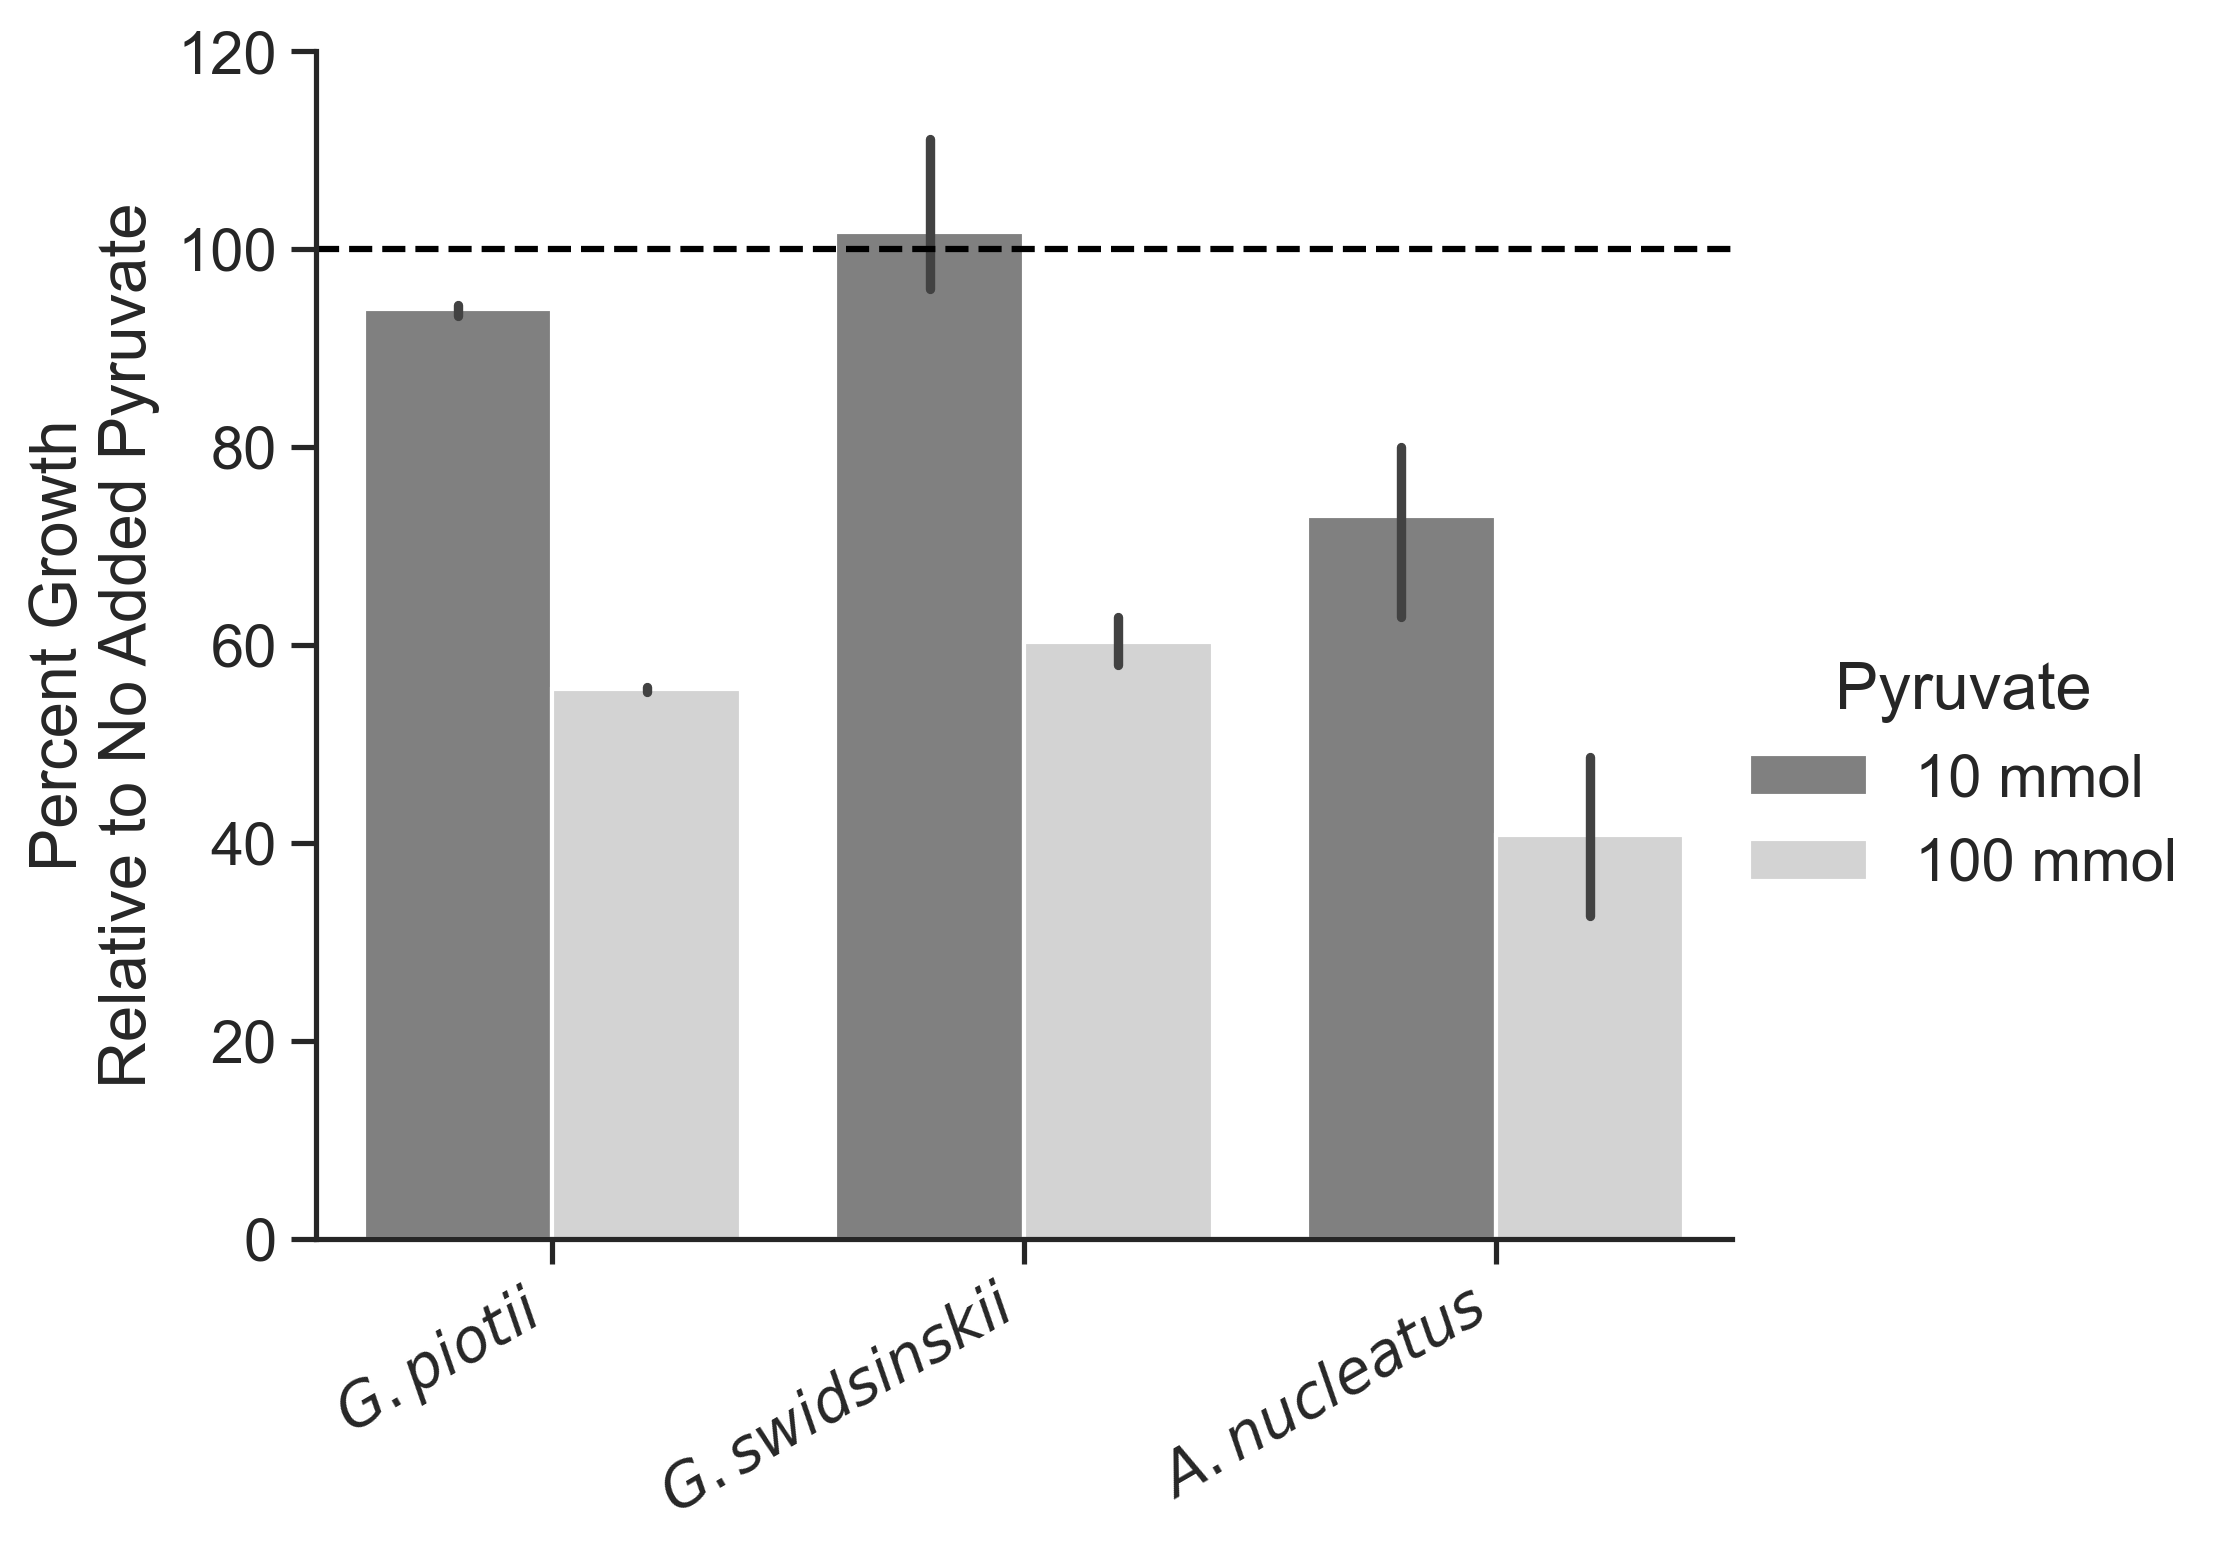

In [33]:
plotPalette = ['gray', 'lightgray']
plot = sns.catplot(data=percents22524, x='Isolate', y='Relative Growth', hue='Pyruvate', kind='bar',aspect=1.2, palette=plotPalette)
plot.set(xlabel='', ylabel='Percent Growth\nRelative to No Added Pyruvate', ylim=(0, 120))
plot.set_xticklabels(['$\it{G. piotii}$', '$\it{G. swidsinskii}$', '$\it{A. nucleatus}$'], rotation=30, ha='right')
plt.axhline(100, ls='--', color='black')
plot.savefig(figPath.joinpath('2-25-24_pyruvate_relative_growth.png'), bbox_inches='tight', dpi=300)

In [28]:
# Run Mann Whitney U-tests to identify which pyruvate treatments were significantly lower than the untreated
import scipy.stats

In [29]:
deltasDF = pd.read_csv(analysisPath.joinpath('2-26-24_pyruvate_delta600.csv'))

In [31]:
# Make dictionaries to hold the delta OD600 data
dataPiotii = {'0 mmol':[], '10 mmol':[], '100 mmol':[]}
dataSwid = {'0 mmol':[], '10 mmol':[], '100 mmol':[]}
dataNucl = {'0 mmol':[], '10 mmol':[], '100 mmol':[]}

# Pull that data out of deltasDF
for index, row in deltasDF.iterrows():
    currentDict = None
    if row['Isolate'] == 'G. piotii':
        currentDict = dataPiotii
    elif row['Isolate'] == 'G. swidsinskii':
        currentDict = dataSwid
    elif row['Isolate'] == 'A. nucleatus':
        currentDict = dataNucl
    currentDict[row['Pyruvate']].append(float(row['Delta OD600']))

In [35]:
# Generate the stats
treatments = ['10 mmol', '100 mmol']
for t in treatments:
    print(f'G. piotii 0 mmol vs {t}:')
    print(scipy.stats.mannwhitneyu(x=dataPiotii['0 mmol'], y=dataPiotii[t]))
    print(f'G. swidsinskii 0 mmol vs {t}:')
    print(scipy.stats.mannwhitneyu(x=dataSwid['0 mmol'], y=dataSwid[t]))
    print(f'A. nucleatus 0 mmol vs {t}:')
    print(scipy.stats.mannwhitneyu(x=dataNucl['0 mmol'], y=dataNucl[t]))

G. piotii 0 mmol vs 10 mmol:
MannwhitneyuResult(statistic=16.0, pvalue=0.02857142857142857)
G. swidsinskii 0 mmol vs 10 mmol:
MannwhitneyuResult(statistic=8.0, pvalue=1.0)
A. nucleatus 0 mmol vs 10 mmol:
MannwhitneyuResult(statistic=16.0, pvalue=0.022836215451282654)
G. piotii 0 mmol vs 100 mmol:
MannwhitneyuResult(statistic=16.0, pvalue=0.029401048190339642)
G. swidsinskii 0 mmol vs 100 mmol:
MannwhitneyuResult(statistic=16.0, pvalue=0.02857142857142857)
A. nucleatus 0 mmol vs 100 mmol:
MannwhitneyuResult(statistic=16.0, pvalue=0.025580146726954023)
